# RCP209 - Modélisation décisionnelle et apprentissage profond
# Projet Statlog Heart 
## 2024-2025 Semestre 1 - session 1

**Auteur : Sourou Alain NOUNAWON**

# 1. Définition de la probématique et méthodologie :

## 1.1. Probématique :

Prédire la présence ou l’absence de maladie du cœur à partir de 13 attributs représentant l’état physiologique du patient (la base contient 270 observations). 

Source de données : http://archive.ics.uci.edu/ml/datasets/Statlog+(Heart)

## 1.2.  Méthodologie

* Définition de la problématique : voir ci-dessus
* Collecte de données : source indiquée ci-dessus
* Prétraitement : Analyse des données, feature engineering (données manquantes, données aberrantes, sélections de variables)
* Division Train / Test
* Entraînement sur la base Train avec différents modèles
* Prédiction sur la base Test
* Evaluation des modèles et choix du modèle final
* Déploiement du modèle : pas pris en compte dans ce projet


In [2]:
pwd()

'C:\\Users\\souro\\Documents\\RCP209_CNAM_FOAD\\Projets\\P2_StatlogHeart'

# 2. Chargement des packages et importation du jeu de données

## 2.1. Chargement des packages

In [332]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.stats import entropy
from scipy.stats import pearsonr, ttest_ind, mannwhitneyu, f_oneway, kruskal, chi2_contingency
from itertools import combinations
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Installation de packages

In [ ]:
!pip install xgboost

## 2.2. Lecture du dataset, renommage, description et formatage de colonnes

In [3]:
# Spécifiez le répertoire et le nom du fichier
repertoire = r"C:/Users/souro/Documents/RCP209_CNAM_FOAD/Projets/P2_StatlogHeart/data/"  # Remplacez par le chemin réel
nom_fichier = "heart.dat"

### 2.2.1. Lecture du dataset

In [4]:
# Concaténez le chemin complet
chemin_complet = os.path.join(repertoire, nom_fichier)

# Lire le fichier .dat avec pandas
try:
    # Modifiez les paramètres de read_csv selon la structure de votre fichier .dat
    data = pd.read_csv(chemin_complet, sep=" ", header=None)  # Par exemple, tabulation comme séparateur
    print("Fichier lu avec succès ! Voici un aperçu :")
    print(data.head())
except FileNotFoundError:
    print(f"Erreur : le fichier {nom_fichier} est introuvable dans le répertoire {repertoire}.")
except Exception as e:
    print(f"Une erreur est survenue : {e}")

Fichier lu avec succès ! Voici un aperçu :
     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  70.0  1.0  4.0  130.0  322.0  0.0  2.0  109.0  0.0  2.4  2.0  3.0  3.0   2
1  67.0  0.0  3.0  115.0  564.0  0.0  2.0  160.0  0.0  1.6  2.0  0.0  7.0   1
2  57.0  1.0  2.0  124.0  261.0  0.0  0.0  141.0  0.0  0.3  1.0  0.0  7.0   2
3  64.0  1.0  4.0  128.0  263.0  0.0  0.0  105.0  1.0  0.2  2.0  1.0  7.0   1
4  74.0  0.0  2.0  120.0  269.0  0.0  2.0  121.0  1.0  0.2  1.0  1.0  3.0   1


In [5]:
data.head()

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  70.0  1.0  4.0  130.0  322.0  0.0  2.0  109.0  0.0  2.4  2.0  3.0  3.0   2
1  67.0  0.0  3.0  115.0  564.0  0.0  2.0  160.0  0.0  1.6  2.0  0.0  7.0   1
2  57.0  1.0  2.0  124.0  261.0  0.0  0.0  141.0  0.0  0.3  1.0  0.0  7.0   2
3  64.0  1.0  4.0  128.0  263.0  0.0  0.0  105.0  1.0  0.2  2.0  1.0  7.0   1
4  74.0  0.0  2.0  120.0  269.0  0.0  2.0  121.0  1.0  0.2  1.0  1.0  3.0   1

### 2.2.2. Renommage des colonnes du dataset

    Attribute Information:
    ------------------------
          -- 1. age       
          -- 2. sex       
          -- 3. chest pain type  (4 values)       
          -- 4. resting blood pressure  
          -- 5. serum cholestoral in mg/dl      
          -- 6. fasting blood sugar > 120 mg/dl       
          -- 7. resting electrocardiographic results  (values 0, 1, 2) 
          -- 8. maximum heart rate achieved  
          -- 9. exercise induced angina    
          -- 10. oldpeak = ST depression induced by exercise relative to rest   
          -- 11. the slope of the peak exercise ST segment     
          -- 12. number of major vessels (0-3) colored by flourosopy        
          -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
          -- 14.  Target (Variable to be predicted) : Absence (1) or presence (2) of heart disease

In [6]:
# Définir les noms des colonnes
data.columns = ["age", "sex", "chest_pain_type", "rest_blood_pres", "serum_chol", "fast_blood_sugar", 
                "rest_ecg_res", "max_heart_rate", "ex_angina", "oldpeak", 
                "slope_peak", "nb_maj_ves", "thal", "target"]

# Afficher le DataFrame pour vérifier les changements
data.head()

age  sex  chest_pain_type  rest_blood_pres  serum_chol  fast_blood_sugar  \
0  70.0  1.0              4.0            130.0       322.0               0.0   
1  67.0  0.0              3.0            115.0       564.0               0.0   
2  57.0  1.0              2.0            124.0       261.0               0.0   
3  64.0  1.0              4.0            128.0       263.0               0.0   
4  74.0  0.0              2.0            120.0       269.0               0.0   

   rest_ecg_res  max_heart_rate  ex_angina  oldpeak  slope_peak  nb_maj_ves  \
0           2.0           109.0        0.0      2.4         2.0         3.0   
1           2.0           160.0        0.0      1.6         2.0         0.0   
2           0.0           141.0        0.0      0.3         1.0         0.0   
3           0.0           105.0        1.0      0.2         2.0         1.0   
4           2.0           121.0        1.0      0.2         1.0         1.0   

   thal  target  
0   3.0       2  
1   7.0       1  
2   7.0       2  
3   7.0       1  
4   3.0       1

### 2.2.3. Description des variables

Comprendre les variables présentes dans le jeu de données est important avant de commencer les analyses :

| Variable    | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| `age`       | Âge du patient.                                                             |
| `sex`       | Sexe du patient (1 = homme, 0 = femme).                                     |
| `chest_pain_type`        | Type de douleur thoracique (1 = typique, 2 = atypique, 3 = non-angineuse, 4 = asymptomatique). |
| `rest_blood_pres`  | Pression artérielle au repos (en mm Hg).                                    |
| `serum_chol`      | Taux de cholestérol sérique (mg/dl).                                        |
| `fast_blood_sugar`       | Glycémie à jeun > 120 mg/dl (1 = vrai; 0 = faux).                           |
| `rest_ecg_res`   | Résultats de l'électrocardiogramme au repos (0 = normal, 1 = ST-T anormal, 2 = hypertrophie ventriculaire). |
| `max_heart_rate`   | Fréquence cardiaque maximale atteinte.                                      |
| `ex_angina`     | Angine induite par l'exercice (1 = oui; 0 = non).                           |
| `oldpeak`   | Dépression ST induite par l'exercice par rapport au repos.                  |
| `slope_peak`     | Pente du segment ST lors de l'exercice (1 = pente descendante, 2 = plate, 3 = ascendante). |
| `nb_maj_ves`        | Nombre de vaisseaux principaux colorés par fluoroscopie (0-3).              |
| `thal`      | Résultat de l'examen sanguin (3 = normal, 6 = fixe, 7 = réversible).        |
| `target`    | Variable cible indiquant la présence (2) ou l'absence (1) de maladie cardiaque. |

**Dimensions du tableau et vérification des types des variables**

In [10]:
# Dimensions du tableau
print(data.shape) 

(270, 14)


Le jeu de données contient 270 observations et 14 variables

In [11]:
# Types des variables du tableau
data.dtypes

age                 float64
sex                 float64
chest_pain_type     float64
rest_blood_pres     float64
serum_chol          float64
fast_blood_sugar    float64
rest_ecg_res        float64
max_heart_rate      float64
ex_angina           float64
oldpeak             float64
slope_peak          float64
nb_maj_ves          float64
thal                float64
target                int64
dtype: object

### 2.2.4. Formatage des colonnes

    Attributes types
    -----------------
        Real: 1, 4, 5, 8, 10, 12
        Ordered: 11,
        Binary: 2, 6, 9
        Nominal:7, 3, 13

La variable « nb_maj_ves » est initialement de type numérique ; en raison de sa description et cela fait plutôt sens de la recoder en catégorielle.

In [12]:
# Liste des variables à transformer en qualitatives
qualitative_columns = ['sex', 'chest_pain_type', 'fast_blood_sugar', 'rest_ecg_res', 
                       'ex_angina', 'slope_peak', 'thal', 'nb_maj_ves', 'target']
# numeric integer
quantitative_columns = ['age', 'rest_blood_pres', 'serum_chol', 'max_heart_rate']
# oldpeak -> type float

# Transformer les variables en type 'category' en utilisant apply()
data[qualitative_columns] = data[qualitative_columns].apply(lambda col: col.astype('int64'))
data[qualitative_columns] = data[qualitative_columns].apply(lambda col: col.astype('category'))

# Transformer les variables en type 'integer' en utilisant apply()
data[quantitative_columns] = data[quantitative_columns].apply(lambda col: col.astype('int64'))

# Vérification des types de données après transformation
data.dtypes

age                    int64
sex                 category
chest_pain_type     category
rest_blood_pres        int64
serum_chol             int64
fast_blood_sugar    category
rest_ecg_res        category
max_heart_rate         int64
ex_angina           category
oldpeak              float64
slope_peak          category
nb_maj_ves          category
thal                category
target              category
dtype: object

In [12]:
# Afficher le DataFrame pour vérifier les changements
data.head()

age sex chest_pain_type  rest_blood_pres  serum_chol fast_blood_sugar  \
0   70   1               4              130         322                0   
1   67   0               3              115         564                0   
2   57   1               2              124         261                0   
3   64   1               4              128         263                0   
4   74   0               2              120         269                0   

  rest_ecg_res  max_heart_rate ex_angina  oldpeak slope_peak  nb_maj_ves thal  \
0            2             109         0      2.4          2           3    3   
1            2             160         0      1.6          2           0    7   
2            0             141         0      0.3          1           0    7   
3            0             105         1      0.2          2           1    7   
4            2             121         1      0.2          1           1    3   

  target  
0      2  
1      1  
2      2  
3      1  
4      1

# 3. Analyses exploratoires

## 3.1. Vérification des données manquantes, de doublons et valeurs extrêmes

### 3.1.1. Vérification des données manquantes

In [13]:
#data.isnull().sum()
data.isna().sum()

age                 0
sex                 0
chest_pain_type     0
rest_blood_pres     0
serum_chol          0
fast_blood_sugar    0
rest_ecg_res        0
max_heart_rate      0
ex_angina           0
oldpeak             0
slope_peak          0
nb_maj_ves          0
thal                0
target              0
dtype: int64

On constate bien qu'il n'y a pas de données manquantes dans le jeu de données.

### 3.1.2. Vérification des doublons

In [14]:
data.duplicated().sum()

0

Il n'y a pas de doublons dans la base.

## 3.2. Analyses descriptives

### 3.2.1 Analyses descriptives univariées

#### 3.2.1.1. Variables quantitatives

Pour les variables quantitatives, nous allons principalement observer et étudier :
    
- **Les statistiques descriptives (numériques)** : Moyenne, médiane, écart-type, etc.
- **La distribution** : au moyen des histogrammes et boxplots.

*Fonction pour les statistiques numériques*

In [15]:
# Fonction pour les statistiques numériques
#from scipy.stats import skew, kurtosis
def resume_quanti(base):
    """
        Cette fonction permet de réaliser les statistiques descriptives sur utoutes les variables quantitatives d'une base de données
        data: la base de données à utiliser
    """

    #Détermination de la liste des variables quantitative
    liste_variable_quanti = base.select_dtypes(include=['number']).columns.tolist()

    nb_obs = base[liste_variable_quanti].count()
    moyenne = base[liste_variable_quanti].mean()
    mediane = base[liste_variable_quanti].median()
    max = base[liste_variable_quanti].max()
    min = base[liste_variable_quanti].min()
    std = base[liste_variable_quanti].std()
    var = base[liste_variable_quanti].var()
    q1 = base[liste_variable_quanti].quantile(0.25)
    q3 = base[liste_variable_quanti].quantile(0.75)
    iqr = q3 - q1
    var = base[liste_variable_quanti].var()
    asymetrie = base[liste_variable_quanti].skew()
    aplatissement = base[liste_variable_quanti].kurtosis()
    
    
    stat_desc_num = pd.DataFrame({
        "Nb_obs" : nb_obs,
        "Moyenne" : moyenne,
        "Médiane" : mediane,
        "Max" : max, 
        "Min" : min,
        "std" : std,
        "var" : var,
        "Q1" : q1,
        "Q3" : q3,
        "IQR" : iqr,
        "Asymetrie" : asymetrie,
        "Aplatissement" : aplatissement,
        
    })

    return (stat_desc_num)

*Fonction pour les graphiques*

In [16]:
# Automatisation de la génération des graphiques
def graphique_quanti(base):
    
    #Détermination de la liste des variables quantitative
    liste_variable_quanti = base.select_dtypes(include=['number']).columns.tolist()
    for i in liste_variable_quanti:
        
        #Histogramme
        plt.figure(figsize=(5, 3))
        sns.histplot(base[i], bins= 20, color = "lightblue")
        plt.title(f"Histogramme de la variable {i}")
        plt.show()
        
        #Courbe de densité
        plt.figure(figsize=(5, 3))
        sns.kdeplot(base[i], color ="blue", fill = True)
        plt.show()        
    
        # Boxplot
        plt.figure(figsize=(5, 3))
        sns.boxplot(base[i], color = "lightgreen")
        plt.title(f"Boxplot de la variable {i}")
        plt.xlabel(f"Variable {i}")
        plt.show()
    
        ## QQPLot
        plt.figure(figsize=(5, 3))
        stats.probplot(base[i], dist="norm", plot=plt)
        plt.xlabel(f"Variable {i}")
        plt.show()
    

#### Résultat de l'analyse univariée, graphique et numérique, sur les variables quantitatives

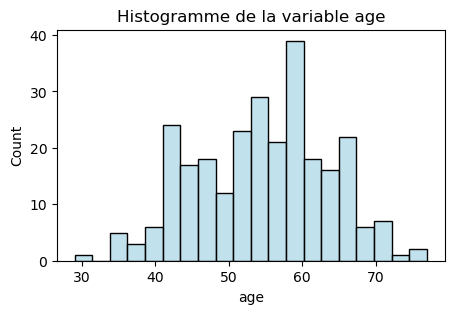

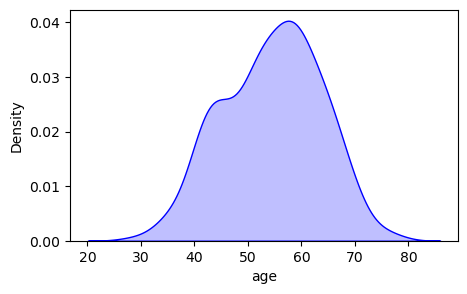

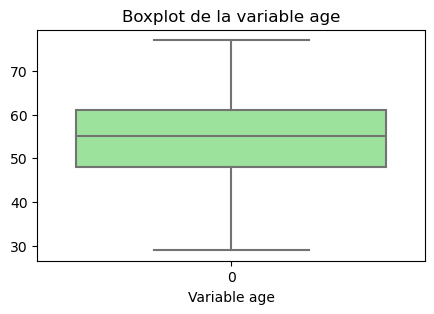

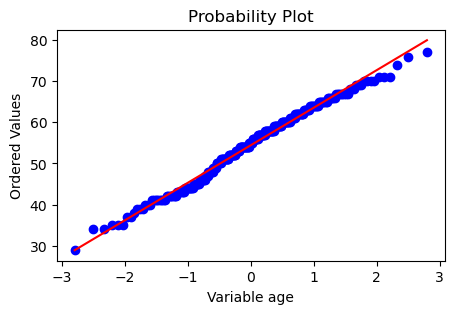

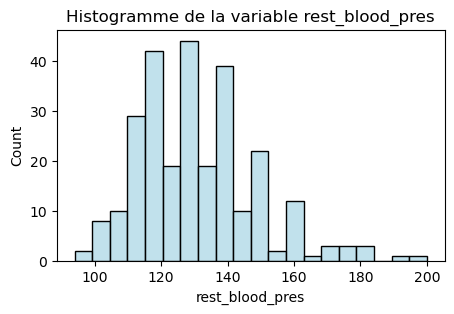

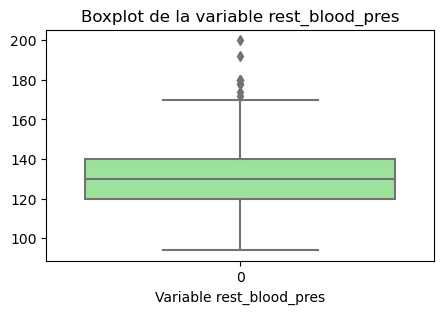

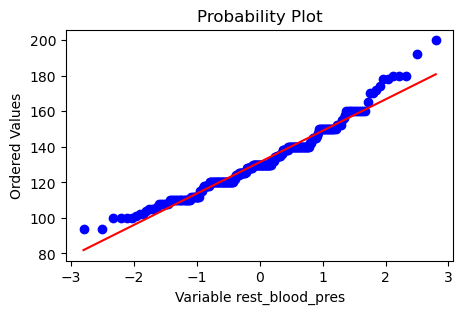

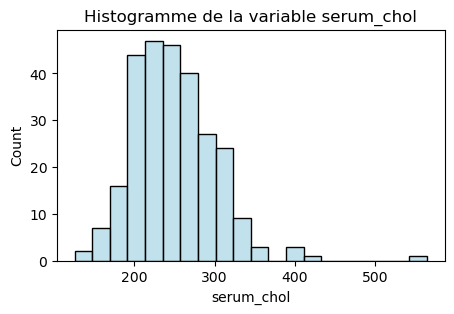

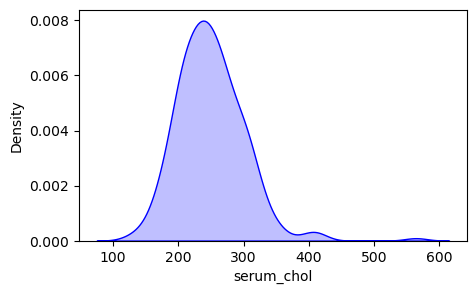

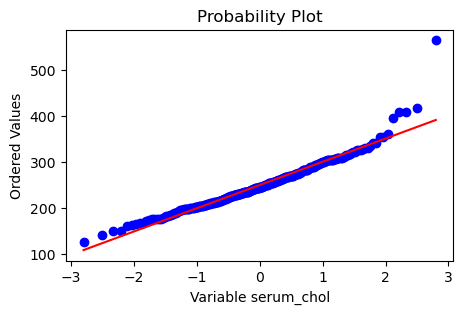

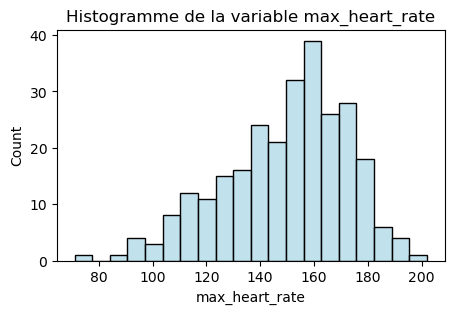

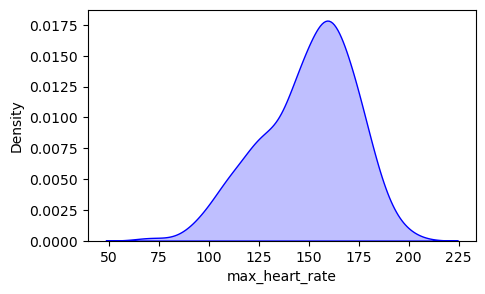

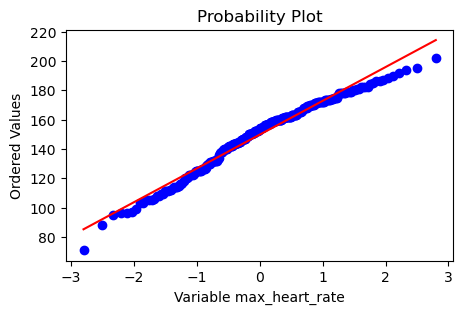

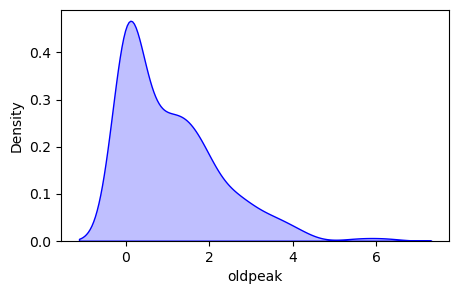

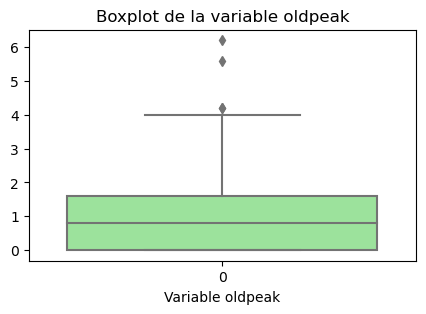

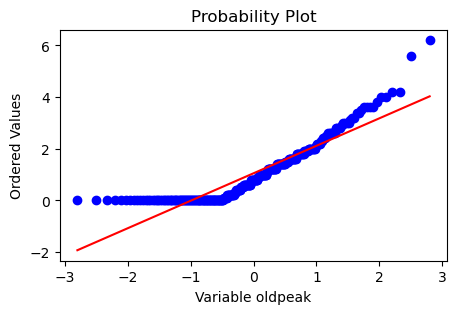

Nb_obs     Moyenne  Médiane    Max    Min        std  \
age                 270   54.433333     55.0   77.0   29.0   9.109067   
rest_blood_pres     270  131.344444    130.0  200.0   94.0  17.861608   
serum_chol          270  249.659259    245.0  564.0  126.0  51.686237   
max_heart_rate      270  149.677778    153.5  202.0   71.0  23.165717   
oldpeak             270    1.050000      0.8    6.2    0.0   1.145210   

                         var     Q1     Q3   IQR  Asymetrie  Aplatissement  
age                82.975093   48.0   61.0  13.0  -0.163615      -0.544815  
rest_blood_pres   319.037051  120.0  140.0  20.0   0.722618       0.923097  
serum_chol       2671.467107  213.0  280.0  67.0   1.183721       4.895599  
max_heart_rate    536.650434  133.0  166.0  33.0  -0.527737      -0.103072  
oldpeak             1.311506    0.0    1.6   1.6   1.262893       1.759317

In [17]:
# statistiques Descriptives Finales (numériques et graphs)
def statDescQuantFinal(base):
    statsNum = resume_quanti(base)
    graphique_quanti(base)
    return statsNum

statDescQuantFinal(data)

#### Détection des valeurs extrêmes

In [18]:
# Détection des valeurs aberrantes
list_var_quanti = data.select_dtypes(include=['number']).columns.tolist()
for col in list_var_quanti:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    all_outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"\n🔹 Nombre de valeurs aberrantes pour {col} :", all_outliers)


🔹 Nombre de valeurs aberrantes pour age : 0

🔹 Nombre de valeurs aberrantes pour rest_blood_pres : 9

🔹 Nombre de valeurs aberrantes pour serum_chol : 5

🔹 Nombre de valeurs aberrantes pour max_heart_rate : 1

🔹 Nombre de valeurs aberrantes pour oldpeak : 4


Les valeurs manquantes sont en très faible proportion et elles ne seront pas traitées dans cette étude.

#### 3.2.1.2. Variables qualitatives

Concernant les variables catégorielles, nous allons examiner :
- **La répartition des catégories** : permettant de comprendre la diversité au sein de la variable.    
- **La fréquence des modalités** : grâce aux barplots.

*Fonction pour le résumé numérique des variables qualitatives*

In [19]:
#from scipy.stats import entropy
def resume_qualitatives(base):
    # Sélectionner uniquement les colonnes qualitatives (dtype object ou category)
    qualitatives = base.select_dtypes(include=['object', 'category'])
    
    # Dictionnaire pour stocker les résumés
    resume = {}

    # Boucle sur chaque colonne qualitative
    for col in qualitatives.columns:
        freq = qualitatives[col].value_counts()  # Fréquence absolue
        proportion = qualitatives[col].value_counts(normalize=True) * 100  # Proportion
        mode = qualitatives[col].mode()[0]  # Mode
        
        # Stocker les résultats dans un DataFrame
        resume[col] = pd.DataFrame({
            'Catégorie': freq.index,
            'Fréquence absolue': freq.values,
            'Proportion': proportion.values,
            'Mode': [mode] + [None] * (len(freq) - 1)  # Mode en première ligne seulement
        })
    
    return resume


**Résultat de l'analyse univariée numérique des variables qualitatives**

In [20]:
 # Obtenez le résumé
resumes = resume_qualitatives(data)

# Affichez les résumés pour chaque colonne
for col, res in resumes.items():
    print(f"Résumé pour {col} :")
    print(res)
    print("\n")


Résumé pour sex :
  Catégorie  Fréquence absolue  Proportion  Mode
0         1                183   67.777778   1.0
1         0                 87   32.222222   NaN


Résumé pour chest_pain_type :
  Catégorie  Fréquence absolue  Proportion  Mode
0         4                129   47.777778   4.0
1         3                 79   29.259259   NaN
2         2                 42   15.555556   NaN
3         1                 20    7.407407   NaN


Résumé pour fast_blood_sugar :
  Catégorie  Fréquence absolue  Proportion  Mode
0         0                230   85.185185   0.0
1         1                 40   14.814815   NaN


Résumé pour rest_ecg_res :
  Catégorie  Fréquence absolue  Proportion  Mode
0         2                137   50.740741   2.0
1         0                131   48.518519   NaN
2         1                  2    0.740741   NaN


Résumé pour ex_angina :
  Catégorie  Fréquence absolue  Proportion  Mode
0         0                181   67.037037   0.0
1         1                 8

*Fonction pour les graphiques*

In [21]:
# Automatisation de la génération des graphiques
#import pandas as pd
#import matplotlib.pyplot as plt

def graphiques_qualitatives(base):
    # Sélectionner uniquement les colonnes qualitatives (dtype object ou category)
    qualitatives = base.select_dtypes(include=['object', 'category'])
    
    # Parcourir chaque colonne qualitative
    for col in qualitatives.columns:
        # Fréquences des catégories
        freq = qualitatives[col].value_counts()
        proportions = base[col].value_counts(normalize=True) * 100

        # Barplot
        plt.figure(figsize=(5, 5))
        #freq.plot(kind='bar', color='skyblue', edgecolor='black')
        ax = sns.barplot(x=freq.index, y=freq.values, palette='Set2')
        # Ajouter les étiquettes des proportions sur chaque barre
        ax.bar_label(ax.containers[0], padding=3)
        plt.title(f"Barplot pour la variable '{col}'")
        plt.xlabel("Catégories")
        plt.ylabel("Fréquence absolue")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Barplot avec proportion
        plt.figure(figsize=(5, 5))
        ax = sns.barplot(x=proportions.index, y=proportions.values, palette='Set2')
        # Ajouter les étiquettes des proportions sur chaque barre
        ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=3)
        plt.title(f"Barplot pour la variable '{col}'")
        plt.xlabel("Catégories")
        plt.ylabel("Proportion %")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Pie chart
        plt.figure(figsize=(4, 4))
        freq.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
        plt.title(f"Pie chart pour la variable '{col}'")
        plt.ylabel("")  # Retirer le label par défaut
        plt.tight_layout()
        plt.show()


**Résultat de l'analyse univariée graphique des variables qualitatives**

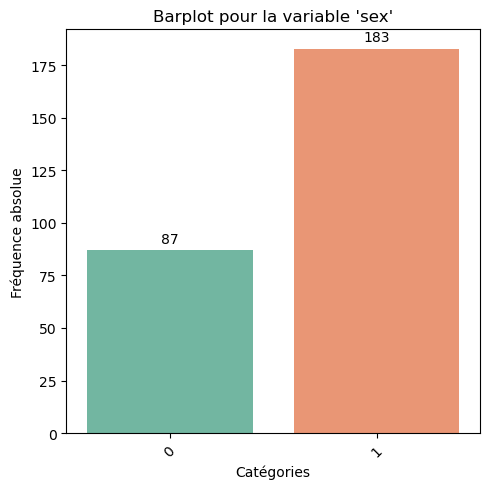

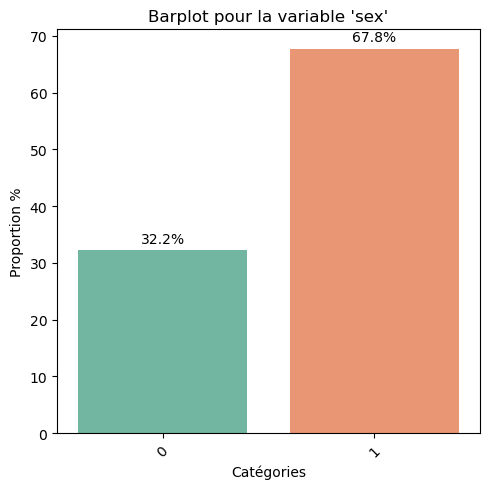

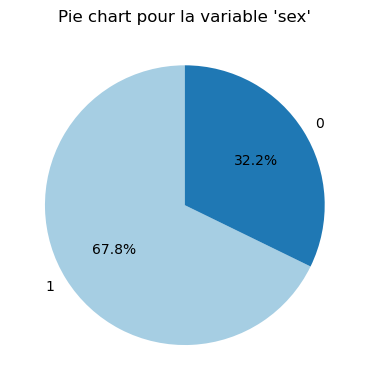

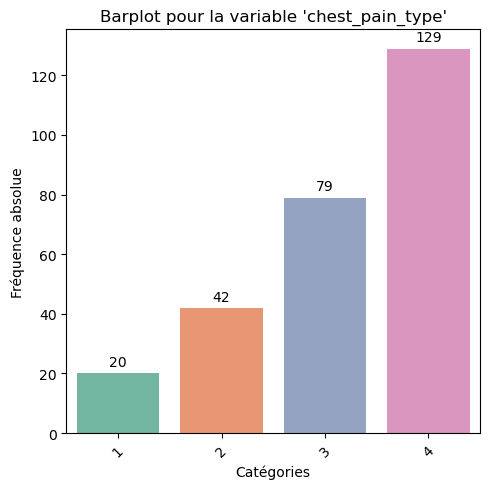

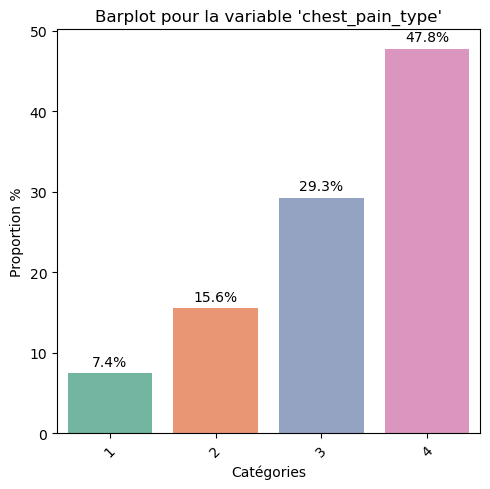

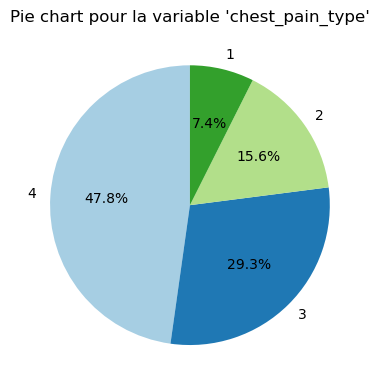

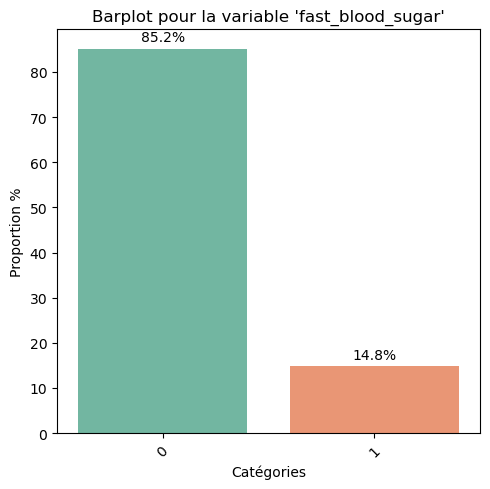

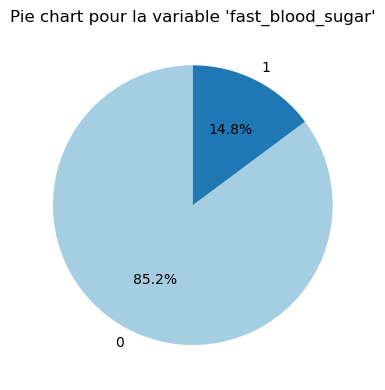

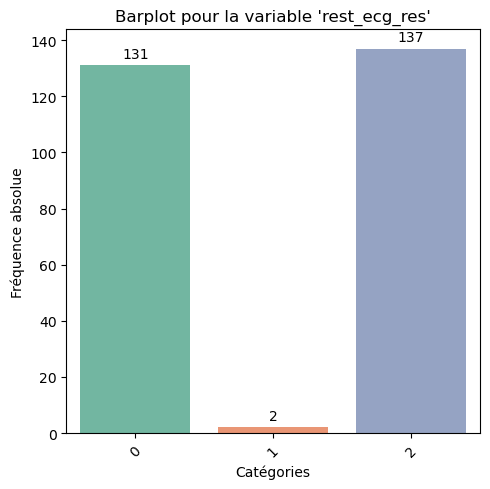

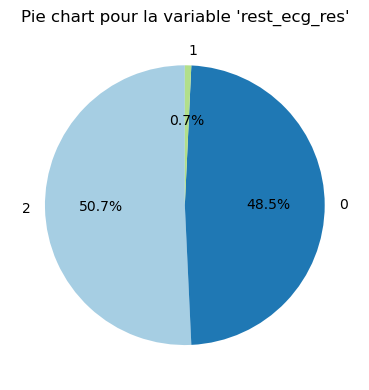

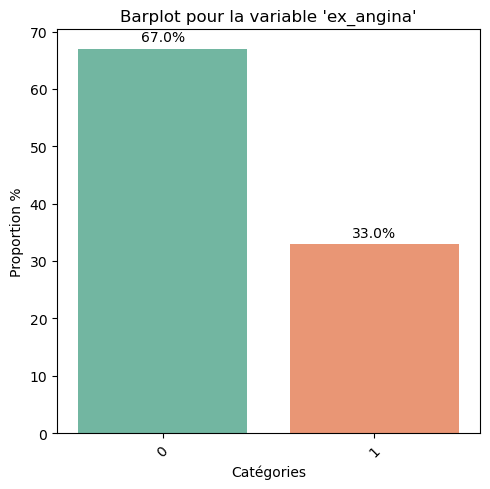

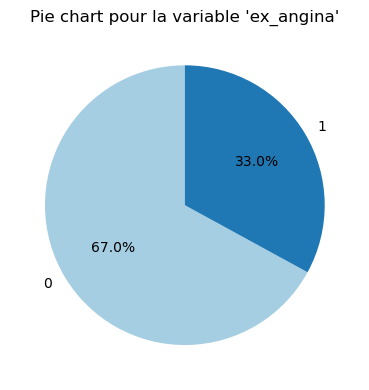

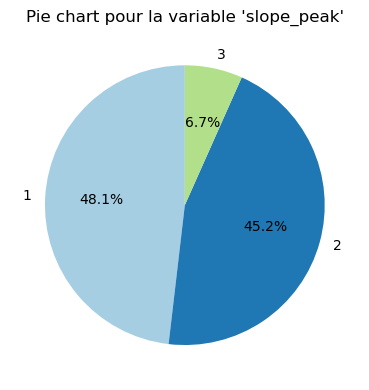

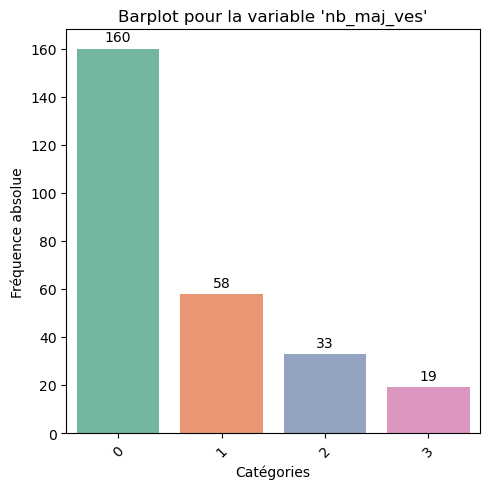

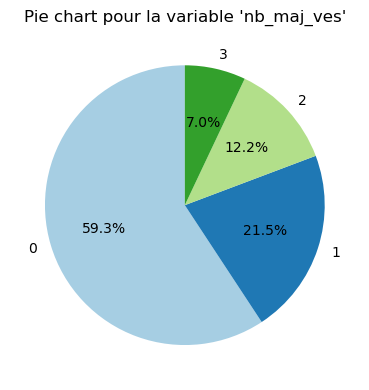

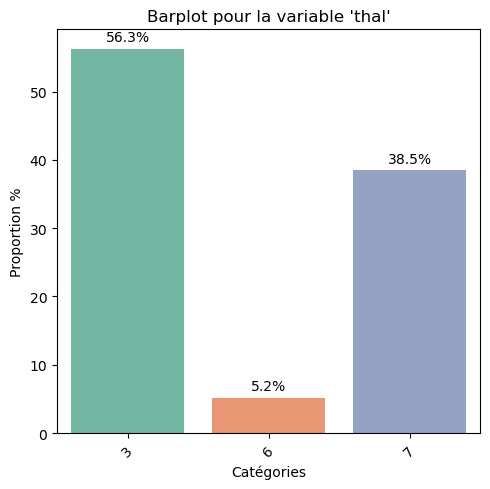

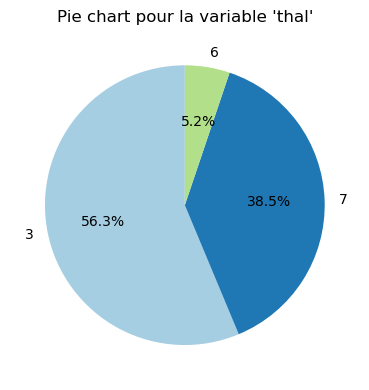

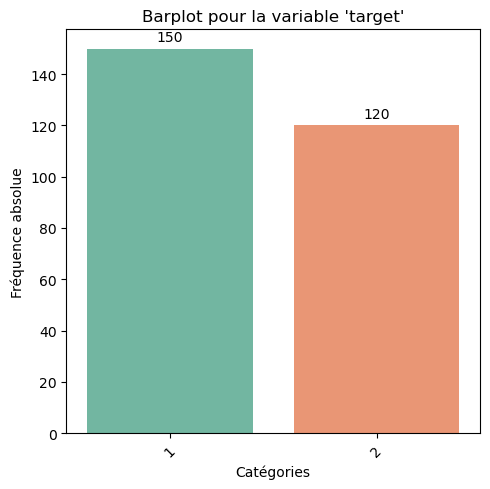

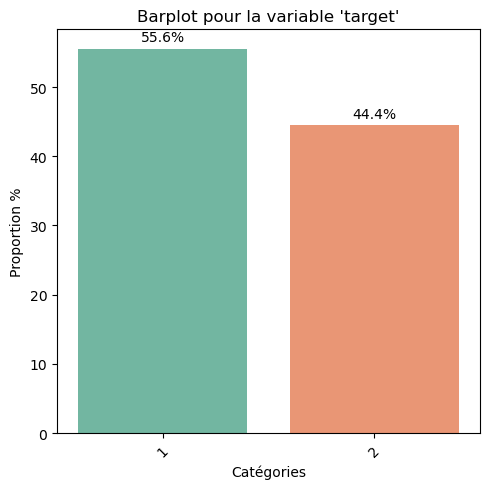

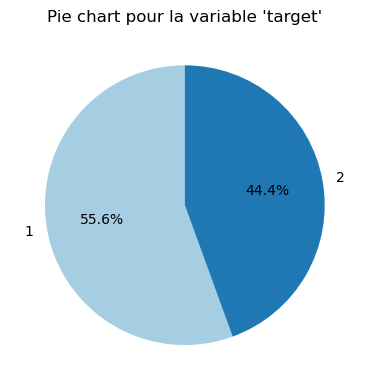

In [22]:
# Générer les graphiques
graphiques_qualitatives(data)

Lorsqu’on observe la variable « rest_ecg_res » ayant trois modalités (0 = normal, 1 = ST-T anormal, 2 = hypertrophie ventriculaire), la modalité « 1 » représente 0,7%, donc largement moins de 5% et il serait pertinent de l’associer dans la modalité « 2 » au vu de se rareté ; autrement effectuer un recodage pour avoir au final deux modalités (normal, anormal) pour cette variable. 

### 3.2.2. Analyses descriptives bivariées

#### 3.2.2.1. Entre variables quantitatives et Heatmap de corrélation

#### Nuage de points sur l'ensemble des variables quantitatives du jeu de données

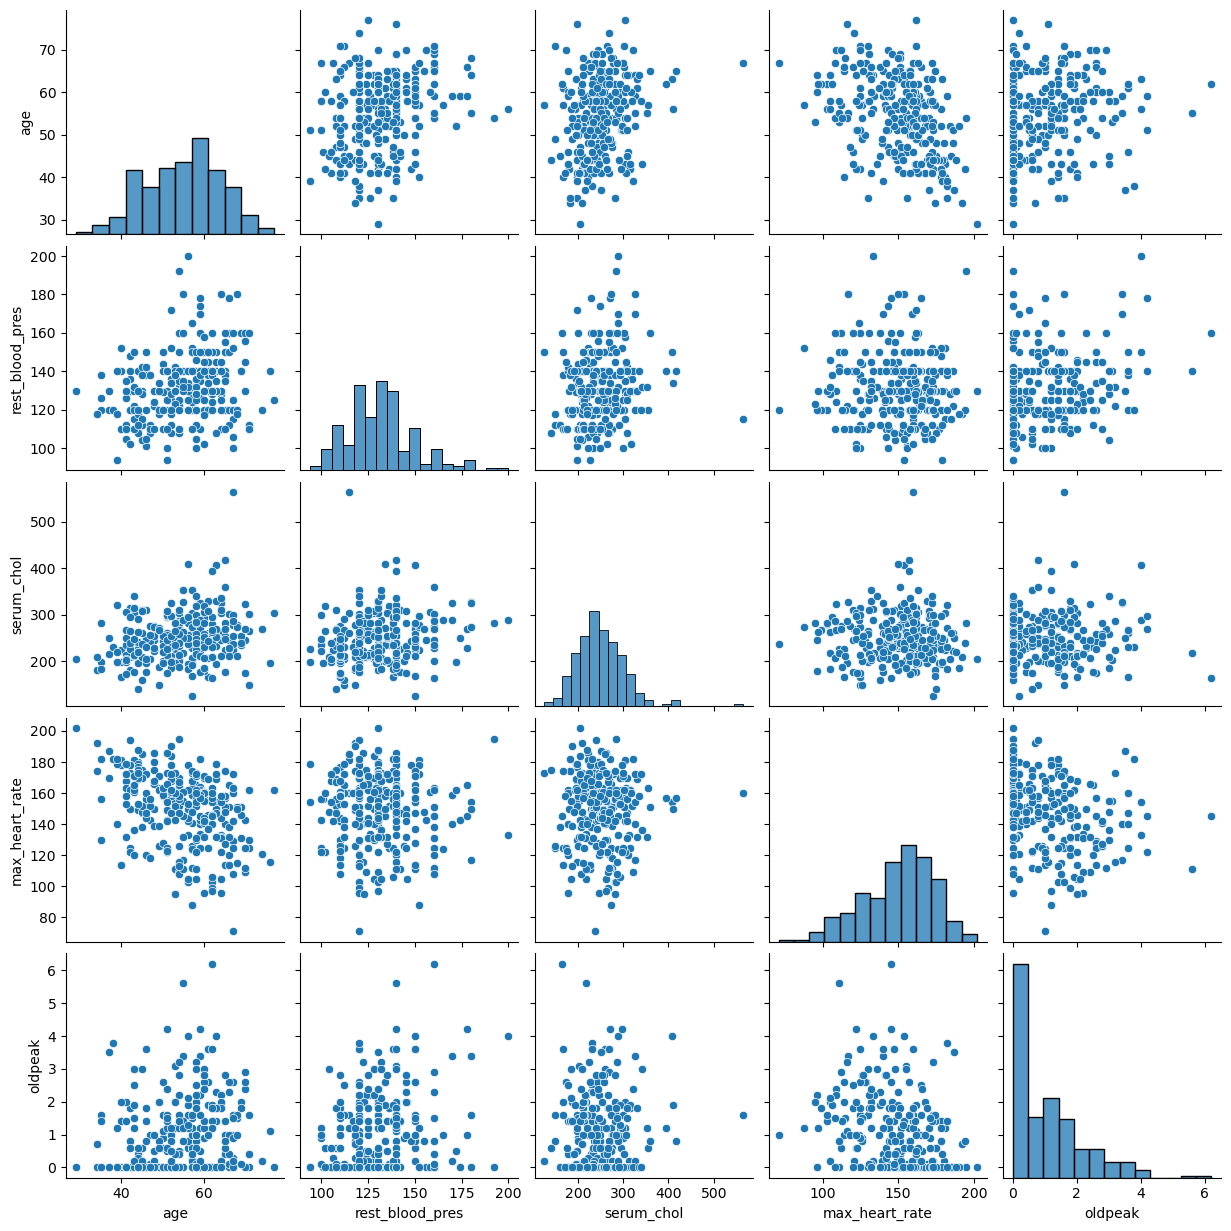

In [23]:
# Nuage de points pour toutes les variables quanti
data_quanti = data.select_dtypes(include=['number'])
sns.pairplot(data_quanti)
plt.show()

* **Scatter plot entre l'âge et la fréquence cardiaque maximale atteinte**

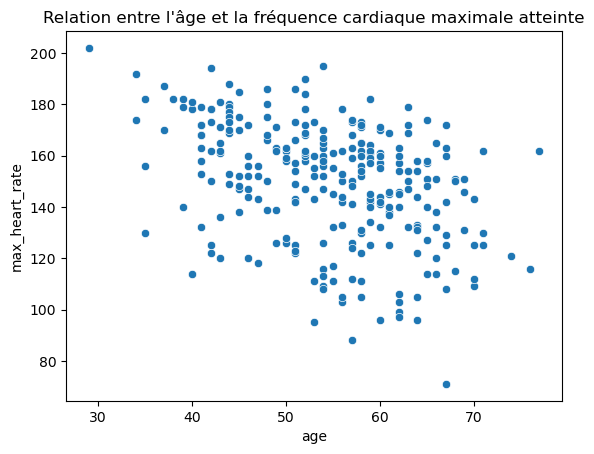

In [24]:
# Scatter plot entre l'âge et la pression artérielle au repos
sns.scatterplot(x='age', y='max_heart_rate', data=data)
plt.title('Relation entre l\'âge et la fréquence cardiaque maximale atteinte')
plt.show()

* **Scatter plot entre l'âge et la pression artérielle au repos**

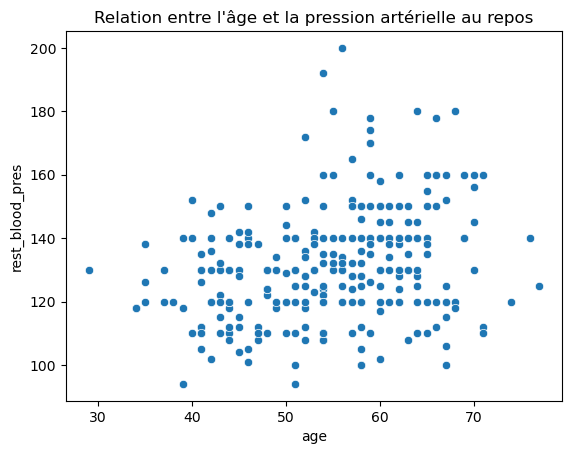

In [25]:
# Scatter plot entre l'âge et la pression artérielle au repos
sns.scatterplot(x='age', y='rest_blood_pres', data=data)
plt.title('Relation entre l\'âge et la pression artérielle au repos')
plt.show()

* **Scatter plot entre l'âge et la pression artérielle au repos**

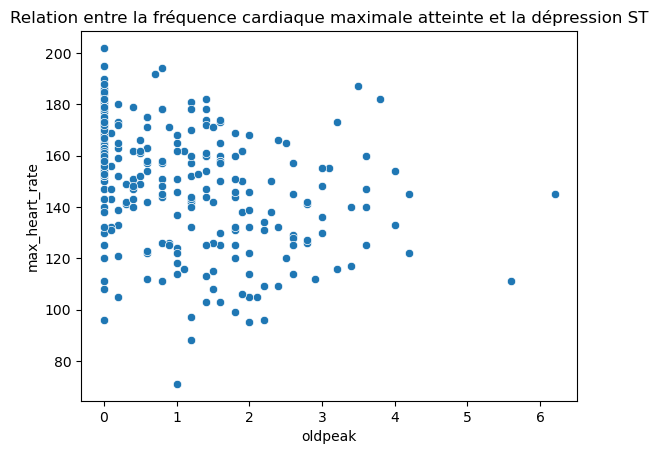

In [26]:
# Scatter plot entre l'âge et la pression artérielle au repos
sns.scatterplot(x='oldpeak', y='max_heart_rate', data=data)
plt.title('Relation entre la fréquence cardiaque maximale atteinte et la dépression ST')
plt.show()

#### Heatmap de corrélation et p-value

* H0 : il n'y a pas de corrélation linéaire entre les deux variables
* H1 : il y a corrélation linéaire entre les deux variables
* Si p-value < 0.05 => rejeter H0 (il y a corrélation significative)
* Interprétation du coefficient : -1 (corrélation significative négative) à 1 (corrélation significative positive)

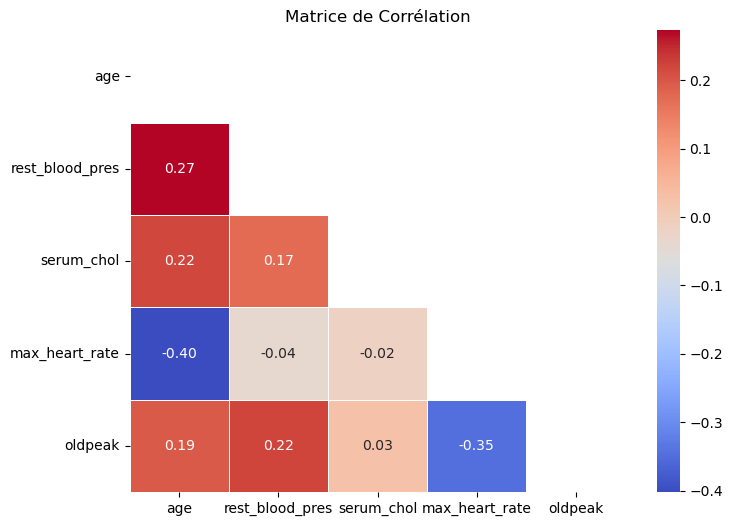

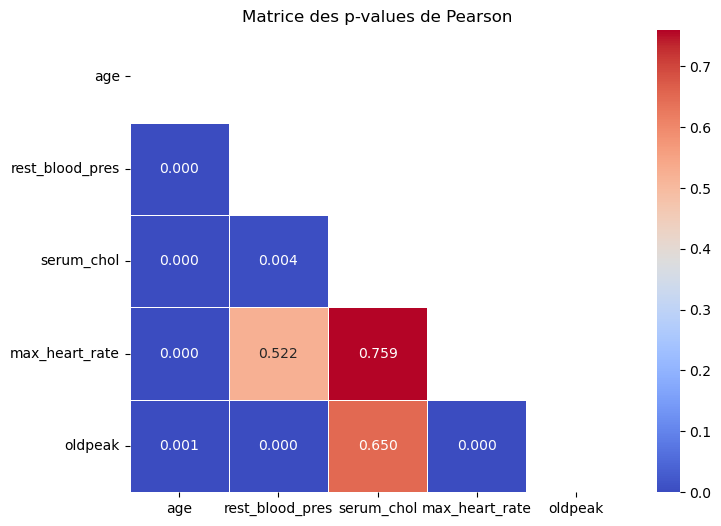

Matrice de Corrélation :
                      age  rest_blood_pres  serum_chol  max_heart_rate  \
age              1.000000         0.273053    0.220056       -0.402215   
rest_blood_pres  0.273053         1.000000    0.173019       -0.039136   
serum_chol       0.220056         0.173019    1.000000       -0.018739   
max_heart_rate  -0.402215        -0.039136   -0.018739        1.000000   
oldpeak          0.194234         0.222800    0.027709       -0.349045   

                  oldpeak  
age              0.194234  
rest_blood_pres  0.222800  
serum_chol       0.027709  
max_heart_rate  -0.349045  
oldpeak          1.000000  

Matrice des p-values :
                          age  rest_blood_pres  serum_chol  max_heart_rate  \
age              0.000000e+00         0.000005    0.000269    6.385614e-12   
rest_blood_pres  5.295953e-06         0.000000    0.004354    5.219605e-01   
serum_chol       2.685531e-04         0.004354    0.000000    7.592129e-01   
max_heart_rate   6.385614e

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Charger le jeu de données (remplace 'data.csv' par ton fichier)
#df = pd.read_csv("data.csv")
df = data

# Sélectionner les variables quantitatives
list_var_quanti = df.select_dtypes(include=['number']).columns.tolist()

# Initialiser les matrices de corrélation et p-values
corr_matrix = pd.DataFrame(index=list_var_quanti, columns=list_var_quanti)
pval_matrix = pd.DataFrame(index=list_var_quanti, columns=list_var_quanti)

# Créer un mask pour cacher la partie supérieure
mask_corr = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask_pv = np.triu(np.ones_like(pval_matrix, dtype=bool))

# Calcul des coefficients de corrélation et des p-values
for var1 in list_var_quanti:
    for var2 in list_var_quanti:
        if var1 == var2:
            corr_matrix.loc[var1, var2] = 1  # Auto-corrélation = 1
            pval_matrix.loc[var1, var2] = 0  # p-value triviale
        else:
            corr, pval = pearsonr(df[var1].dropna(), df[var2].dropna())
            corr_matrix.loc[var1, var2] = corr
            pval_matrix.loc[var1, var2] = pval

# Convertir en float
corr_matrix = corr_matrix.astype(float)
pval_matrix = pval_matrix.astype(float)

# Afficher la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

# Afficher la matrice des p-values (facultatif)
plt.figure(figsize=(8, 6))
sns.heatmap(pval_matrix, mask=mask_pv, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Matrice des p-values de Pearson")
plt.show()

# Afficher les résultats sous forme de tableau
print("Matrice de Corrélation :")
print(corr_matrix)

print("\nMatrice des p-values :")
print(pval_matrix)



* Exemple : il y a une corrélation significative (relation linéaire négative et faible) entre "age" et "max_heart_rate" (Fréquence cardiaque maximale atteinte)

#### 3.2.2.2. Entre variables quantitative et qualitative

#### Boxplots et tests statistiques sur l'ensemble du jeu de données


🔹 Analyse de age en fonction de sex

1    183
0     87
Name: sex, dtype: int64


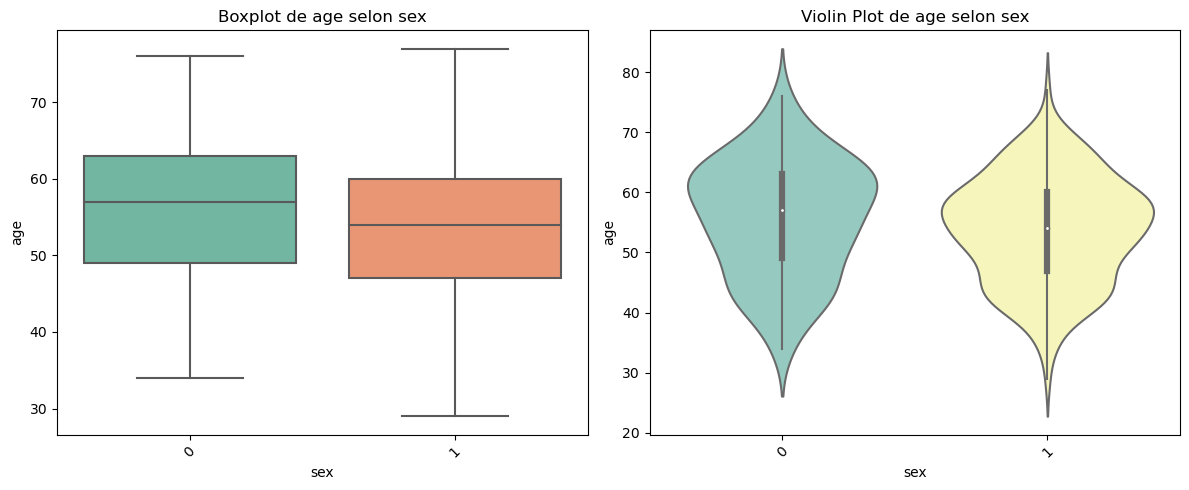

Test t de Student : Statistique=-1.5046, p-value=0.1344
Test de Wilcoxon : Statistique=6992.0000, p-value=0.1062
--------------------------------------------------

🔹 Analyse de age en fonction de chest_pain_type

4    129
3     79
2     42
1     20
Name: chest_pain_type, dtype: int64


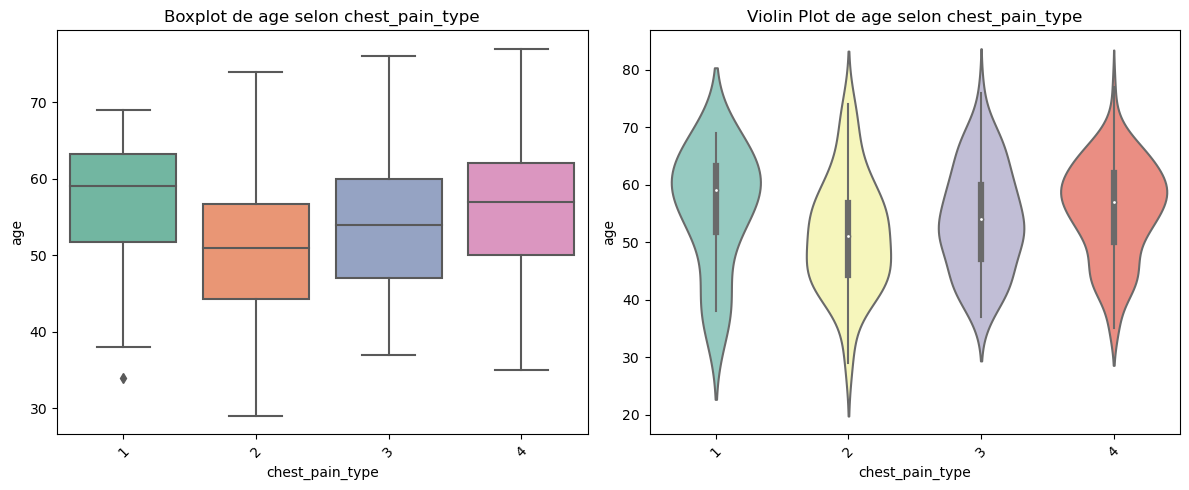

Test ANOVA : Statistique=2.7003, p-value=0.0461
Test Kruskal-Wallis : Statistique=9.3441, p-value=0.0250
--------------------------------------------------

🔹 Analyse de age en fonction de fast_blood_sugar

0    230
1     40
Name: fast_blood_sugar, dtype: int64


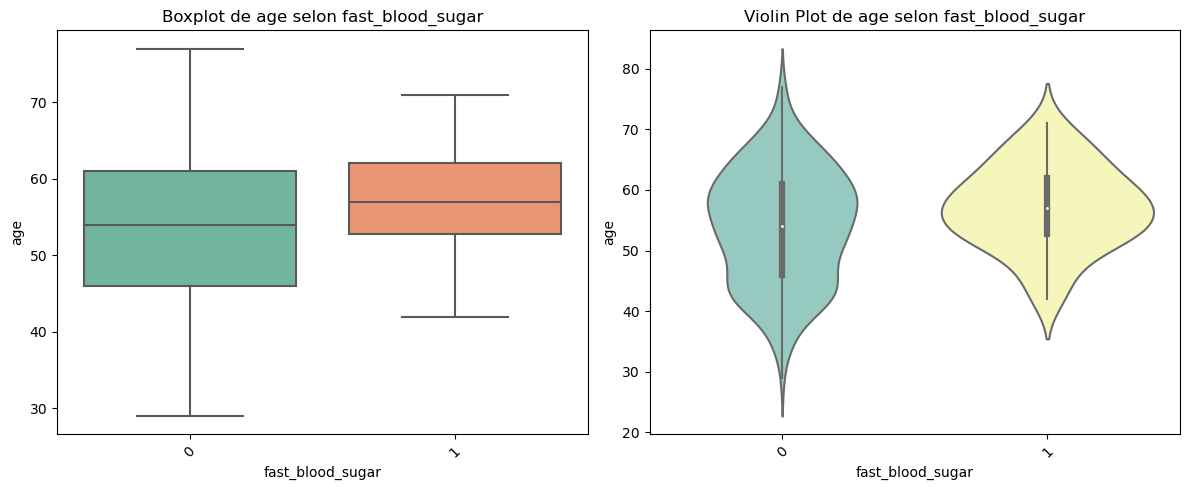

Test t de Student : Statistique=-2.5251, p-value=0.0139
Test de Wilcoxon : Statistique=3719.0000, p-value=0.0532
--------------------------------------------------

🔹 Analyse de age en fonction de rest_ecg_res

2    137
0    131
1      2
Name: rest_ecg_res, dtype: int64


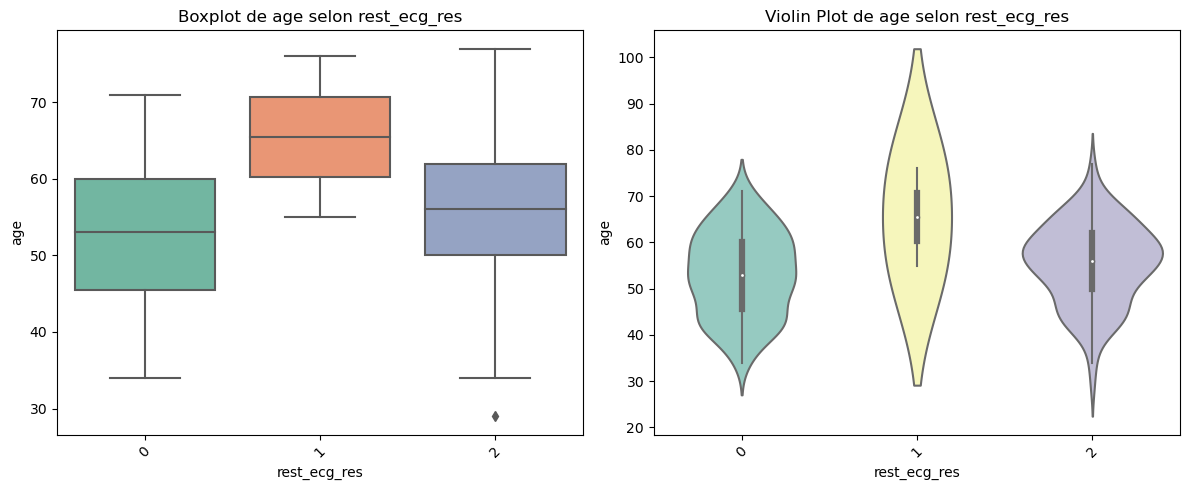

Test ANOVA : Statistique=3.7801, p-value=0.0241
Test Kruskal-Wallis : Statistique=5.9217, p-value=0.0518
--------------------------------------------------

🔹 Analyse de age en fonction de ex_angina

0    181
1     89
Name: ex_angina, dtype: int64


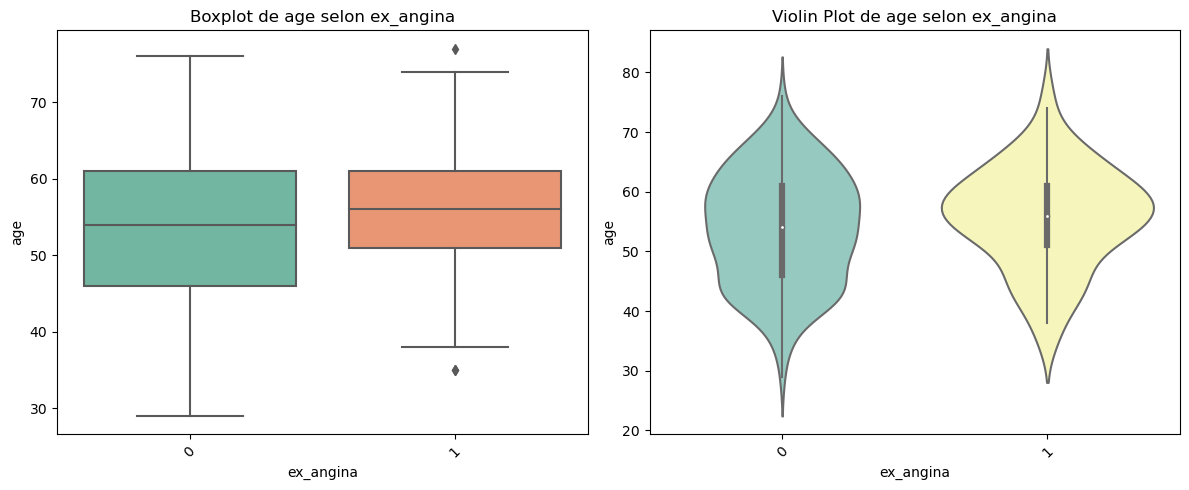

Test t de Student : Statistique=-1.6665, p-value=0.0973
Test de Wilcoxon : Statistique=7117.0000, p-value=0.1201
--------------------------------------------------

🔹 Analyse de age en fonction de slope_peak

1    130
2    122
3     18
Name: slope_peak, dtype: int64


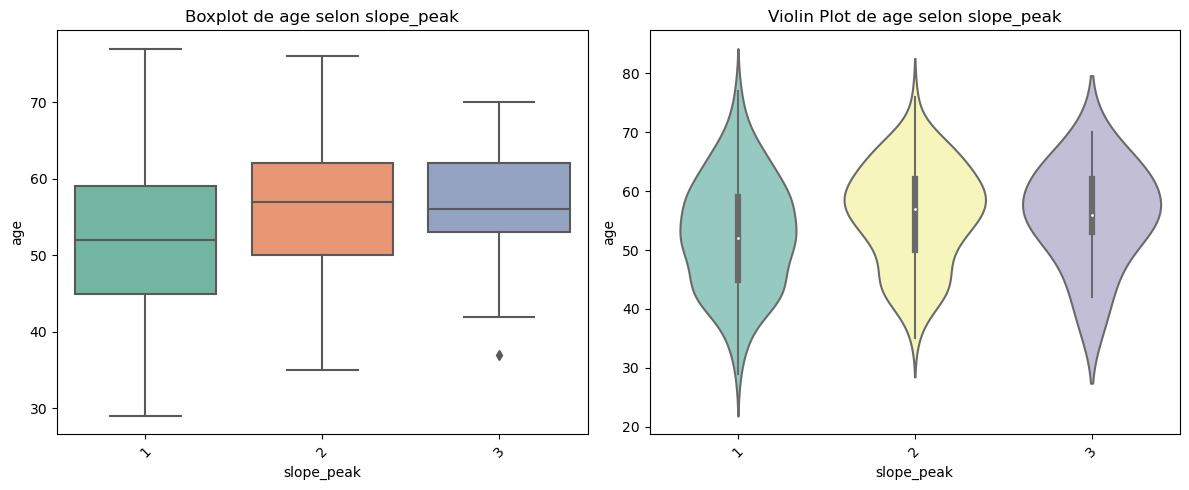

Test ANOVA : Statistique=4.2476, p-value=0.0153
Test Kruskal-Wallis : Statistique=8.6931, p-value=0.0130
--------------------------------------------------

🔹 Analyse de age en fonction de nb_maj_ves

0    160
1     58
2     33
3     19
Name: nb_maj_ves, dtype: int64


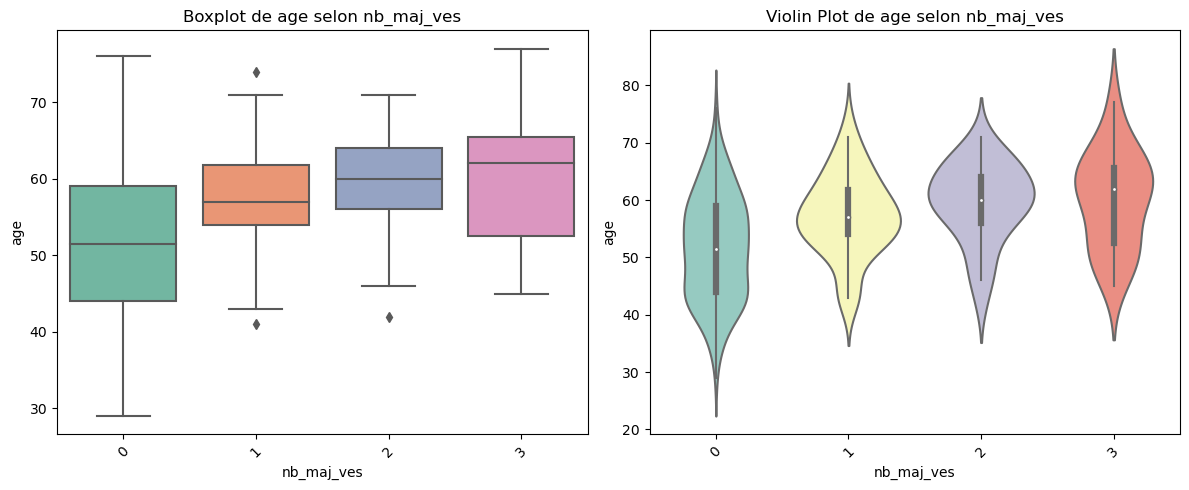

Test ANOVA : Statistique=14.6839, p-value=0.0000
Test Kruskal-Wallis : Statistique=38.1457, p-value=0.0000
--------------------------------------------------

🔹 Analyse de age en fonction de thal

3    152
7    104
6     14
Name: thal, dtype: int64


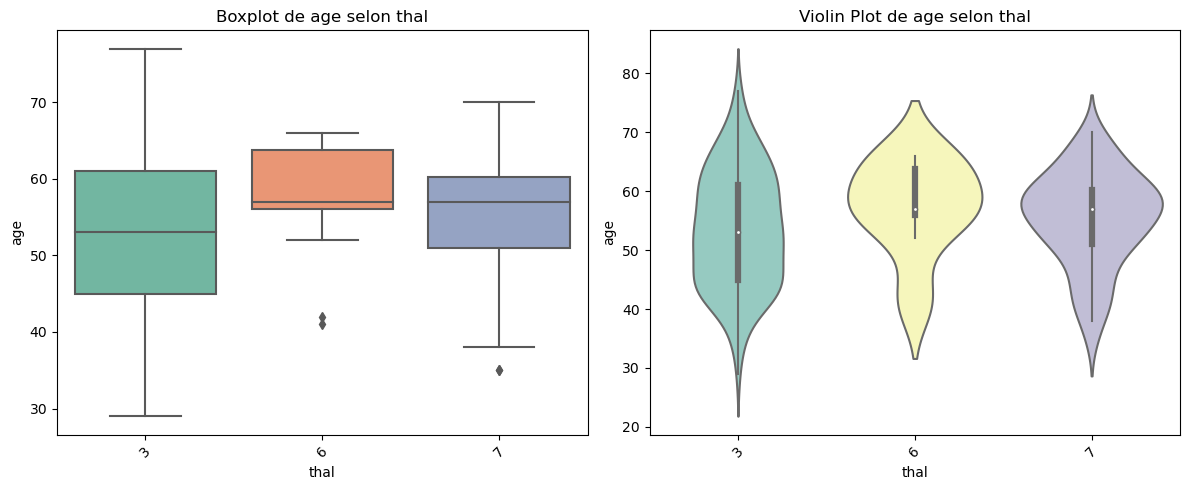

Test ANOVA : Statistique=1.9422, p-value=0.1454
Test Kruskal-Wallis : Statistique=4.4034, p-value=0.1106
--------------------------------------------------

🔹 Analyse de age en fonction de target

1    150
2    120
Name: target, dtype: int64


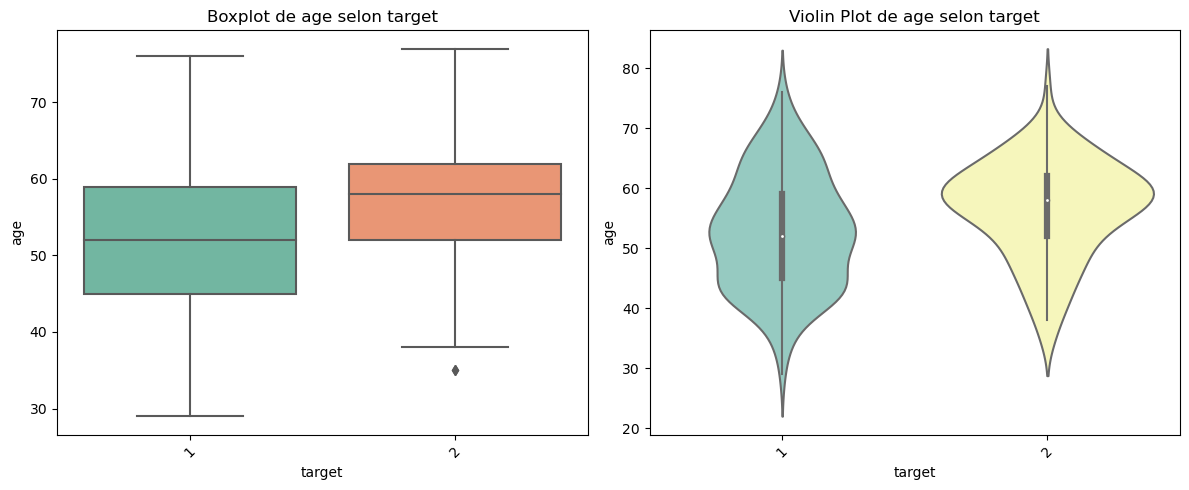

Test t de Student : Statistique=3.6199, p-value=0.0004
Test de Wilcoxon : Statistique=11366.0000, p-value=0.0002
--------------------------------------------------

🔹 Analyse de rest_blood_pres en fonction de sex

1    183
0     87
Name: sex, dtype: int64


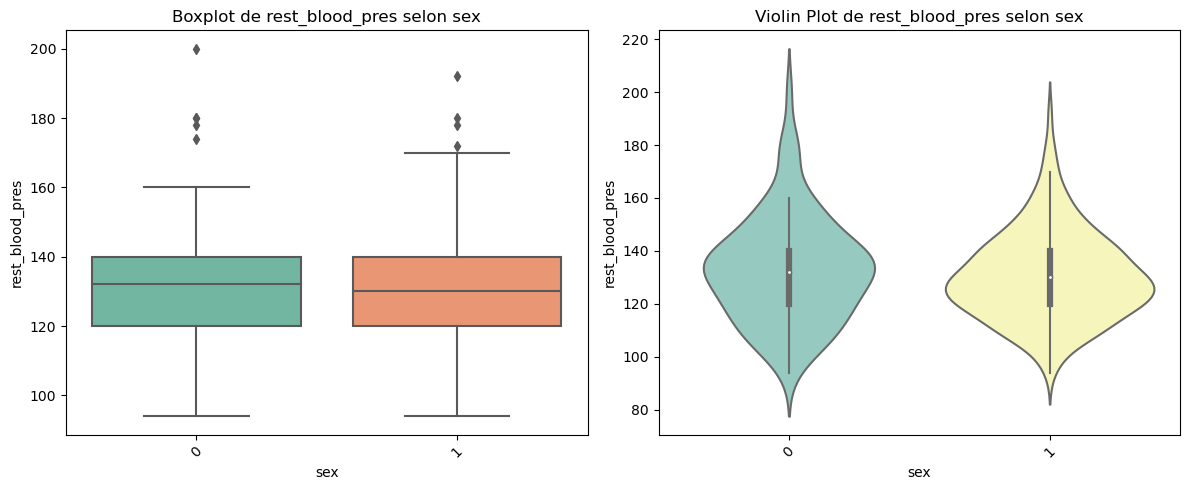

Test t de Student : Statistique=-0.9668, p-value=0.3353
Test de Wilcoxon : Statistique=7421.5000, p-value=0.3678
--------------------------------------------------

🔹 Analyse de rest_blood_pres en fonction de chest_pain_type

4    129
3     79
2     42
1     20
Name: chest_pain_type, dtype: int64


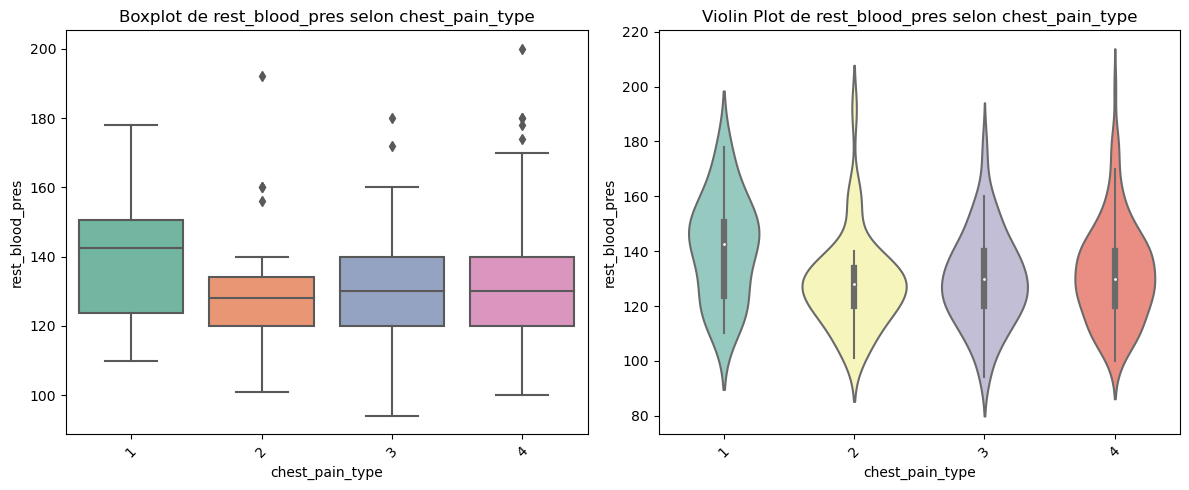

Test ANOVA : Statistique=2.8509, p-value=0.0378
Test Kruskal-Wallis : Statistique=8.0208, p-value=0.0456
--------------------------------------------------

🔹 Analyse de rest_blood_pres en fonction de fast_blood_sugar

0    230
1     40
Name: fast_blood_sugar, dtype: int64


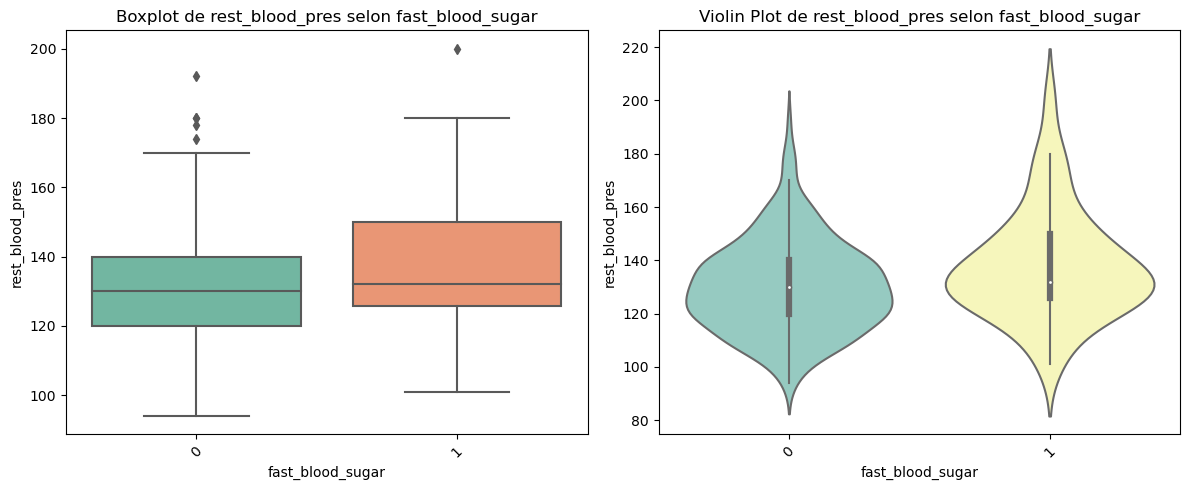

Test t de Student : Statistique=-2.2955, p-value=0.0260
Test de Wilcoxon : Statistique=3603.0000, p-value=0.0283
--------------------------------------------------

🔹 Analyse de rest_blood_pres en fonction de rest_ecg_res

2    137
0    131
1      2
Name: rest_ecg_res, dtype: int64


Test ANOVA : Statistique=4.5321, p-value=0.0116
Test Kruskal-Wallis : Statistique=6.7914, p-value=0.0335
--------------------------------------------------

🔹 Analyse de rest_blood_pres en fonction de ex_angina

0    181
1     89
Name: ex_angina, dtype: int64


Test t de Student : Statistique=-1.2794, p-value=0.2027
Test de Wilcoxon : Statistique=7359.5000, p-value=0.2482
--------------------------------------------------

🔹 Analyse de rest_blood_pres en fonction de slope_peak

1    130
2    122
3     18
Name: slope_peak, dtype: int64


Test ANOVA : Statistique=4.5145, p-value=0.0118
Test Kruskal-Wallis : Statistique=6.4900, p-value=0.0390
--------------------------------------------------

🔹 Analyse de rest_blood_pres en fonction de nb_maj_ves

0    160
1     58
2     33
3     19
Name: nb_maj_ves, dtype: int64


Test ANOVA : Statistique=1.4397, p-value=0.2316
Test Kruskal-Wallis : Statistique=4.7937, p-value=0.1875
--------------------------------------------------

🔹 Analyse de rest_blood_pres en fonction de thal

3    152
7    104
6     14
Name: thal, dtype: int64


Test ANOVA : Statistique=2.5305, p-value=0.0815
Test Kruskal-Wallis : Statistique=4.1953, p-value=0.1227
--------------------------------------------------

🔹 Analyse de rest_blood_pres en fonction de target

1    150
2    120
Name: target, dtype: int64


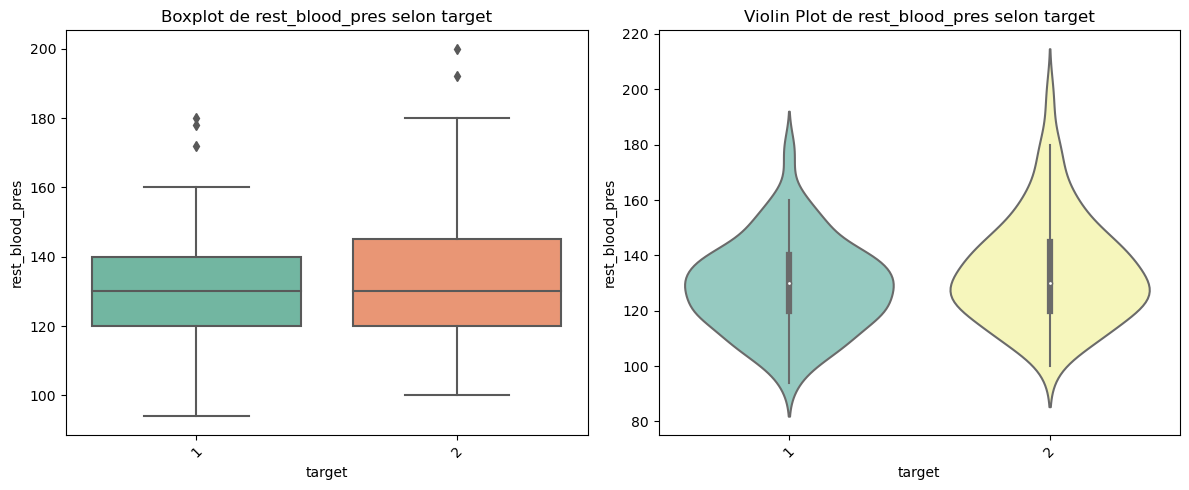

Test t de Student : Statistique=2.5330, p-value=0.0120
Test de Wilcoxon : Statistique=10367.5000, p-value=0.0315
--------------------------------------------------

🔹 Analyse de serum_chol en fonction de sex

1    183
0     87
Name: sex, dtype: int64


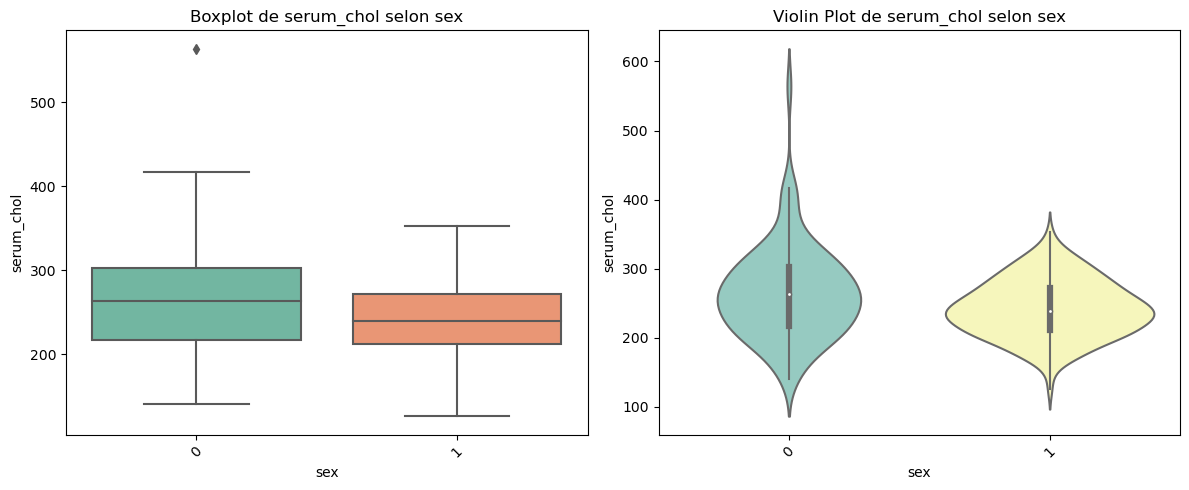

Test t de Student : Statistique=-2.8745, p-value=0.0048
Test de Wilcoxon : Statistique=6403.5000, p-value=0.0094
--------------------------------------------------

🔹 Analyse de serum_chol en fonction de chest_pain_type

4    129
3     79
2     42
1     20
Name: chest_pain_type, dtype: int64


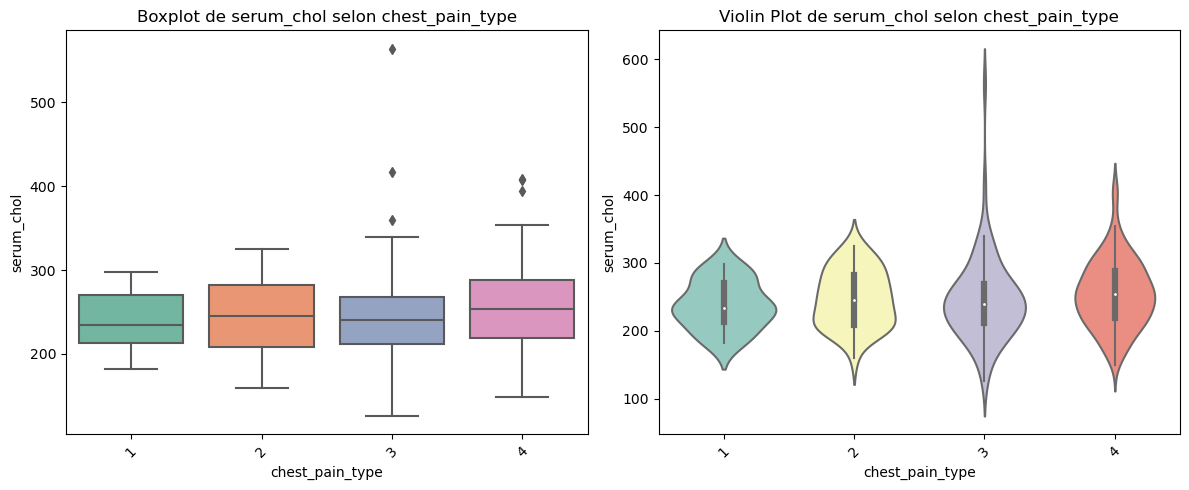

Test ANOVA : Statistique=0.9206, p-value=0.4313
Test Kruskal-Wallis : Statistique=4.0411, p-value=0.2571
--------------------------------------------------

🔹 Analyse de serum_chol en fonction de fast_blood_sugar

0    230
1     40
Name: fast_blood_sugar, dtype: int64


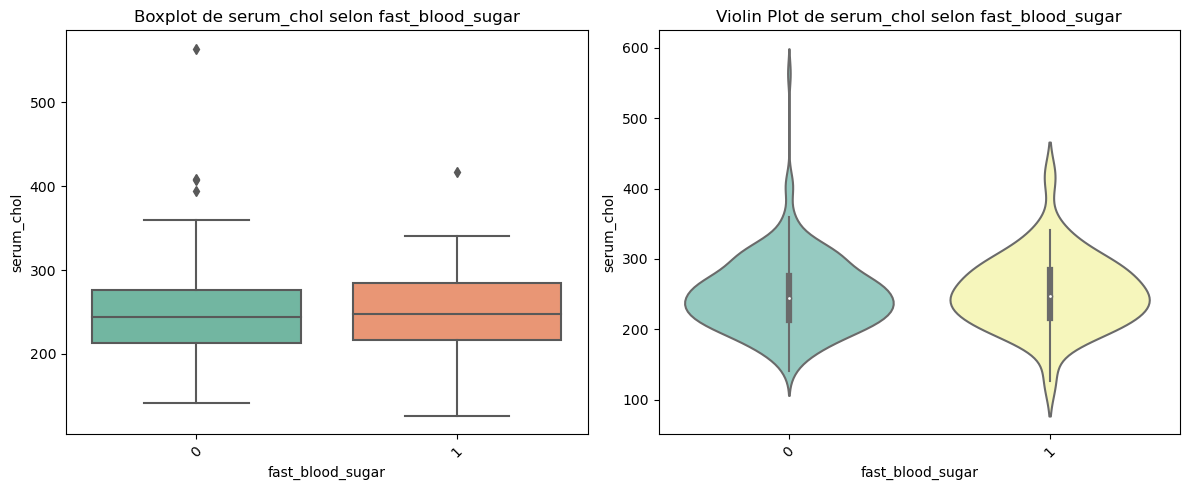

Test t de Student : Statistique=-0.4143, p-value=0.6803
Test de Wilcoxon : Statistique=4357.0000, p-value=0.5947
--------------------------------------------------

🔹 Analyse de serum_chol en fonction de rest_ecg_res

2    137
0    131
1      2
Name: rest_ecg_res, dtype: int64


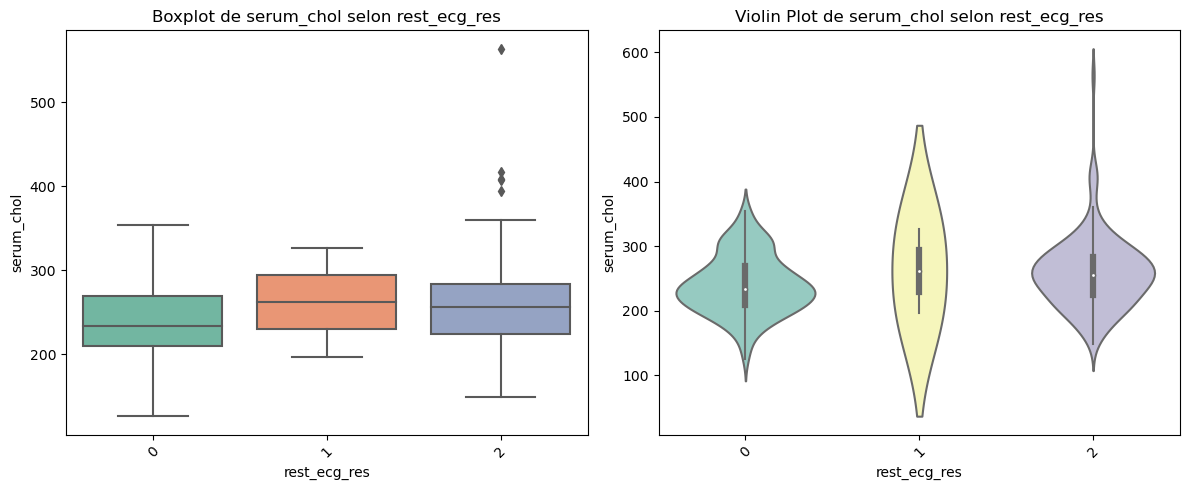

Test ANOVA : Statistique=3.9231, p-value=0.0209
Test Kruskal-Wallis : Statistique=7.2317, p-value=0.0269
--------------------------------------------------

🔹 Analyse de serum_chol en fonction de ex_angina

0    181
1     89
Name: ex_angina, dtype: int64


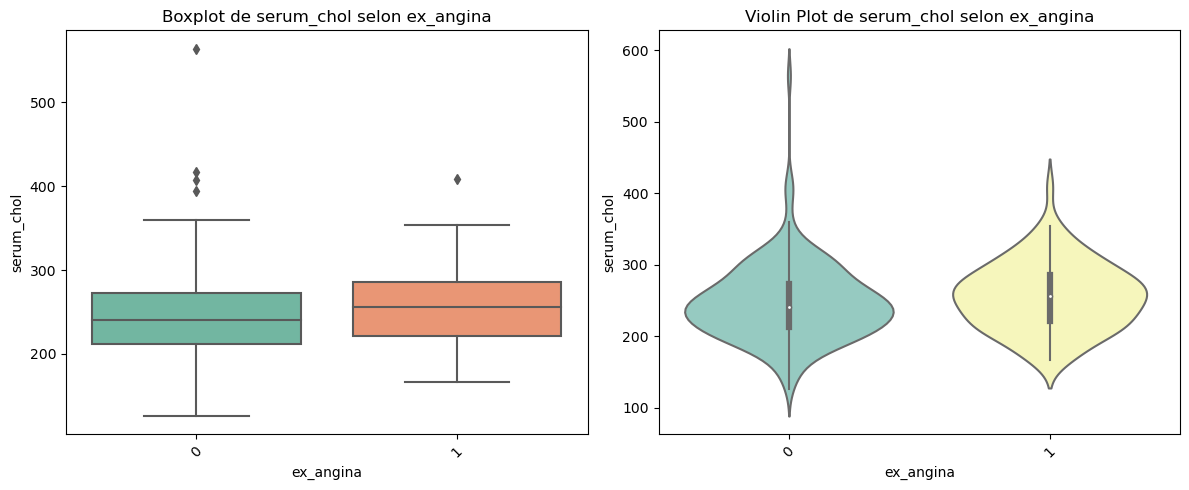

Test t de Student : Statistique=-1.3395, p-value=0.1820
Test de Wilcoxon : Statistique=7023.0000, p-value=0.0874
--------------------------------------------------

🔹 Analyse de serum_chol en fonction de slope_peak

1    130
2    122
3     18
Name: slope_peak, dtype: int64


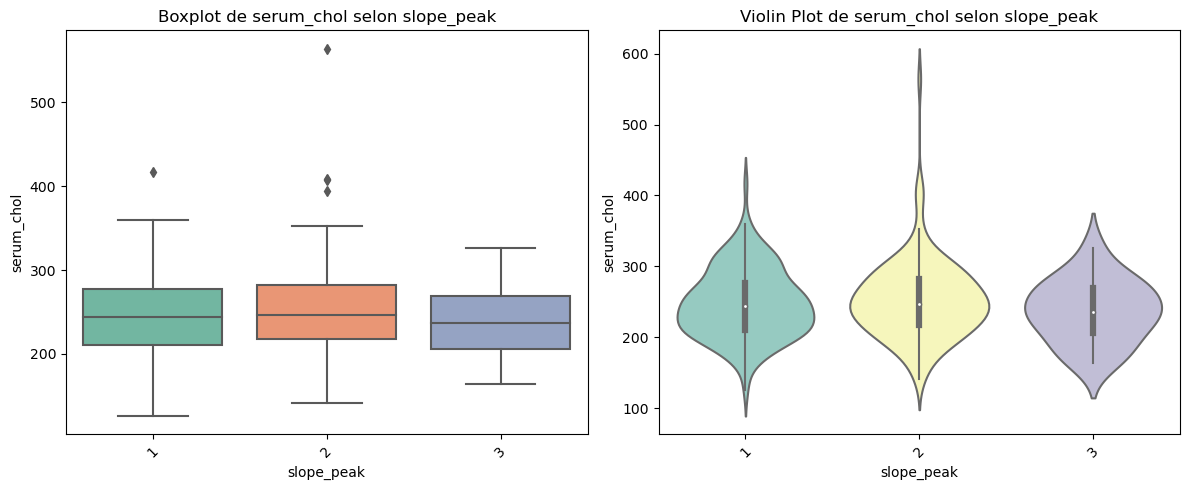

Test ANOVA : Statistique=0.8541, p-value=0.4268
Test Kruskal-Wallis : Statistique=1.1885, p-value=0.5520
--------------------------------------------------

🔹 Analyse de serum_chol en fonction de nb_maj_ves

0    160
1     58
2     33
3     19
Name: nb_maj_ves, dtype: int64


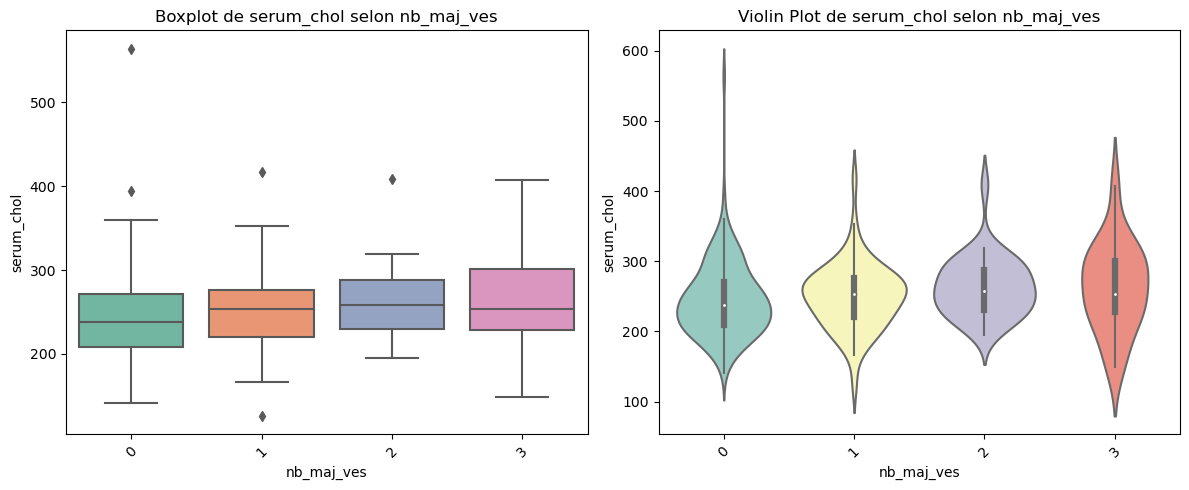

Test ANOVA : Statistique=1.5681, p-value=0.1975
Test Kruskal-Wallis : Statistique=6.9237, p-value=0.0744
--------------------------------------------------

🔹 Analyse de serum_chol en fonction de thal

3    152
7    104
6     14
Name: thal, dtype: int64


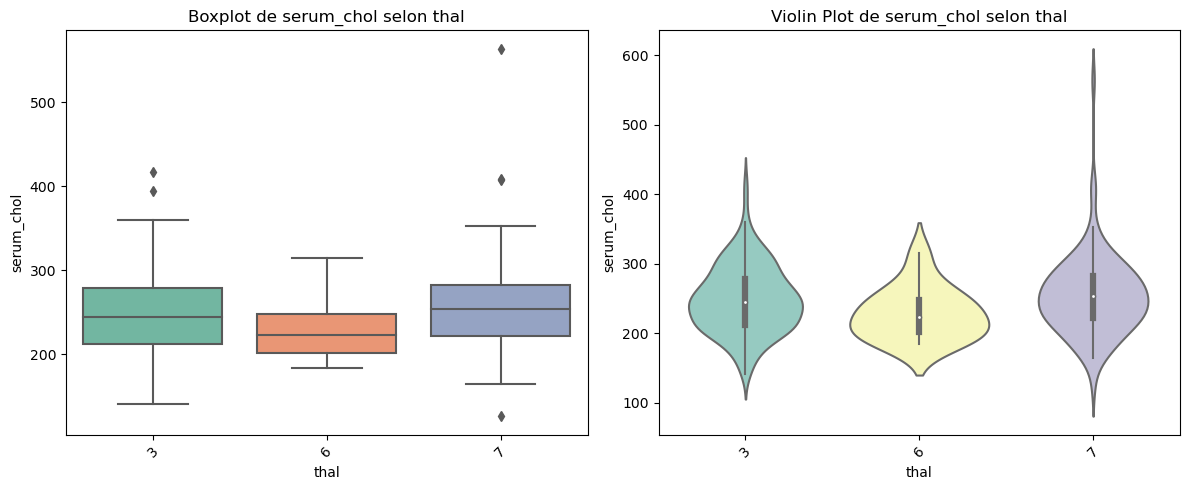

Test ANOVA : Statistique=1.5183, p-value=0.2210
Test Kruskal-Wallis : Statistique=3.4309, p-value=0.1799
--------------------------------------------------

🔹 Analyse de serum_chol en fonction de target

1    150
2    120
Name: target, dtype: int64


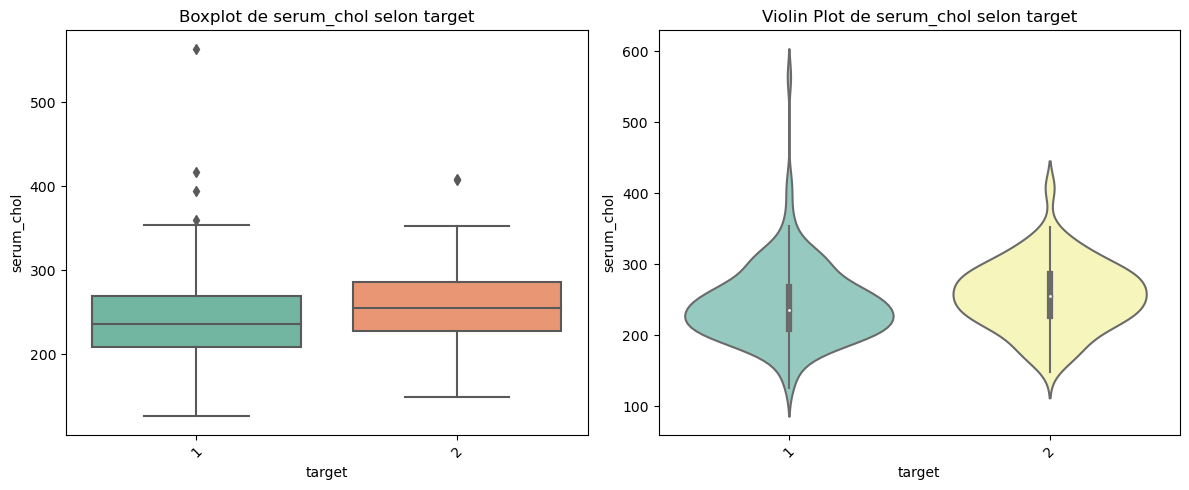

Test t de Student : Statistique=1.9715, p-value=0.0497
Test de Wilcoxon : Statistique=10699.5000, p-value=0.0077
--------------------------------------------------

🔹 Analyse de max_heart_rate en fonction de sex

1    183
0     87
Name: sex, dtype: int64


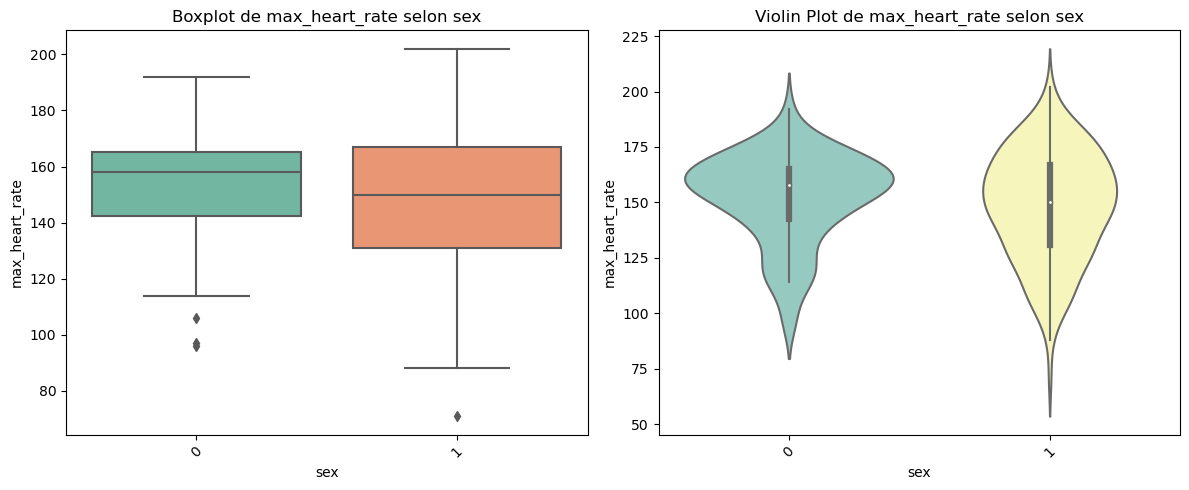

Test t de Student : Statistique=-1.3434, p-value=0.1806
Test de Wilcoxon : Statistique=7211.0000, p-value=0.2115
--------------------------------------------------

🔹 Analyse de max_heart_rate en fonction de chest_pain_type

4    129
3     79
2     42
1     20
Name: chest_pain_type, dtype: int64


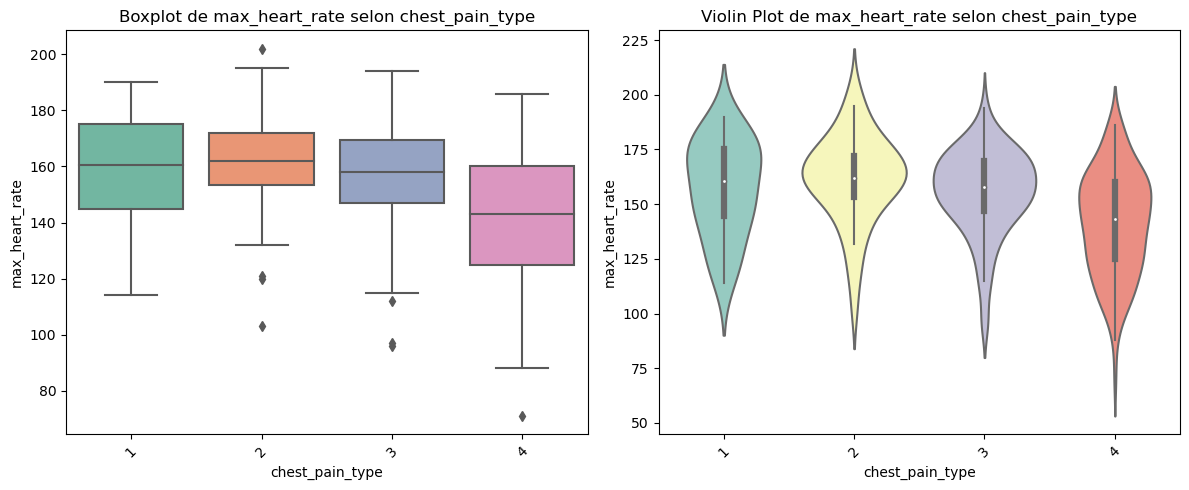

Test ANOVA : Statistique=13.2740, p-value=0.0000
Test Kruskal-Wallis : Statistique=35.3091, p-value=0.0000
--------------------------------------------------

🔹 Analyse de max_heart_rate en fonction de fast_blood_sugar

0    230
1     40
Name: fast_blood_sugar, dtype: int64


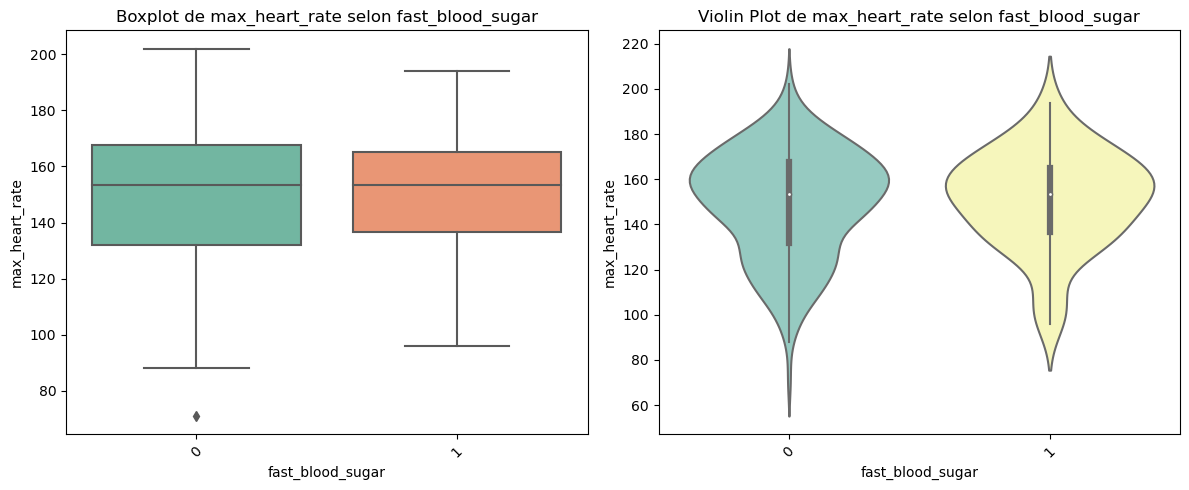

Test t de Student : Statistique=-0.3926, p-value=0.6961
Test de Wilcoxon : Statistique=4491.0000, p-value=0.8118
--------------------------------------------------

🔹 Analyse de max_heart_rate en fonction de rest_ecg_res

2    137
0    131
1      2
Name: rest_ecg_res, dtype: int64


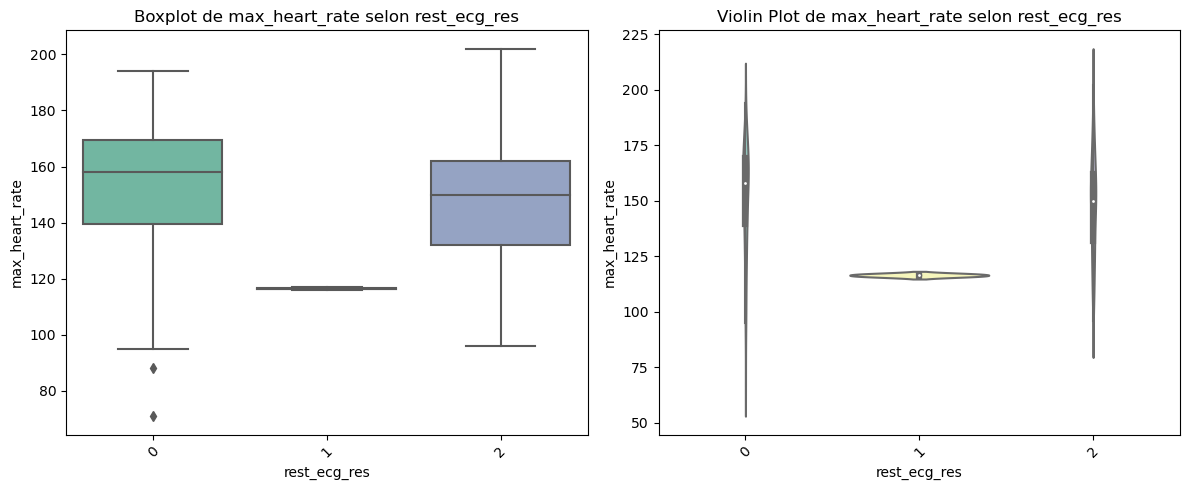

Test ANOVA : Statistique=2.8593, p-value=0.0591
Test Kruskal-Wallis : Statistique=7.3192, p-value=0.0257
--------------------------------------------------

🔹 Analyse de max_heart_rate en fonction de ex_angina

0    181
1     89
Name: ex_angina, dtype: int64


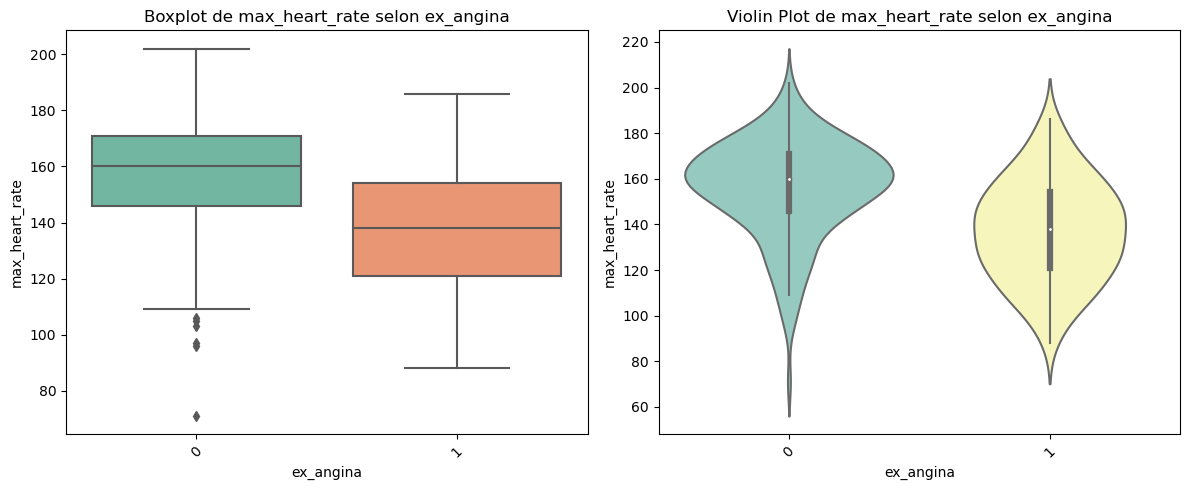

Test t de Student : Statistique=6.6706, p-value=0.0000
Test de Wilcoxon : Statistique=11953.0000, p-value=0.0000
--------------------------------------------------

🔹 Analyse de max_heart_rate en fonction de slope_peak

1    130
2    122
3     18
Name: slope_peak, dtype: int64


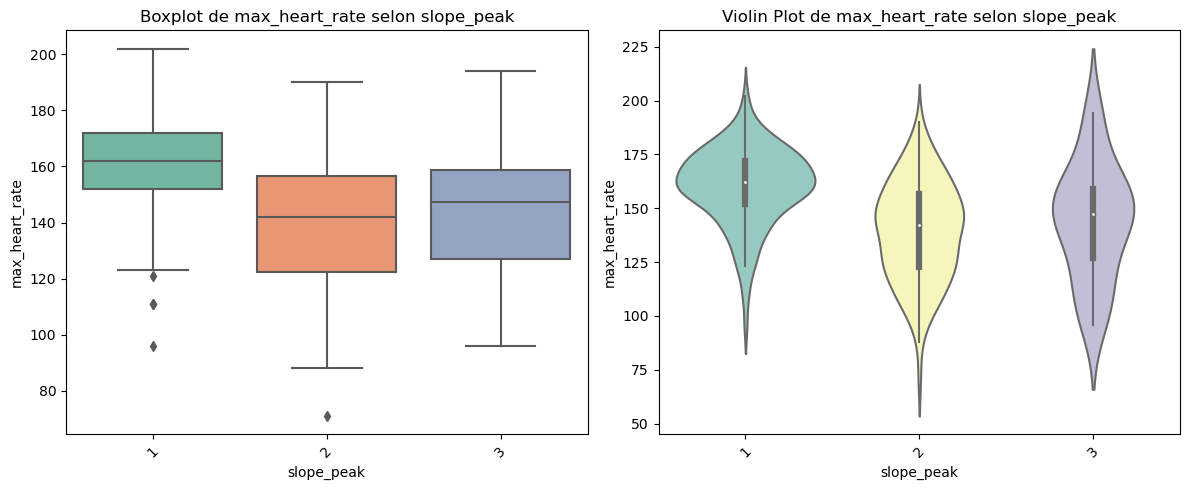

Test ANOVA : Statistique=32.7864, p-value=0.0000
Test Kruskal-Wallis : Statistique=55.3508, p-value=0.0000
--------------------------------------------------

🔹 Analyse de max_heart_rate en fonction de nb_maj_ves

0    160
1     58
2     33
3     19
Name: nb_maj_ves, dtype: int64


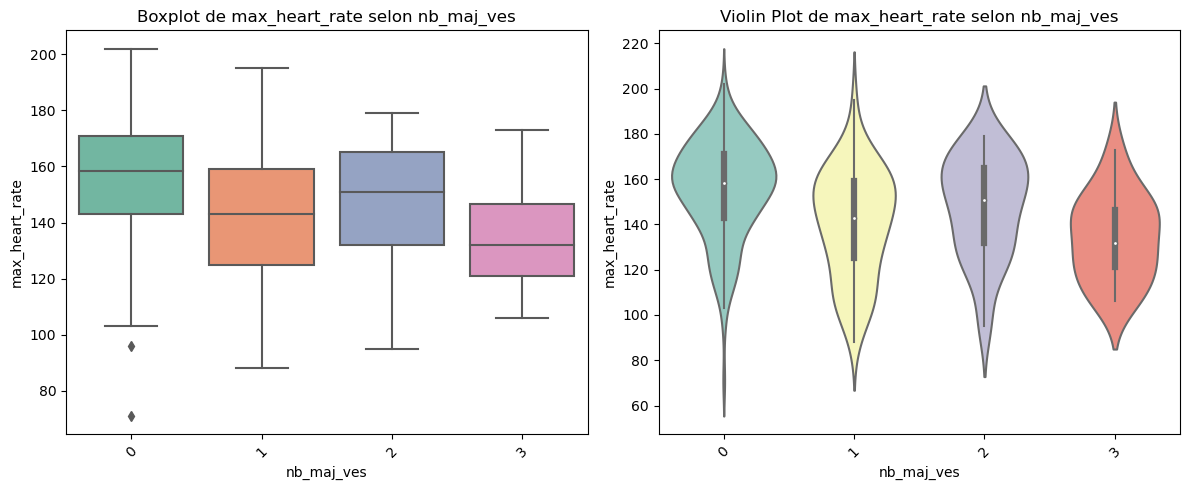

Test ANOVA : Statistique=10.2889, p-value=0.0000
Test Kruskal-Wallis : Statistique=28.9635, p-value=0.0000
--------------------------------------------------

🔹 Analyse de max_heart_rate en fonction de thal

3    152
7    104
6     14
Name: thal, dtype: int64


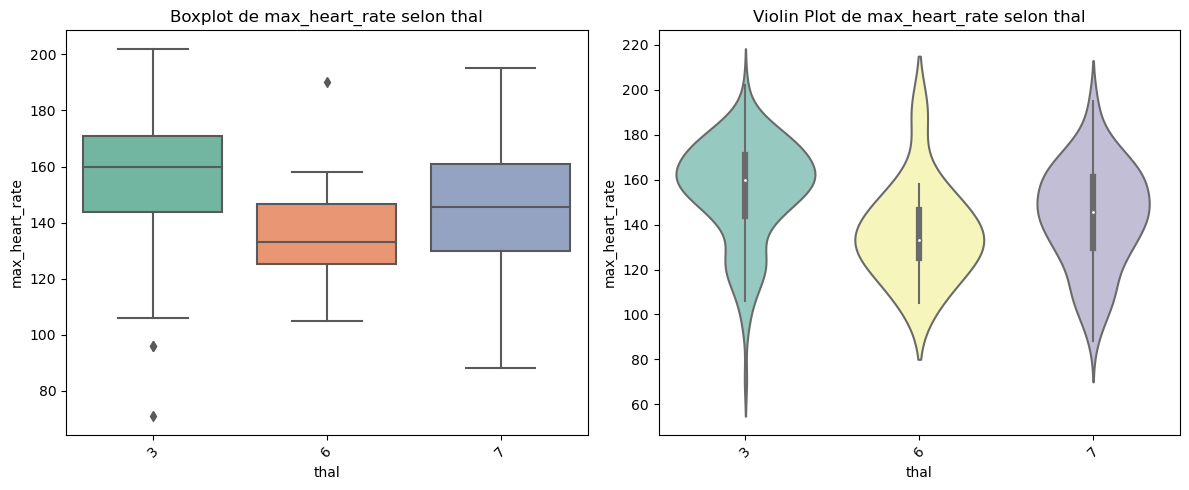

Test ANOVA : Statistique=10.5154, p-value=0.0000
Test Kruskal-Wallis : Statistique=24.2681, p-value=0.0000
--------------------------------------------------

🔹 Analyse de max_heart_rate en fonction de target

1    150
2    120
Name: target, dtype: int64


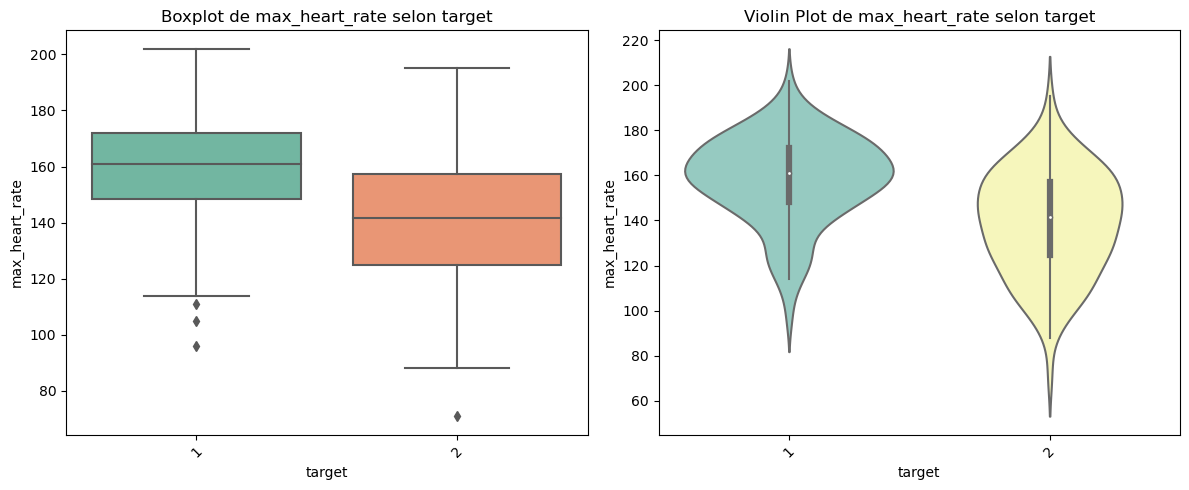

Test t de Student : Statistique=-7.3939, p-value=0.0000
Test de Wilcoxon : Statistique=4611.5000, p-value=0.0000
--------------------------------------------------

🔹 Analyse de oldpeak en fonction de sex

1    183
0     87
Name: sex, dtype: int64


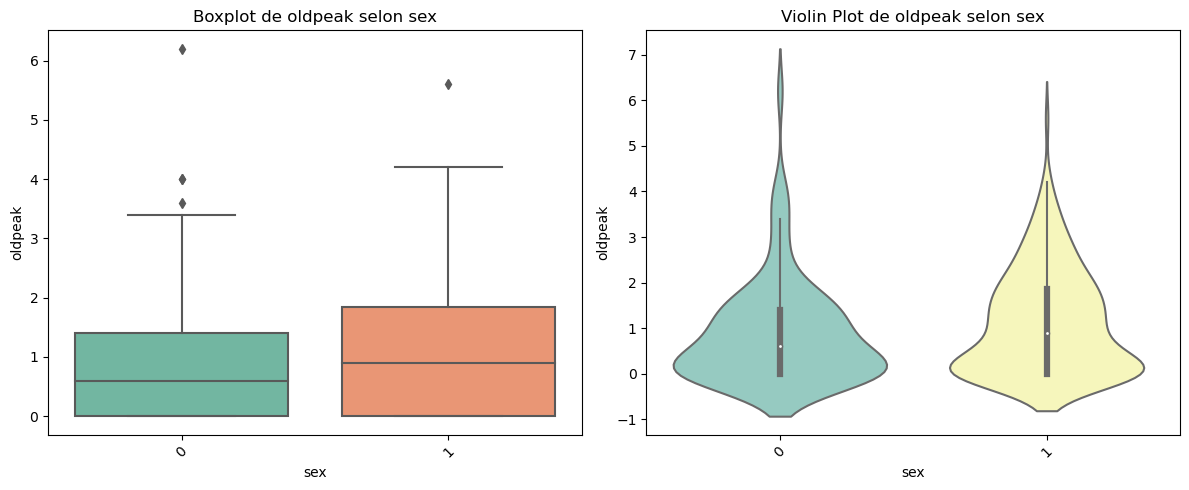

Test t de Student : Statistique=1.6087, p-value=0.1095
Test de Wilcoxon : Statistique=9040.0000, p-value=0.0674
--------------------------------------------------

🔹 Analyse de oldpeak en fonction de chest_pain_type

4    129
3     79
2     42
1     20
Name: chest_pain_type, dtype: int64


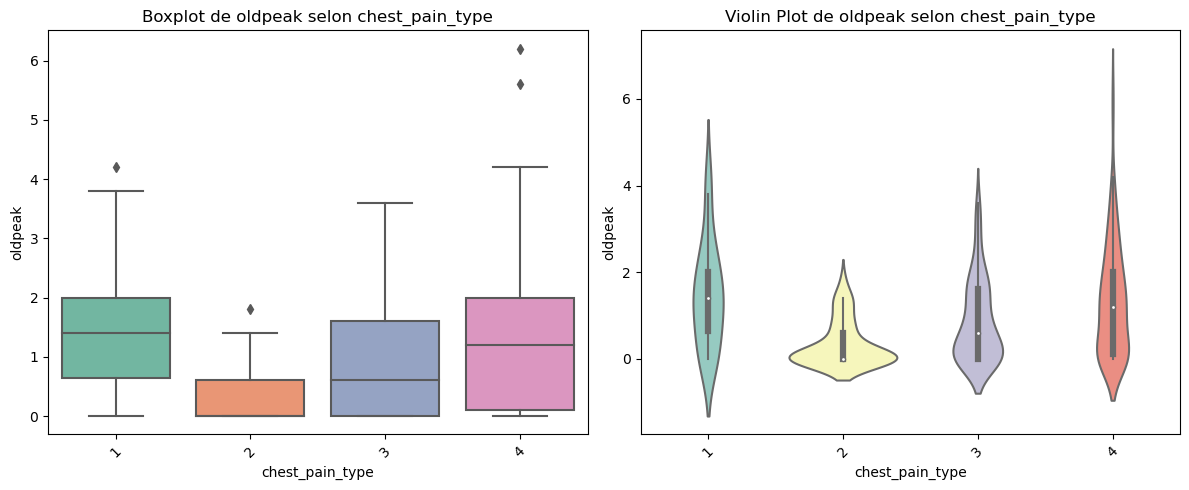

Test ANOVA : Statistique=10.5090, p-value=0.0000
Test Kruskal-Wallis : Statistique=31.3074, p-value=0.0000
--------------------------------------------------

🔹 Analyse de oldpeak en fonction de fast_blood_sugar

0    230
1     40
Name: fast_blood_sugar, dtype: int64


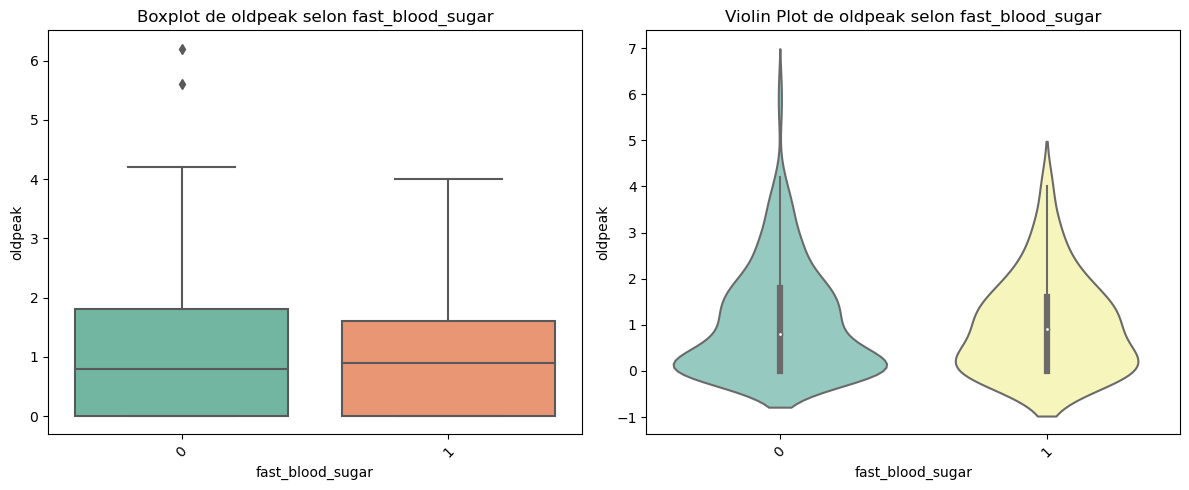

Test t de Student : Statistique=0.4586, p-value=0.6482
Test de Wilcoxon : Statistique=4664.5000, p-value=0.8865
--------------------------------------------------

🔹 Analyse de oldpeak en fonction de rest_ecg_res

2    137
0    131
1      2
Name: rest_ecg_res, dtype: int64


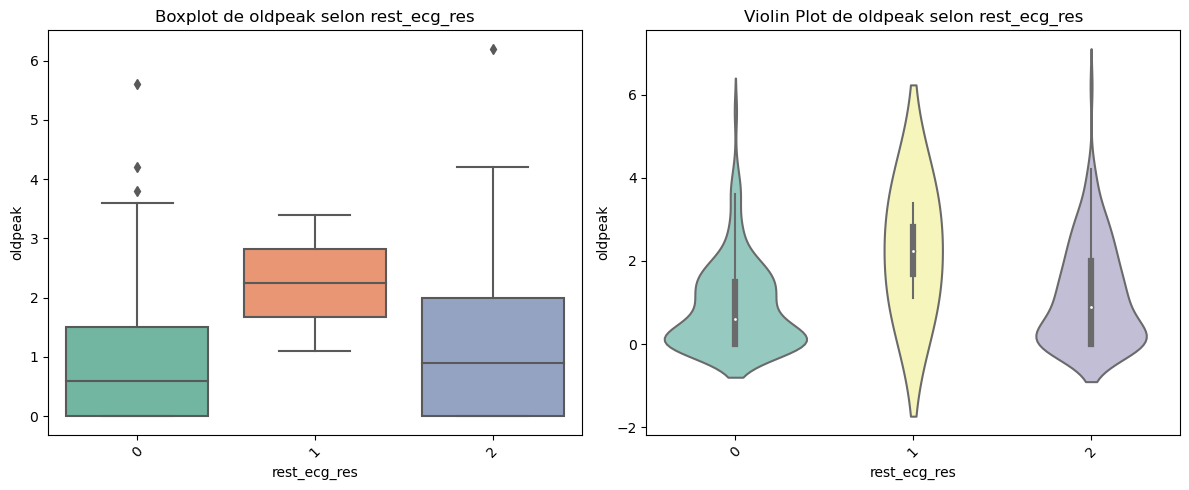

Test ANOVA : Statistique=3.0973, p-value=0.0468
Test Kruskal-Wallis : Statistique=5.0887, p-value=0.0785
--------------------------------------------------

🔹 Analyse de oldpeak en fonction de ex_angina

0    181
1     89
Name: ex_angina, dtype: int64


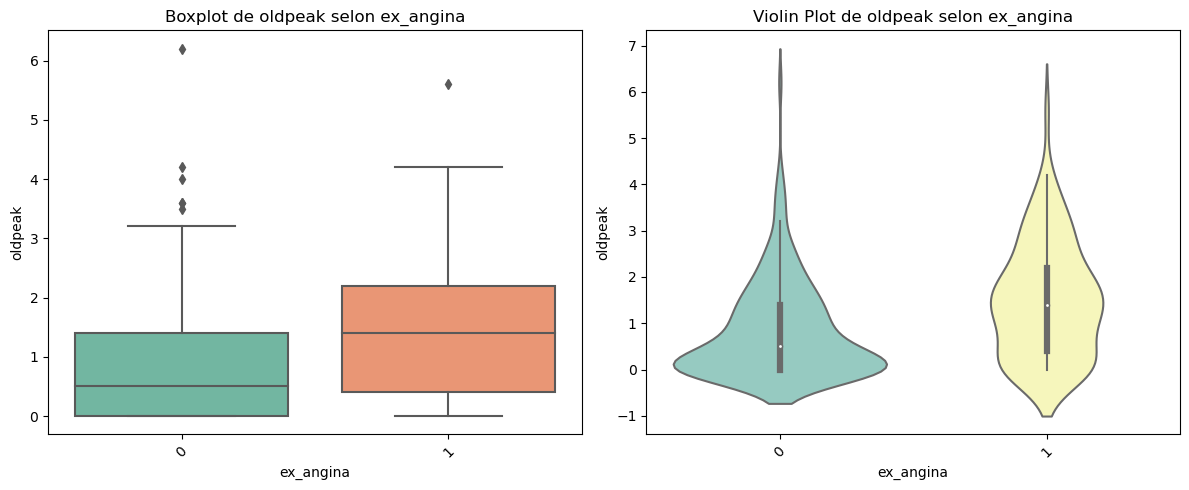

Test t de Student : Statistique=-4.4058, p-value=0.0000
Test de Wilcoxon : Statistique=5364.0000, p-value=0.0000
--------------------------------------------------

🔹 Analyse de oldpeak en fonction de slope_peak

1    130
2    122
3     18
Name: slope_peak, dtype: int64


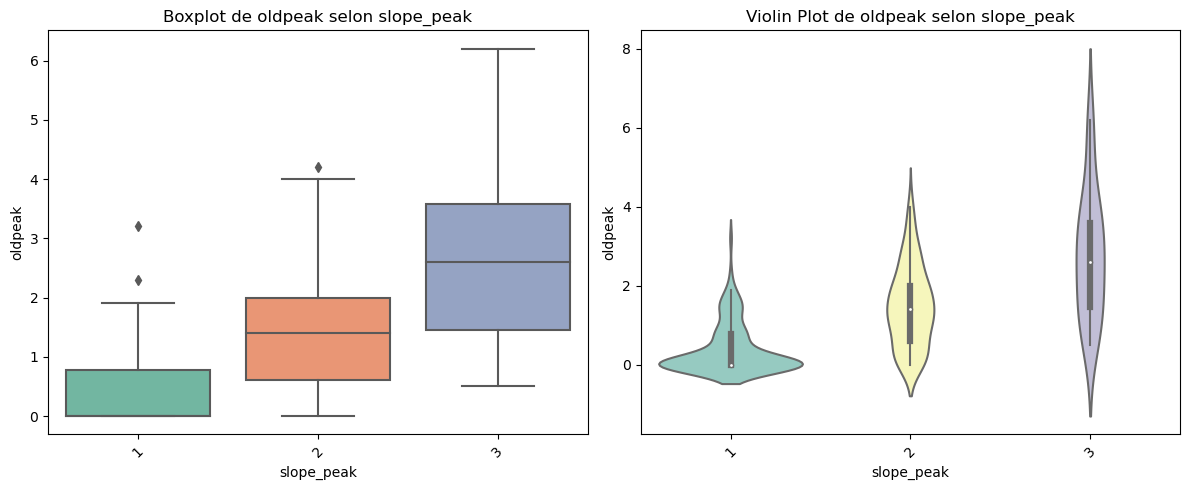

Test ANOVA : Statistique=79.3478, p-value=0.0000
Test Kruskal-Wallis : Statistique=105.1669, p-value=0.0000
--------------------------------------------------

🔹 Analyse de oldpeak en fonction de nb_maj_ves

0    160
1     58
2     33
3     19
Name: nb_maj_ves, dtype: int64


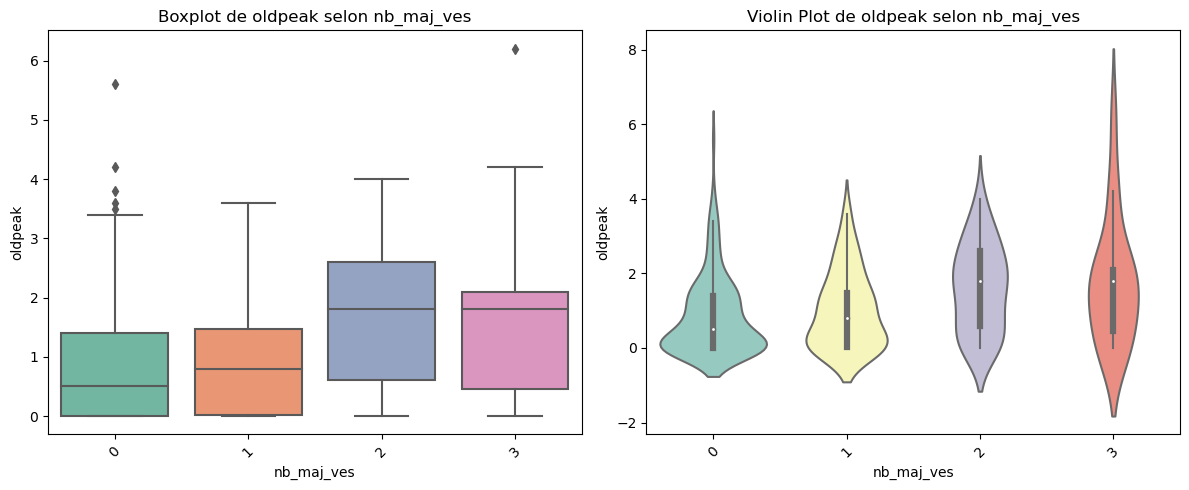

Test ANOVA : Statistique=6.6371, p-value=0.0002
Test Kruskal-Wallis : Statistique=17.9831, p-value=0.0004
--------------------------------------------------

🔹 Analyse de oldpeak en fonction de thal

3    152
7    104
6     14
Name: thal, dtype: int64


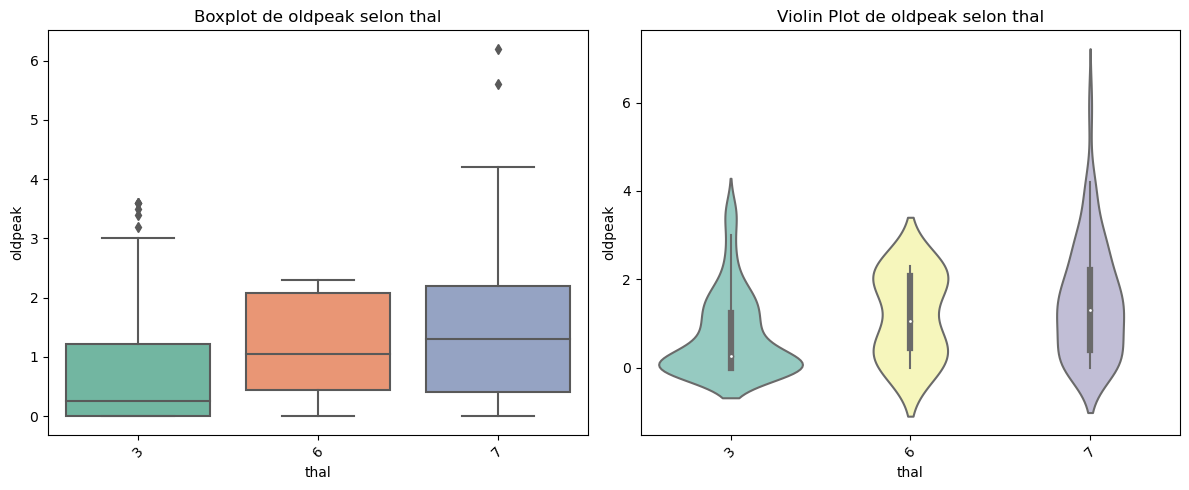

Test ANOVA : Statistique=15.8115, p-value=0.0000
Test Kruskal-Wallis : Statistique=31.1627, p-value=0.0000
--------------------------------------------------

🔹 Analyse de oldpeak en fonction de target

1    150
2    120
Name: target, dtype: int64


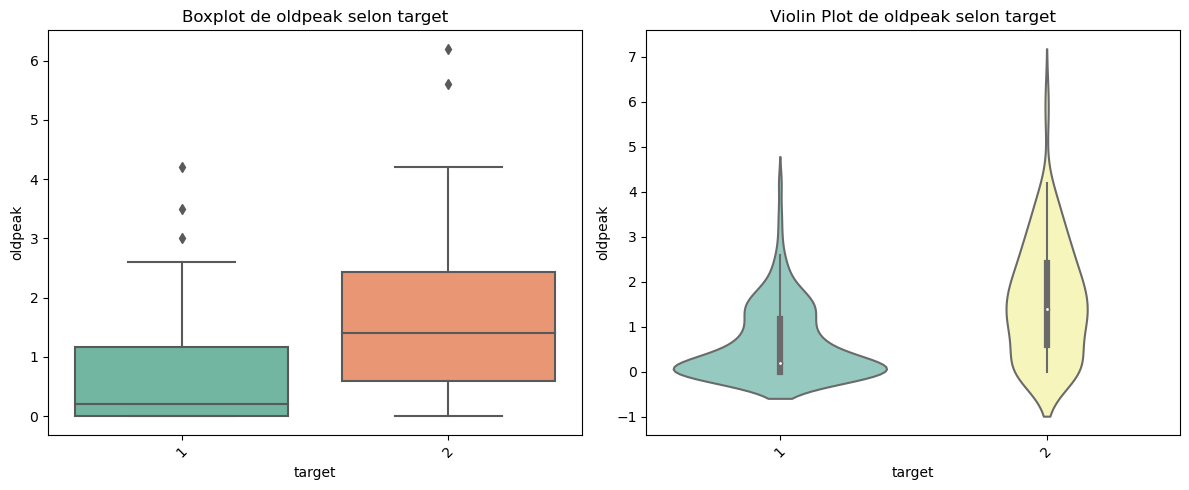

Test t de Student : Statistique=7.1719, p-value=0.0000
Test de Wilcoxon : Statistique=13170.5000, p-value=0.0000
--------------------------------------------------


In [29]:
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway, kruskal

# Charger le jeu de données (remplace 'data.csv' par ton fichier)
#df = pd.read_csv("data.csv")
df = data

# Identifier les variables qualitatives et quantitatives
var_quali = df.select_dtypes(include=['object', 'category']).columns.tolist()
var_quanti = df.select_dtypes(include=['number']).columns.tolist()

# Boucle sur chaque paire de variables (quantitative, qualitative)
for quanti in var_quanti:
    for quali in var_quali:
        print(f"\n🔹 Analyse de {quanti} en fonction de {quali}\n")

        # Affichage des effectifs par modalité
        print(df[quali].value_counts())

        # Création des boxplots et violon plots
        plt.figure(figsize=(12, 5))

        # Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df[quali], y=df[quanti], palette="Set2")
        plt.title(f"Boxplot de {quanti} selon {quali}")
        plt.xticks(rotation=45)

        # Violin plot
        plt.subplot(1, 2, 2)
        sns.violinplot(x=df[quali], y=df[quanti], palette="Set3")
        plt.title(f"Violin Plot de {quanti} selon {quali}")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        # Test statistique
        categories = df[quali].dropna().unique()
        
        if len(categories) == 2:  # Test t de Student si 2 modalités
            group1 = df[df[quali] == categories[0]][quanti].dropna()
            group2 = df[df[quali] == categories[1]][quanti].dropna()
            stat_Student, p_value_Student = ttest_ind(group1, group2, equal_var=False)
            print(f"Test t de Student : Statistique={stat_Student:.4f}, p-value={p_value_Student:.4f}")
            stat_Wilcoxon, p_value_Wilcoxon = stats.mannwhitneyu(group1, group2)
            print(f"Test de Wilcoxon : Statistique={stat_Wilcoxon:.4f}, p-value={p_value_Wilcoxon:.4f}")
        
        elif len(categories) > 2:  # ANOVA si plus de 2 modalités
            groups = [df[df[quali] == cat][quanti].dropna() for cat in categories]
            stat, p_value = f_oneway(*groups)
            print(f"Test ANOVA : Statistique={stat:.4f}, p-value={p_value:.4f}")
            stat_KW, p_value_KW = stats.kruskal(*groups)
            print(f"Test Kruskal-Wallis : Statistique={stat_KW:.4f}, p-value={p_value_KW:.4f}")
        
        print("-" * 50)


#### Classement de la force des liaisons des variables quantitatives avec la variable cible

In [72]:
# Séparation des caractéristiques et de la variable cible
X_biv = data.drop(columns=['target'])
y_biv = data['target']

* Fonction

In [73]:
from scipy.stats import ttest_ind, mannwhitneyu
from itertools import combinations

def test_student_mannwhitney(X, y):
    """
    Effectue un test de Student (t-test) et un test de Mann-Whitney entre toutes les paires
    possibles de groupes dans la variable cible et l'ensemble des variables quantitatives.
    Les résultats des tests sont triés en fonction des valeurs des statistiques de test, et
    des graphiques sont générés pour visualiser le classement des variables.

    Paramètres :
    ------------
    X : pandas.DataFrame
        Le DataFrame contenant les variables explicatives (features).
    
    y : pandas.Series ou pandas.DataFrame
        La variable cible avec des classes (0, 1, ... ou plus).
    
    Retours :
    ---------
    ttest_results : pandas.DataFrame
        Un DataFrame contenant les résultats du test de Student pour chaque variable, trié par la statistique de test.
    
    mannwhitney_results : pandas.DataFrame
        Un DataFrame contenant les résultats du test de Mann-Whitney pour chaque variable, trié par la statistique de test.
    
    Visualisations :
    ----------------
    Deux graphiques sont générés :
    - Le premier montre le classement des variables selon le test de Student.
    - Le second montre le classement des variables selon le test de Mann-Whitney.
    """
    
    # Sélectionner uniquement les variables quantitatives
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    
    # Obtenir toutes les combinaisons possibles de paires dans la variable cible
    unique_classes = y.unique()
    class_pairs = list(combinations(unique_classes, 2))
    
    # Listes pour stocker les résultats des tests
    ttest_results = []
    mannwhitney_results = []
    
    # Appliquer les tests de Student et Mann-Whitney à chaque variable quantitative et à chaque paire de classes
    for feature in numeric_features:
        for class1, class2 in class_pairs:
            group1 = X[feature][y == class1]
            group2 = X[feature][y == class2]
            
            # Test de Student
            t_stat, t_pvalue = ttest_ind(group1, group2)
            ttest_results.append({'Feature': feature, 'T-Statistic': t_stat, 'P-Value': t_pvalue, 'Class Pair': f'{class1} vs {class2}'})
            
            # Test de Mann-Whitney (pour comparer deux groupes indépendants)
            mw_stat, mw_pvalue = mannwhitneyu(group1, group2, alternative='two-sided')
            mannwhitney_results.append({'Feature': feature, 'Mann-Whitney U': mw_stat, 'P-Value': mw_pvalue, 'Class Pair': f'{class1} vs {class2}'})
    
    # Convertir les listes en DataFrames
    ttest_results = pd.DataFrame(ttest_results).sort_values(by='T-Statistic', ascending=False)
    mannwhitney_results = pd.DataFrame(mannwhitney_results).sort_values(by='Mann-Whitney U', ascending=False)
    
    # Classer les statistiques de test du plus grand au plus petit pour la visualisation
    ttest_results['Feature'] = pd.Categorical(ttest_results['Feature'], categories=ttest_results['Feature'].unique(), ordered=True)
    mannwhitney_results['Feature'] = pd.Categorical(mannwhitney_results['Feature'], categories=mannwhitney_results['Feature'].unique(), ordered=True)
    
    # Visualisation des résultats
    plt.figure(figsize=(12, 6))
    sns.barplot(x='T-Statistic', y='Feature', data=ttest_results, palette='viridis', hue='Class Pair', dodge=False)
    plt.title('Classement des variables selon le test de Student')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Mann-Whitney U', y='Feature', data=mannwhitney_results, palette='magma', hue='Class Pair', dodge=False)
    plt.title('Classement des variables selon le test de Mann-Whitney')
    plt.show()
    
    # Retourner les résultats triés
    return ttest_results, mannwhitney_results


* Utilisation de la fonction

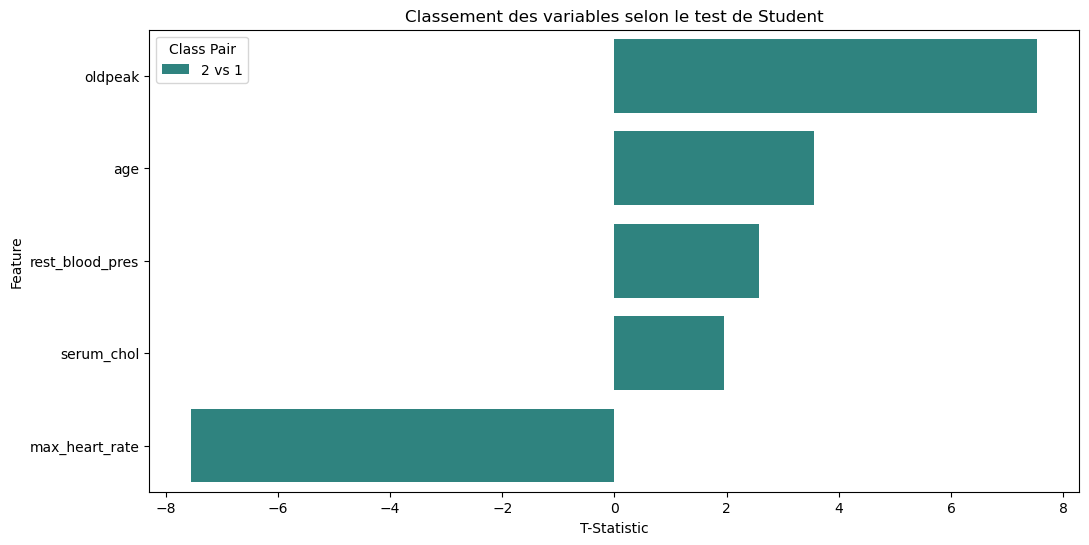

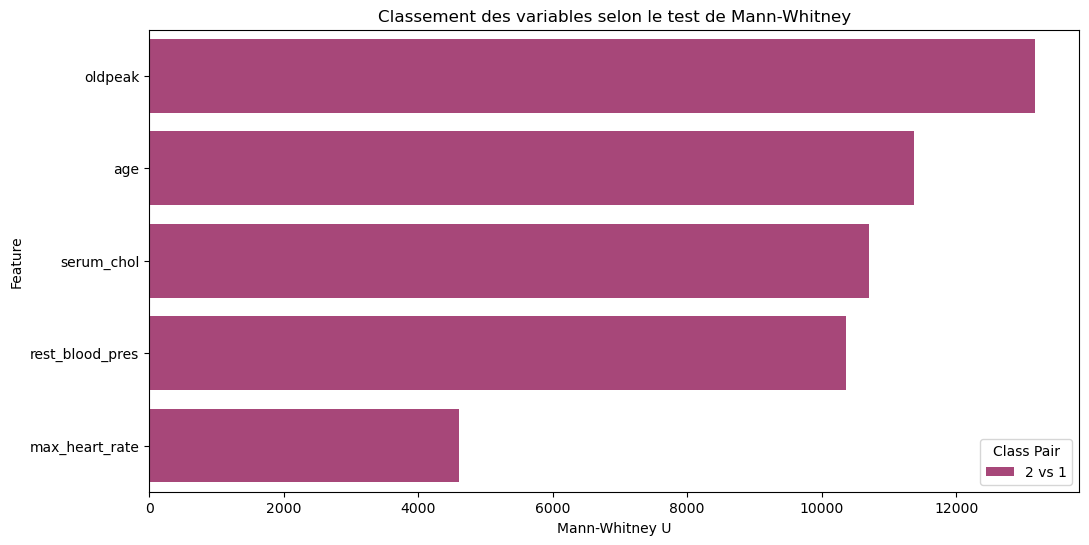

Résultats du test de Student :
           Feature  T-Statistic       P-Value Class Pair
4          oldpeak     7.531875  7.677946e-13     2 vs 1
0              age     3.556964  4.434804e-04     2 vs 1
1  rest_blood_pres     2.574999  1.056095e-02     2 vs 1
2       serum_chol     1.945677  5.273889e-02     2 vs 1
3   max_heart_rate    -7.543813  7.119583e-13     2 vs 1

Résultats du test de Mann-Whitney :
           Feature  Mann-Whitney U       P-Value Class Pair
4          oldpeak         13170.5  2.979412e-11     2 vs 1
0              age         11366.0  2.051984e-04     2 vs 1
2       serum_chol         10699.5  7.700853e-03     2 vs 1
1  rest_blood_pres         10367.5  3.154067e-02     2 vs 1
3   max_heart_rate          4611.5  5.841045e-12     2 vs 1


In [74]:
# Utilisation de la fonction
ttest_results, mannwhitney_results = test_student_mannwhitney(X_biv, y_biv)

# Affichage des résultats
print("Résultats du test de Student :")
print(ttest_results)
print("\nRésultats du test de Mann-Whitney :")
print(mannwhitney_results)

#### 3.2.2.3. Entre variables qualitatives

#### Barplots et tests statistiques sur l'ensemble du jeu de données


🔹 Analyse entre sex et chest_pain_type

Table de contingence :
 chest_pain_type   1   2   3   4
sex                            
0                 4  16  32  35
1                16  26  47  94

Test du Khi-2 : χ² = 6.0443, p-value = 0.1095, avec V de Cramer : 0.1496210084632855


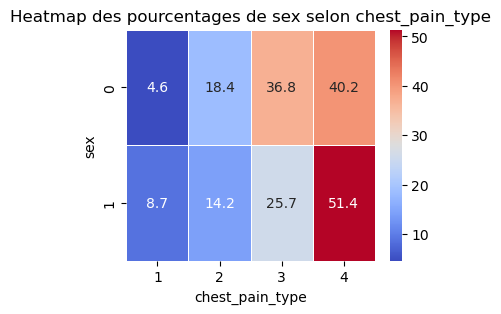

--------------------------------------------------

🔹 Analyse entre sex et fast_blood_sugar

Table de contingence :
 fast_blood_sugar    0   1
sex                      
0                  76  11
1                 154  29

Test du Khi-2 : χ² = 0.2592, p-value = 0.6107, avec V de Cramer : 0.030985048685898343


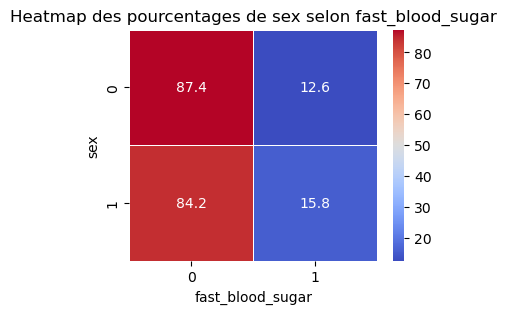

--------------------------------------------------

🔹 Analyse entre sex et rest_ecg_res

Table de contingence :
 rest_ecg_res   0  1   2
sex                    
0             44  2  41
1             87  0  96

Test du Khi-2 : χ² = 4.6492, p-value = 0.0978, avec V de Cramer : 0.13122238794206026


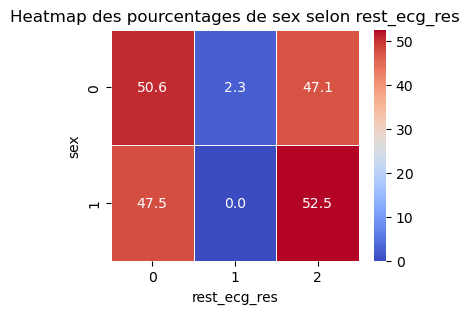

--------------------------------------------------

🔹 Analyse entre sex et ex_angina

Table de contingence :
 ex_angina    0   1
sex               
0           69  18
1          112  71

Test du Khi-2 : χ² = 7.9498, p-value = 0.0048, avec V de Cramer : 0.17159209097070657


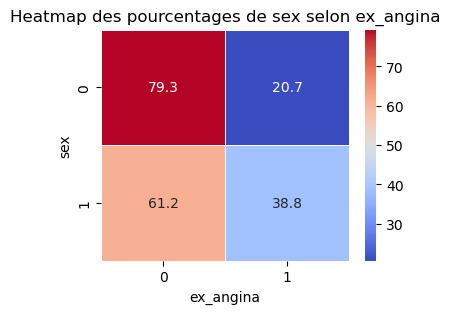

--------------------------------------------------

🔹 Analyse entre sex et slope_peak

Table de contingence :
 slope_peak   1   2   3
sex                   
0           45  37   5
1           85  85  13

Test du Khi-2 : χ² = 0.7042, p-value = 0.7032, avec V de Cramer : 0.05106941837086365


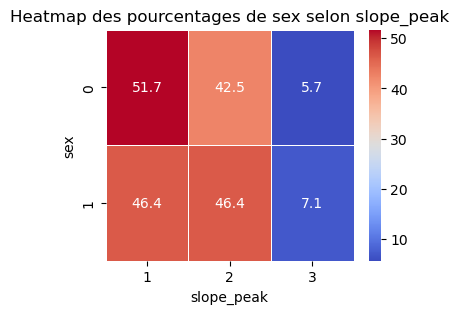

--------------------------------------------------

🔹 Analyse entre sex et nb_maj_ves

Table de contingence :
 nb_maj_ves    0   1   2   3
sex                        
0            59  12  12   4
1           101  46  21  15

Test du Khi-2 : χ² = 6.4627, p-value = 0.0911, avec V de Cramer : 0.1547121315680652


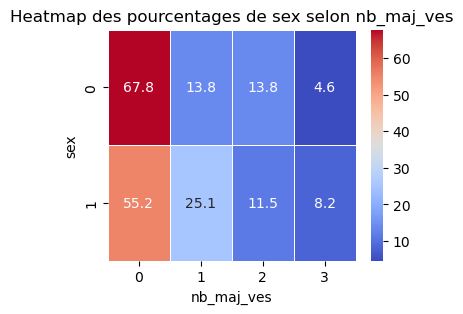

--------------------------------------------------

🔹 Analyse entre sex et thal

Table de contingence :
 thal   3   6   7
sex             
0     74   0  13
1     78  14  91

Test du Khi-2 : χ² = 44.0394, p-value = 0.0000, avec V de Cramer : 0.40386730947857946


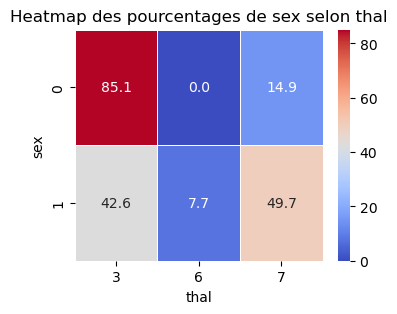

--------------------------------------------------

🔹 Analyse entre sex et target

Table de contingence :
 target   1    2
sex            
0       67   20
1       83  100

Test du Khi-2 : χ² = 22.6673, p-value = 0.0000, avec V de Cramer : 0.28974609262433276


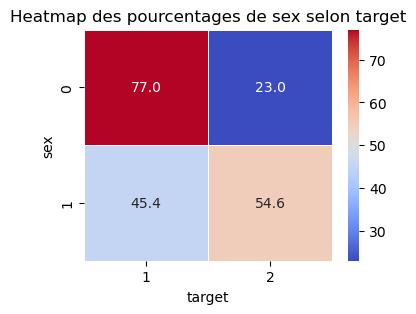

--------------------------------------------------

🔹 Analyse entre chest_pain_type et fast_blood_sugar

Table de contingence :
 fast_blood_sugar    0   1
chest_pain_type          
1                  15   5
2                  37   5
3                  62  17
4                 116  13

Test du Khi-2 : χ² = 7.0334, p-value = 0.0708, avec V de Cramer : 0.1613990244751867


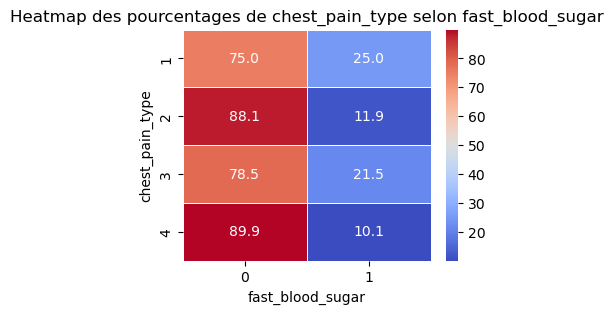

--------------------------------------------------

🔹 Analyse entre chest_pain_type et rest_ecg_res

Table de contingence :
 rest_ecg_res      0  1   2
chest_pain_type           
1                 7  0  13
2                26  0  16
3                45  1  33
4                53  1  75

Test du Khi-2 : χ² = 10.4589, p-value = 0.1066, avec V de Cramer : 0.13916989098906646


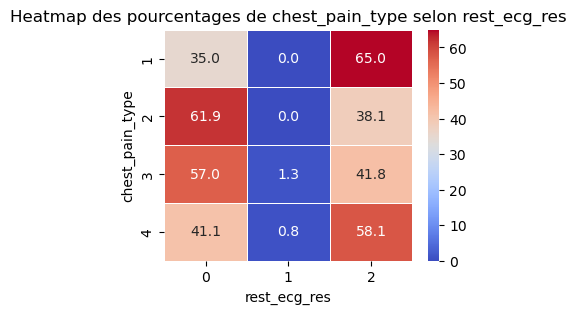

--------------------------------------------------

🔹 Analyse entre chest_pain_type et ex_angina

Table de contingence :
 ex_angina         0   1
chest_pain_type        
1                16   4
2                38   4
3                68  11
4                59  70

Test du Khi-2 : χ² = 51.4090, p-value = 0.0000, avec V de Cramer : 0.43635288056072347


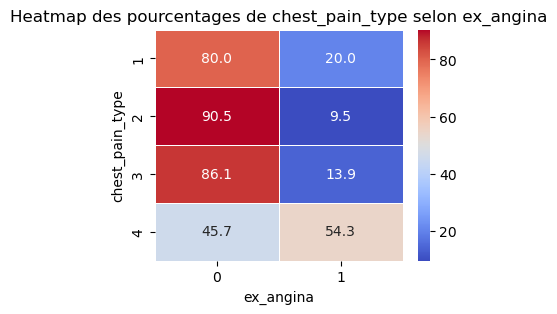

--------------------------------------------------

🔹 Analyse entre chest_pain_type et slope_peak

Table de contingence :
 slope_peak        1   2  3
chest_pain_type           
1                 8   9  3
2                31  10  1
3                44  30  5
4                47  73  9

Test du Khi-2 : χ² = 22.7728, p-value = 0.0009, avec V de Cramer : 0.20535807857438992


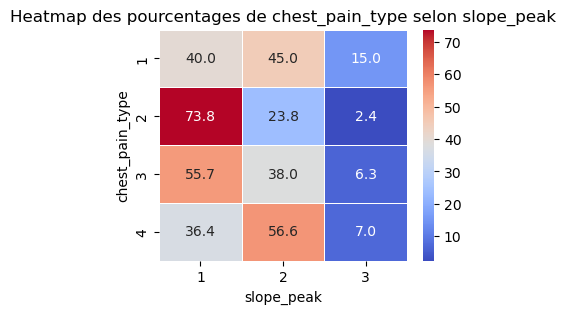

--------------------------------------------------

🔹 Analyse entre chest_pain_type et nb_maj_ves

Table de contingence :
 nb_maj_ves        0   1   2   3
chest_pain_type                
1                14   3   3   0
2                32   6   3   1
3                53  19   2   5
4                61  30  25  13

Test du Khi-2 : χ² = 25.1361, p-value = 0.0028, avec V de Cramer : 0.17615951085556006


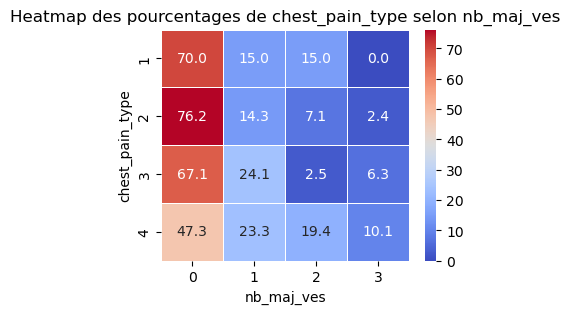

--------------------------------------------------

🔹 Analyse entre chest_pain_type et thal

Table de contingence :
 thal              3  6   7
chest_pain_type           
1                12  2   6
2                33  2   7
3                56  2  21
4                51  8  70

Test du Khi-2 : χ² = 32.2217, p-value = 0.0000, avec V de Cramer : 0.24427416133851615


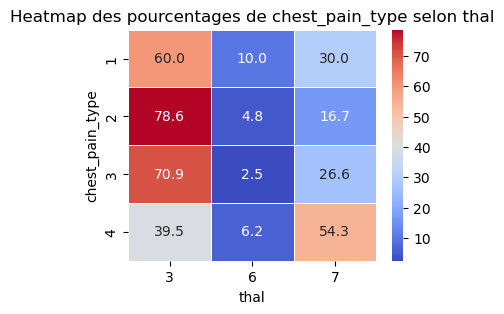

--------------------------------------------------

🔹 Analyse entre chest_pain_type et target

Table de contingence :
 target            1   2
chest_pain_type        
1                15   5
2                35   7
3                62  17
4                38  91

Test du Khi-2 : χ² = 68.5882, p-value = 0.0000, avec V de Cramer : 0.5040142800216132


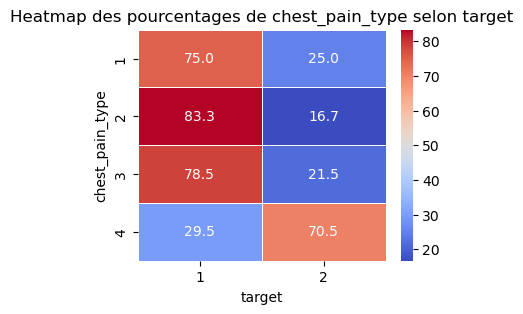

--------------------------------------------------

🔹 Analyse entre fast_blood_sugar et rest_ecg_res

Table de contingence :
 rest_ecg_res        0  1    2
fast_blood_sugar             
0                 114  2  114
1                  17  0   23

Test du Khi-2 : χ² = 1.1212, p-value = 0.5709, avec V de Cramer : 0.0644404000738022


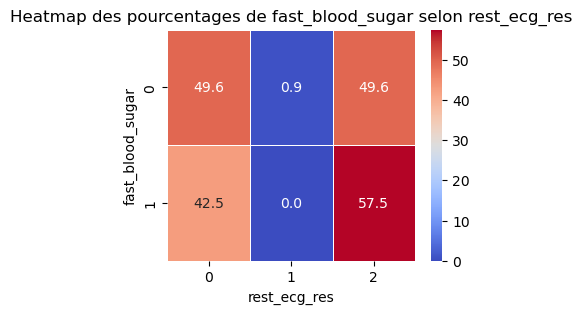

--------------------------------------------------

🔹 Analyse entre fast_blood_sugar et ex_angina

Table de contingence :
 ex_angina           0   1
fast_blood_sugar         
0                 154  76
1                  27  13

Test du Khi-2 : χ² = 0.0000, p-value = 1.0000, avec V de Cramer : 0.0


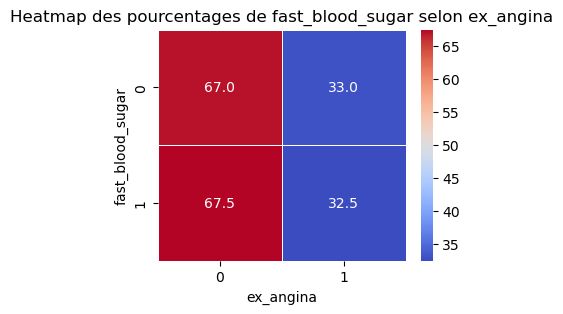

--------------------------------------------------

🔹 Analyse entre fast_blood_sugar et slope_peak

Table de contingence :
 slope_peak          1    2   3
fast_blood_sugar              
0                 110  108  12
1                  20   14   6

Test du Khi-2 : χ² = 6.0028, p-value = 0.0497, avec V de Cramer : 0.14910593060133512


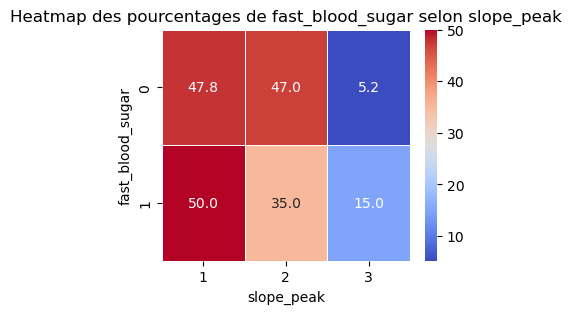

--------------------------------------------------

🔹 Analyse entre fast_blood_sugar et nb_maj_ves

Table de contingence :
 nb_maj_ves          0   1   2   3
fast_blood_sugar                 
0                 141  49  26  14
1                  19   9   7   5

Test du Khi-2 : χ² = 4.1800, p-value = 0.2427, avec V de Cramer : 0.12442420179137399


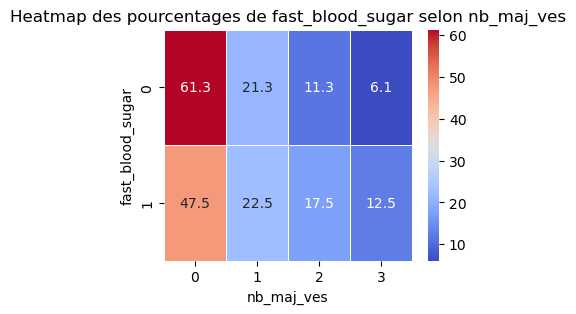

--------------------------------------------------

🔹 Analyse entre fast_blood_sugar et thal

Table de contingence :
 thal                3   6   7
fast_blood_sugar             
0                 132  11  87
1                  20   3  17

Test du Khi-2 : χ² = 1.0092, p-value = 0.6038, avec V de Cramer : 0.06113616831318269


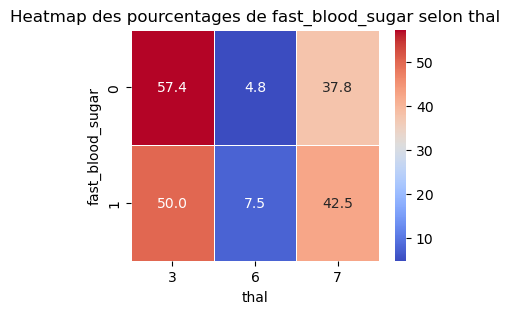

--------------------------------------------------

🔹 Analyse entre fast_blood_sugar et target

Table de contingence :
 target              1    2
fast_blood_sugar          
0                 127  103
1                  23   17

Test du Khi-2 : χ² = 0.0092, p-value = 0.9237, avec V de Cramer : 0.005828155051501955


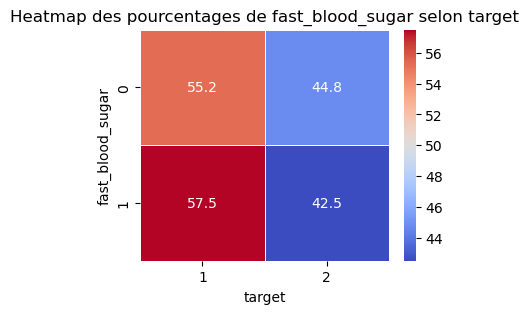

--------------------------------------------------

🔹 Analyse entre rest_ecg_res et ex_angina

Table de contingence :
 ex_angina      0   1
rest_ecg_res        
0             94  37
1              1   1
2             86  51

Test du Khi-2 : χ² = 2.7096, p-value = 0.2580, avec V de Cramer : 0.10017721202651125


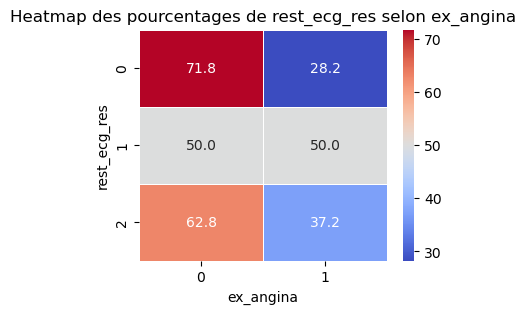

--------------------------------------------------

🔹 Analyse entre rest_ecg_res et slope_peak

Table de contingence :
 slope_peak     1   2   3
rest_ecg_res            
0             74  51   6
1              0   2   0
2             56  69  12

Test du Khi-2 : χ² = 9.5263, p-value = 0.0492, avec V de Cramer : 0.13282027261302504


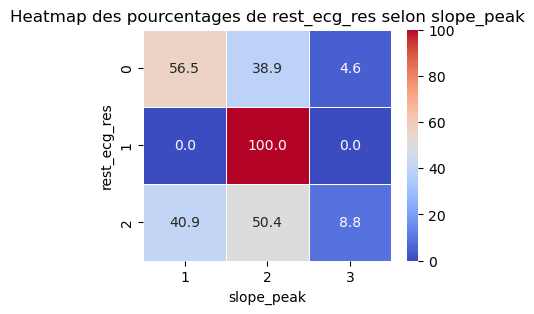

--------------------------------------------------

🔹 Analyse entre rest_ecg_res et nb_maj_ves

Table de contingence :
 nb_maj_ves     0   1   2   3
rest_ecg_res                
0             84  26  15   6
1              2   0   0   0
2             74  32  18  13

Test du Khi-2 : χ² = 5.3732, p-value = 0.4969, avec V de Cramer : 0.099751866307473


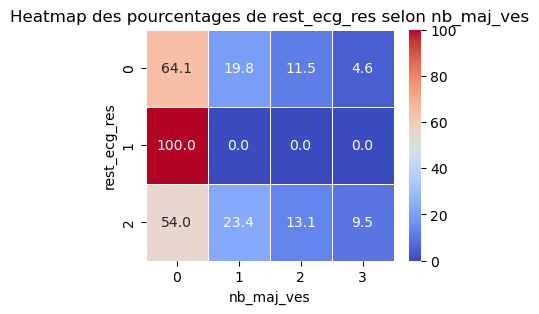

--------------------------------------------------

🔹 Analyse entre rest_ecg_res et thal

Table de contingence :
 thal           3  6   7
rest_ecg_res           
0             74  6  51
1              2  0   0
2             76  8  53

Test du Khi-2 : χ² = 1.7823, p-value = 0.7757, avec V de Cramer : 0.05745037424762217


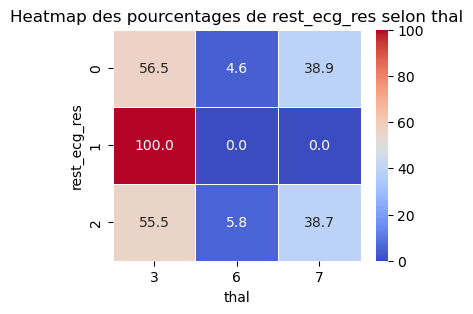

--------------------------------------------------

🔹 Analyse entre rest_ecg_res et target

Table de contingence :
 target         1   2
rest_ecg_res        
0             85  46
1              1   1
2             64  73

Test du Khi-2 : χ² = 8.9795, p-value = 0.0112, avec V de Cramer : 0.18236564813733264


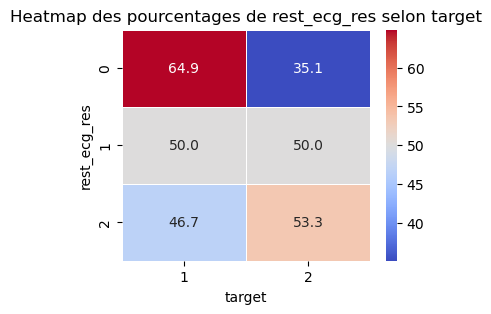

--------------------------------------------------

🔹 Analyse entre ex_angina et slope_peak

Table de contingence :
 slope_peak    1   2   3
ex_angina              
0           105  66  10
1            25  56   8

Test du Khi-2 : χ² = 21.4103, p-value = 0.0000, avec V de Cramer : 0.281598268282706


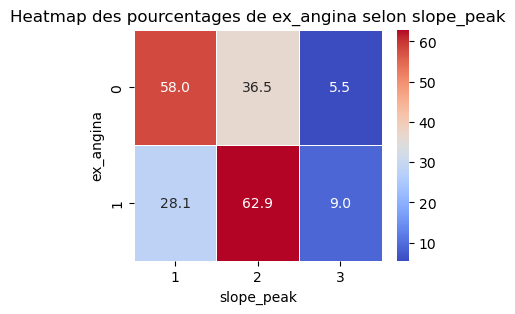

--------------------------------------------------

🔹 Analyse entre ex_angina et nb_maj_ves

Table de contingence :
 nb_maj_ves    0   1   2   3
ex_angina                  
0           120  31  18  12
1            40  27  15   7

Test du Khi-2 : χ² = 11.8976, p-value = 0.0077, avec V de Cramer : 0.20991701756634354


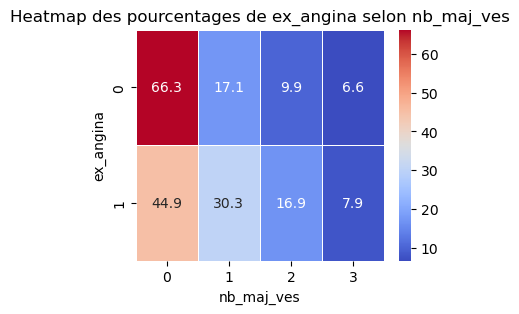

--------------------------------------------------

🔹 Analyse entre ex_angina et thal

Table de contingence :
 thal         3  6   7
ex_angina            
0          122  8  51
1           30  6  53

Test du Khi-2 : χ² = 27.8995, p-value = 0.0000, avec V de Cramer : 0.3214520718839426


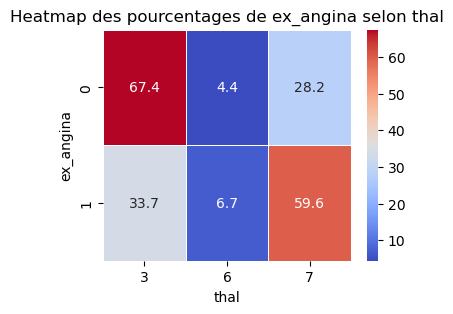

--------------------------------------------------

🔹 Analyse entre ex_angina et target

Table de contingence :
 target       1   2
ex_angina         
0          127  54
1           23  66

Test du Khi-2 : χ² = 45.6919, p-value = 0.0000, avec V de Cramer : 0.41137471678963966


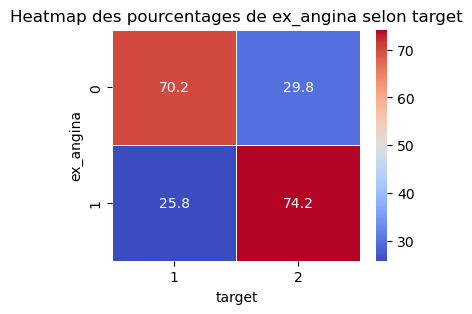

--------------------------------------------------

🔹 Analyse entre slope_peak et nb_maj_ves

Table de contingence :
 nb_maj_ves   0   1   2   3
slope_peak                
1           86  26  13   5
2           61  30  18  13
3           13   2   2   1

Test du Khi-2 : χ² = 10.2917, p-value = 0.1129, avec V de Cramer : 0.13805348816416554


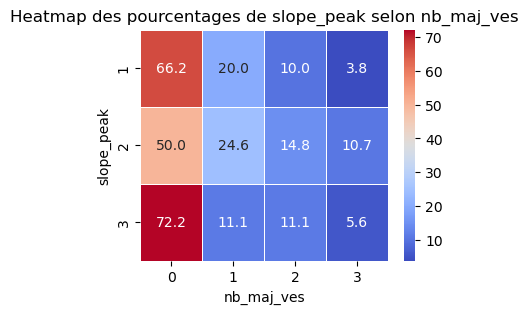

--------------------------------------------------

🔹 Analyse entre slope_peak et thal

Table de contingence :
 thal         3   6   7
slope_peak            
1           94   2  34
2           51  11  60
3            7   1  10

Test du Khi-2 : χ² = 28.3500, p-value = 0.0000, avec V de Cramer : 0.22912869721214532


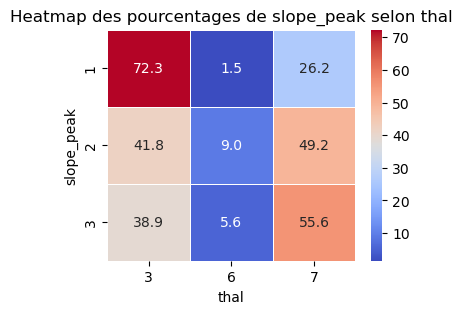

--------------------------------------------------

🔹 Analyse entre slope_peak et target

Table de contingence :
 target       1   2
slope_peak        
1           98  32
2           44  78
3            8  10

Test du Khi-2 : χ² = 40.3704, p-value = 0.0000, avec V de Cramer : 0.38667811726606066


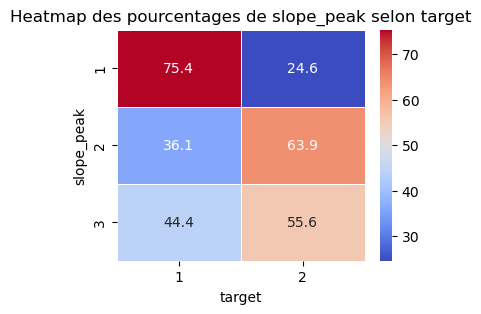

--------------------------------------------------

🔹 Analyse entre nb_maj_ves et thal

Table de contingence :
 thal          3  6   7
nb_maj_ves            
0           107  7  46
1            26  4  28
2            13  2  18
3             6  1  12

Test du Khi-2 : χ² = 19.4440, p-value = 0.0035, avec V de Cramer : 0.18975641333696563


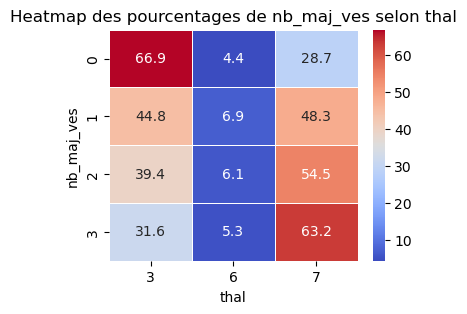

--------------------------------------------------

🔹 Analyse entre nb_maj_ves et target

Table de contingence :
 target        1   2
nb_maj_ves         
0           120  40
1            20  38
2             7  26
3             3  16

Test du Khi-2 : χ² = 62.8631, p-value = 0.0000, avec V de Cramer : 0.4825207418263913


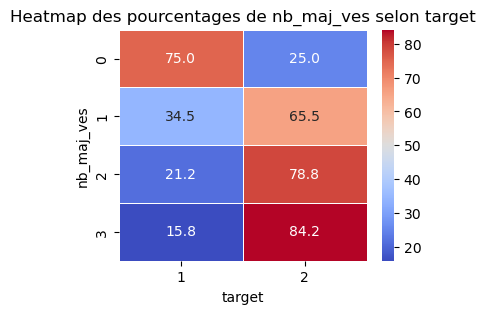

--------------------------------------------------

🔹 Analyse entre thal et target

Table de contingence :
 target    1   2
thal           
3       119  33
6         6   8
7        25  79

Test du Khi-2 : χ² = 74.5693, p-value = 0.0000, avec V de Cramer : 0.5255309359151155


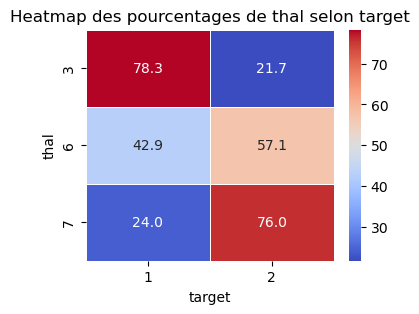

--------------------------------------------------


In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    """
    Calcule le V de Cramer pour une matrice de confusion donnée.

    Paramètres :
    ------------
    confusion_matrix : numpy.array
        Matrice de confusion obtenue à partir des variables catégorielles.

    Retourne :
    ---------
    float
        Le V de Cramer.
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# Charger le jeu de données (remplace 'data.csv' par ton fichier)
#df = pd.read_csv("data.csv")
df = data

# Sélectionner uniquement les variables qualitatives
var_quali = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Boucle sur chaque paire de variables qualitatives
for i in range(len(var_quali)):
    for j in range(i + 1, len(var_quali)):  # Évite les doublons et diagonales
        var1, var2 = var_quali[i], var_quali[j]
        print(f"\n🔹 Analyse entre {var1} et {var2}\n")

        # Table de contingence
        table = pd.crosstab(df[var1], df[var2])
        print("Table de contingence :\n", table)

        # Test du Khi-2 d'indépendance
        chi2, p, dof, expected = chi2_contingency(table)
        
        # Calculer le V de Cramer
        v_de_cramer = cramers_v(table.values)
        #cramers_v_results.append({'Feature': feature, 'Cramer\'s V': v_cramer})
        
        print(f"\nTest du Khi-2 : χ² = {chi2:.4f}, p-value = {p:.4f}, avec V de Cramer : {v_de_cramer}")

        # Heatmap des proportions
        plt.figure(figsize=(4, 3))
        sns.heatmap(table.div(table.sum(axis=1), axis=0) * 100, 
                    annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
        plt.title(f"Heatmap des pourcentages de {var1} selon {var2}")
        plt.ylabel(var1)
        plt.xlabel(var2)
        plt.show()

        print("-" * 50)


#### Classement de la force des liaisons des variables qualitatives explicatives avec la variable cible

* Fonction

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

def chi2_cramers_v(X, y):
    """
    Effectue le test du chi-carré et calcule le V de Cramer pour toutes les variables qualitatives,
    puis génère un graphique classant les valeurs du V de Cramer avec la cible par ordre décroissant.

    Paramètres :
    ------------
    X : pandas.DataFrame
        Le DataFrame contenant les variables explicatives (features).
    
    y : pandas.Series
        La variable cible (target) avec des classes.

    Retourne :
    ---------
    chi2_results : pandas.DataFrame
        Un DataFrame contenant les résultats du test du chi-carré (chi2 et p-value) pour chaque variable.
    
    cramers_v_results : pandas.DataFrame
        Un DataFrame contenant les résultats du V de Cramer pour chaque variable, trié par ordre décroissant.

    Affiche :
    --------
    Un graphique classant les valeurs du V de Cramer entre chaque variable qualitative et la cible.
    """
    # Sélectionner uniquement les variables qualitatives
    qualitative_features = X.select_dtypes(include=['category', 'object']).columns
    
    chi2_results = []
    cramers_v_results = []
    
    for feature in qualitative_features:
        # Construire une table de contingence entre la variable qualitative et la cible
        confusion_matrix = pd.crosstab(X[feature], y)
        
        # Effectuer le test du chi-carré
        chi2_stat, p_value, _, _ = chi2_contingency(confusion_matrix)
        chi2_results.append({'Feature': feature, 'Chi2 Statistic': chi2_stat, 'P-Value': p_value})
        
        # Calculer le V de Cramer
        v_cramer = cramers_v(confusion_matrix.values)
        cramers_v_results.append({'Feature': feature, 'Cramer\'s V': v_cramer})
    
    # Convertir les résultats en DataFrames
    chi2_results = pd.DataFrame(chi2_results)
    cramers_v_results = pd.DataFrame(cramers_v_results).sort_values(by='Cramer\'s V', ascending=False)
    
    # Visualisation des résultats du V de Cramer
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Cramer\'s V', y='Feature', data=cramers_v_results, palette='viridis')
    plt.title('Classement des variables qualitatives selon le V de Cramer avec la cible')
    plt.show()
    
    return chi2_results, cramers_v_results


* Utilisation de la fonction

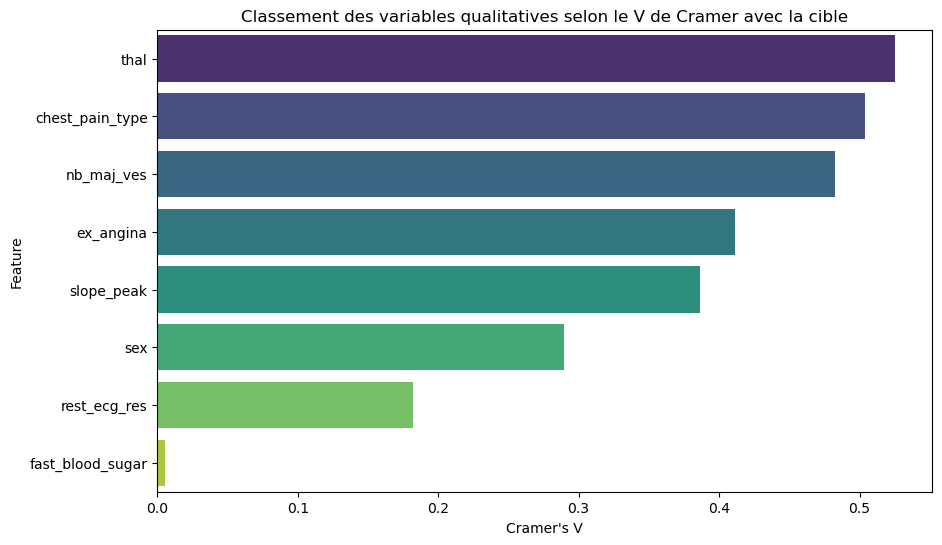

            Feature  Cramer's V
7              thal    0.525531
1   chest_pain_type    0.504014
6        nb_maj_ves    0.482521
4         ex_angina    0.411375
5        slope_peak    0.386678
0               sex    0.289746
3      rest_ecg_res    0.182366
2  fast_blood_sugar    0.005828
            Feature  Chi2 Statistic       P-Value
0               sex       22.667256  1.926226e-06
1   chest_pain_type       68.588207  8.560988e-15
2  fast_blood_sugar        0.009171  9.237061e-01
3      rest_ecg_res        8.979452  1.122372e-02
4         ex_angina       45.691873  1.383958e-11
5        slope_peak       40.370391  1.712699e-09
6        nb_maj_ves       62.863092  1.436620e-13
7              thal       74.569346  6.419071e-17


In [83]:
# Exemple d'utilisation
chi2_results, cramers_v_results = chi2_cramers_v(X_biv, y_biv)

print(cramers_v_results)
print(chi2_results)


# 4. Features Engineering

## 4.1. Traitement des valeurs manquantes

* On a observé plus haut qu'il n'y a pas de valeur manquante.

## 4.2. Traitement des données aberrantes

### 4.2.1. Valeurs extrêmes

Le traitement des données extrêmes n'est pas pris en compte dans ce document en raison de leur faible proportion dans le jeu de données. Il faut savoir cependant qu'il existe de méthodes d'identification des outliers et de leurs transformations :

* Méthode d'identification des outliers
    * Méthode IQR : les données doivent être symétriques (ce n'est pas le cas pour notre dataset)
    * Méthode Z-score : la distribution doit suivre une loi normale (notre dataset a assez d'obs mais on ne la choisit pas)
    * Méthode "Isolation forest" (mieux adaptée plan multivarié car les outliers peuvent être dépendants)
    * Méthode "LOF" (Local Outlier Factor) se basant sur la densité, le voisinage

* Transformation des outliers
    * Suppression des outliers : pas choisie
    * Transformation logarithmique (peut réduire l'effet des valeurs aberrantes en compressant les écarts)
    * Transformation Box-Cox (rend les données plus normales en ajustant leur skewness)
    * Discrétisation (réduire l'impact des valeurs aberrantes mais perte d'information)

### 4.2.2. Modalités rares

* Identification des modalités rares

In [45]:
data_quali = data.select_dtypes(include=['object', 'category'])
data_quali

sex chest_pain_type fast_blood_sugar rest_ecg_res ex_angina slope_peak  \
0     1               4                0            2         0          2   
1     0               3                0            2         0          2   
2     1               2                0            0         0          1   
3     1               4                0            0         1          2   
4     0               2                0            2         1          1   
..   ..             ...              ...          ...       ...        ...   
265   1               3                1            0         0          1   
266   1               2                0            0         0          1   
267   0               2                0            2         0          2   
268   1               4                0            0         0          2   
269   1               4                0            2         1          2   

    nb_maj_ves thal target  
0            3    3      2  
1            0    7      1  
2            0    7      2  
3            1    7      1  
4            1    3      1  
..         ...  ...    ...  
265          0    7      1  
266          0    7      1  
267          0    3      1  
268          0    6      1  
269          3    3      2  

[270 rows x 9 columns]

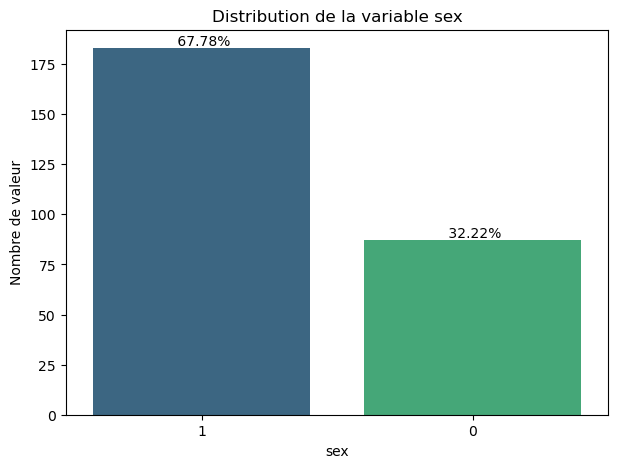

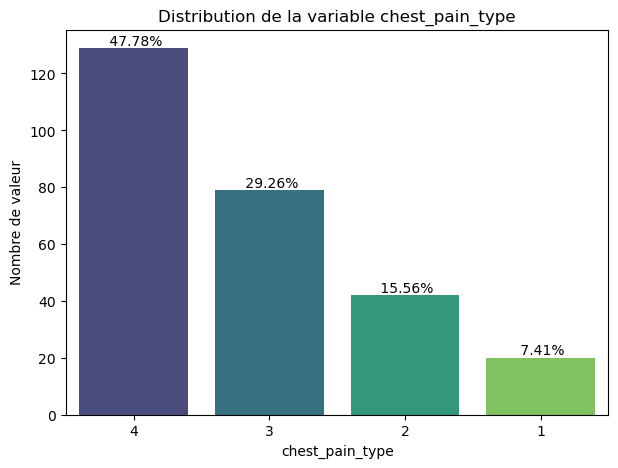

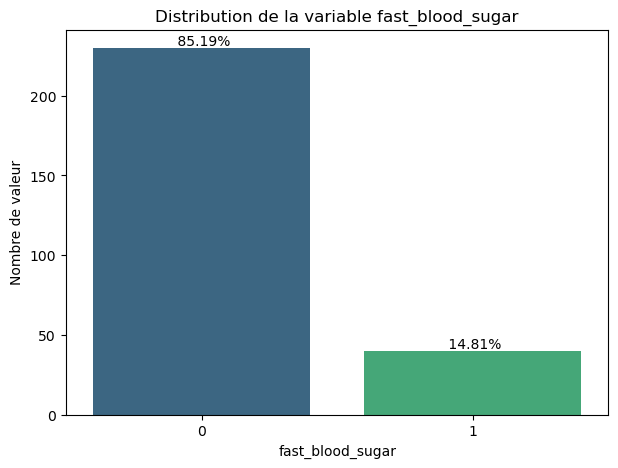

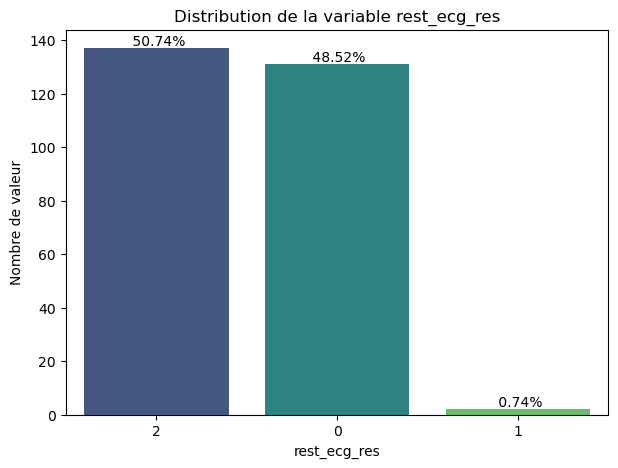

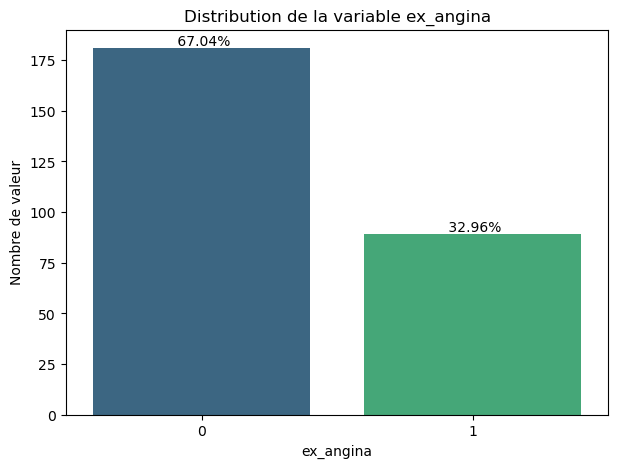

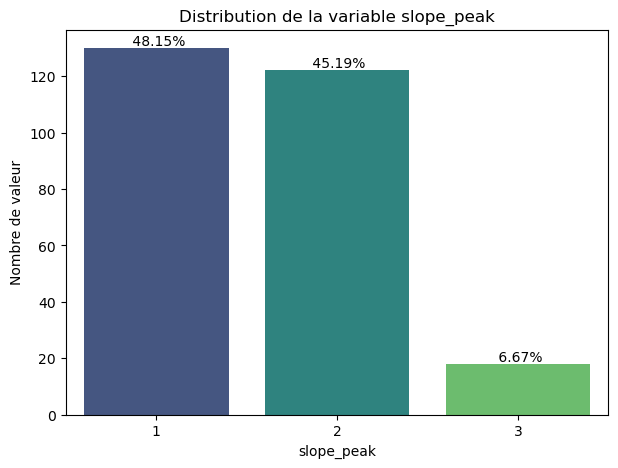

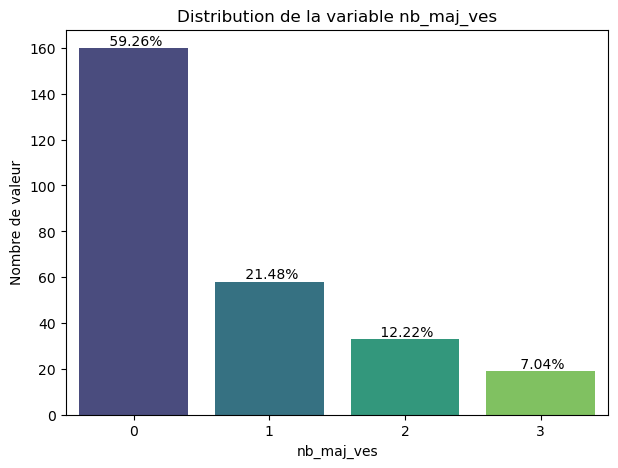

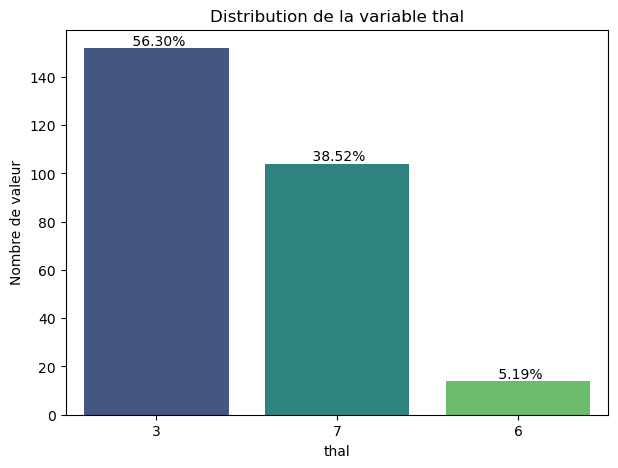

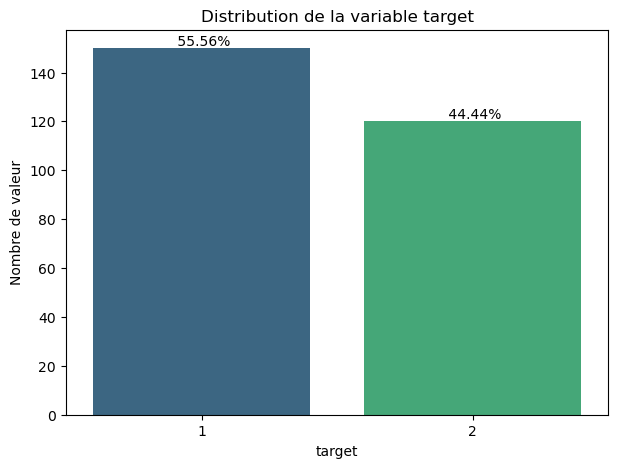

In [48]:
for column in data_quali.columns:
    plt.figure(figsize=(7,5))

    repartition =data[column].value_counts().index
    sns.countplot(data = data, x=column, palette="viridis", order=repartition)

    proportion = data[column].value_counts(normalize=True)

    for i, prop in enumerate(proportion):
        plt.text(i, prop * len(data), f"{prop: .2%}", ha ="center", va="bottom")
    plt.title(f"Distribution de la variable {column}")
    plt.ylabel("Nombre de valeur")
    plt.xlabel(column)
    plt.show()

In [52]:
data['rest_ecg_res'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

In [56]:
print(data['rest_ecg_res'].value_counts(normalize=True))

2    0.507407
0    0.485185
1    0.007407
Name: rest_ecg_res, dtype: float64


La variable 'rest_ecg_res' ayant trois modalités dont une modalité "1" rare (2/270), il est pertinent de regrouper les modalités "1" et "2" pour avoir finalement deux modalités de cette variable.

In [244]:
data_transf = data.copy()
data_transf.head()

age sex chest_pain_type  rest_blood_pres  serum_chol fast_blood_sugar  \
0   70   1               4              130         322                0   
1   67   0               3              115         564                0   
2   57   1               2              124         261                0   
3   64   1               4              128         263                0   
4   74   0               2              120         269                0   

  rest_ecg_res  max_heart_rate ex_angina  oldpeak slope_peak nb_maj_ves thal  \
0            2             109         0      2.4          2          3    3   
1            2             160         0      1.6          2          0    7   
2            0             141         0      0.3          1          0    7   
3            0             105         1      0.2          2          1    7   
4            2             121         1      0.2          1          1    3   

  target  
0      2  
1      1  
2      2  
3      1  
4      1

In [245]:
data_transf['rest_ecg_res'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

In [246]:
# Fusionner les modalités "1" et "2" de la variable "rest_ecg_res" pour avoir 0 = normal, 1 = normal
data_transf['rest_ecg_res'] = data_transf['rest_ecg_res'].replace({0:'0', 1: '1', 2: '1'})
# Vérifier les modifications
print(data_transf['rest_ecg_res'].value_counts(normalize=True))

1    0.514815
0    0.485185
Name: rest_ecg_res, dtype: float64


In [247]:
data_transf['rest_ecg_res'].unique()

['1', '0']
Categories (2, object): ['0', '1']

In [248]:
data_transf.dtypes

age                    int64
sex                 category
chest_pain_type     category
rest_blood_pres        int64
serum_chol             int64
fast_blood_sugar    category
rest_ecg_res        category
max_heart_rate         int64
ex_angina           category
oldpeak              float64
slope_peak          category
nb_maj_ves          category
thal                category
target              category
dtype: object

In [249]:
data_transf.isna().sum()

age                 0
sex                 0
chest_pain_type     0
rest_blood_pres     0
serum_chol          0
fast_blood_sugar    0
rest_ecg_res        0
max_heart_rate      0
ex_angina           0
oldpeak             0
slope_peak          0
nb_maj_ves          0
thal                0
target              0
dtype: int64

## 4.3. Sélection des variables les plus pertinentes

NA : le jeu de données comportant que 13 variables explicatives, il n'est pas nécessaire de procéder à la sélection de variables pertinentes.

# 5. Analyses multivariées

In [ ]:
NA

# 6. Modélisation

**Rappel de la probématique : Statlog Heart**. 

Prédire la présence ou l’absence de maladie du cœur à partir de 13 attributs représentant l’état physiologique du patient (la base contient 270 observations).

## 6.1. Division Train / Test

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation des variables explicatives et cible
X = data_transf.drop(columns='target')
#y = data_transf['target']
y = data_transf['target'].replace({2:'1', 1: '0'}).astype(int)
#data_transf['rest_ecg_res'] = data_transf['rest_ecg_res'].replace({0:'0', 1: '1', 2: '1'})

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
data_transf['target']

0      2
1      1
2      2
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    2
Name: target, Length: 270, dtype: category
Categories (2, int64): [1, 2]

In [252]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: target, Length: 270, dtype: int32

### 6.1.1. Prétraitement des données : 

In [253]:
# Prétraitement des données
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Les colonnes catégorielles sont celles de type 'object' ou 'category'

# Identification automatique des colonnes catégorielles
cat_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Transformer les variables catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_columns)  # One-hot encoding pour les colonnes catégorielles
    ],
    remainder='passthrough'  # Laisser les autres colonnes inchangées
)

In [230]:
cat_columns

['sex',
 'chest_pain_type',
 'fast_blood_sugar',
 'rest_ecg_res',
 'ex_angina',
 'slope_peak',
 'nb_maj_ves',
 'thal']

### 6.1.2. One-hot encoding pour les colonnes catégorielles sur les bases Train et Test : 

In [254]:
# Transformer les variables catégorielles avec OneHotEncoder et garder les autres variables inchangées
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_train_transformed

array([[  0. ,   1. ,   0. , ..., 271. , 162. ,   0. ],
       [  1. ,   0. ,   0. , ..., 326. , 140. ,   3.4],
       [  1. ,   0. ,   1. , ..., 246. , 173. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ..., 354. , 163. ,   0.6],
       [  1. ,   0. ,   1. , ..., 222. , 143. ,   1.2],
       [  0. ,   0. ,   0. , ..., 269. , 163. ,   0. ]])

**Récupération des noms des nouvelles colonnes après transformation**

In [255]:
# Récupérer les noms des nouvelles colonnes après transformation
# Noms des colonnes OneHotEncoder pour les variables catégorielles
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)
onehot_columns

array(['sex_1', 'chest_pain_type_2', 'chest_pain_type_3',
       'chest_pain_type_4', 'fast_blood_sugar_1', 'rest_ecg_res_1',
       'ex_angina_1', 'slope_peak_2', 'slope_peak_3', 'nb_maj_ves_1',
       'nb_maj_ves_2', 'nb_maj_ves_3', 'thal_6', 'thal_7'], dtype=object)

In [256]:
new_columns = list(onehot_columns) + list(X_train.select_dtypes(exclude=['object', 'category']).columns)
new_columns

['sex_1',
 'chest_pain_type_2',
 'chest_pain_type_3',
 'chest_pain_type_4',
 'fast_blood_sugar_1',
 'rest_ecg_res_1',
 'ex_angina_1',
 'slope_peak_2',
 'slope_peak_3',
 'nb_maj_ves_1',
 'nb_maj_ves_2',
 'nb_maj_ves_3',
 'thal_6',
 'thal_7',
 'age',
 'rest_blood_pres',
 'serum_chol',
 'max_heart_rate',
 'oldpeak']

**Conversion en DataFrame avec les nouveaux noms de colonnes des variables explicatives**

In [257]:
# Convertir en DataFrame avec les nouveaux noms de colonnes
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=new_columns, index=X_train.index)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=new_columns, index=X_test.index)

# Afficher les premières lignes du DataFrame transformé
X_train_transformed_df.head()

sex_1  chest_pain_type_2  chest_pain_type_3  chest_pain_type_4  \
115    0.0                1.0                0.0                0.0   
33     1.0                0.0                0.0                1.0   
184    1.0                0.0                1.0                0.0   
142    1.0                0.0                1.0                0.0   
197    0.0                0.0                1.0                0.0   

     fast_blood_sugar_1  rest_ecg_res_1  ex_angina_1  slope_peak_2  \
115                 0.0             0.0          0.0           1.0   
33                  0.0             1.0          1.0           0.0   
184                 1.0             1.0          0.0           0.0   
142                 0.0             0.0          0.0           1.0   
197                 0.0             0.0          0.0           1.0   

     slope_peak_3  nb_maj_ves_1  nb_maj_ves_2  nb_maj_ves_3  thal_6  thal_7  \
115           0.0           0.0           0.0           0.0     0.0     0.0   
33            1.0           0.0           0.0           0.0     0.0     1.0   
184           0.0           0.0           0.0           1.0     0.0     0.0   
142           0.0           1.0           0.0           0.0     0.0     1.0   
197           0.0           0.0           0.0           0.0     0.0     0.0   

      age  rest_blood_pres  serum_chol  max_heart_rate  oldpeak  
115  49.0            134.0       271.0           162.0      0.0  
33   59.0            170.0       326.0           140.0      3.4  
184  53.0            130.0       246.0           173.0      0.0  
142  50.0            140.0       233.0           163.0      0.6  
197  54.0            110.0       214.0           158.0      1.6

## 6.2.  Régression logistique
La régression logistique utilise une fonction sigmoïde pour modéliser la probabilité qu'une observation appartienne à une classe donnée.

La fonction logistique est définie comme :
$$ P(y=1|x) = \frac{1}{1 + e^{-z}} $$

où $( z $) est une combinaison linéaire des variables explicatives :
$$ z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n $$

Le but est d'estimer les coefficients $( \beta_0, \beta_1, \dots, \beta_n $), en minimisant une fonction de coût qui est généralement basée sur la vraisemblance des observations.

### 6.2.1. Entraînement du modèle de régression logistique avec sklearn

In [307]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Modèle de régression logistique
logreg = LogisticRegression(max_iter=1050,fit_intercept=True)
logreg.fit(X_train_transformed_df, y_train)

LogisticRegression(max_iter=1050)

In [308]:
print(logreg.n_iter_)

[1049]


### 6.2.2. Coefficients de la régression logistique

In [260]:
# Tableau des coefficients
coefficients = pd.DataFrame({
    'Variable': X_train_transformed_df.columns,
    'Coefficient': logreg.coef_[0]
})
print('Coefficients de la régression logistique :')
coefficients

# Ajout de l'odds ratio
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])
coefficients

Coefficients de la régression logistique :


Variable  Coefficient  Odds Ratio
0                sex_1     1.096643    2.994099
1    chest_pain_type_2     0.177905    1.194712
2    chest_pain_type_3    -0.341159    0.710946
3    chest_pain_type_4     1.437701    4.211002
4   fast_blood_sugar_1    -0.310674    0.732953
5       rest_ecg_res_1     0.136761    1.146554
6          ex_angina_1     0.414442    1.513525
7         slope_peak_2     0.752226    2.121717
8         slope_peak_3     0.039964    1.040773
9         nb_maj_ves_1     1.124248    3.077902
10        nb_maj_ves_2     1.331185    3.785527
11        nb_maj_ves_3     0.568636    1.765857
12              thal_6     0.066029    1.068258
13              thal_7     1.226606    3.409639
14                 age    -0.006278    0.993741
15     rest_blood_pres     0.021724    1.021962
16          serum_chol     0.004476    1.004486
17      max_heart_rate    -0.011800    0.988270
18             oldpeak     0.551886    1.736525

### 6.2.3. Prédiction avec la régression logistique

In [261]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = logreg.predict_proba(X_train_transformed_df)[:, 1]
y_test_pred = logreg.predict_proba(X_test_transformed_df)[:, 1]

In [262]:
y_test_pred

array([0.57301596, 0.61606831, 0.06461987, 0.02972442, 0.22400829,
       0.81654601, 0.20287154, 0.03410891, 0.46721288, 0.04383064,
       0.22387594, 0.44278212, 0.90309517, 0.8751305 , 0.35398335,
       0.08667487, 0.57246006, 0.33335804, 0.94147466, 0.2191971 ,
       0.9798202 , 0.16353676, 0.09436936, 0.0612001 , 0.3500272 ,
       0.97333391, 0.44962876, 0.43428876, 0.03133244, 0.10758804,
       0.01334547, 0.09223317, 0.72315027, 0.12568213, 0.46135327,
       0.40436945, 0.57628262, 0.11506789, 0.86395807, 0.1659986 ,
       0.02372878, 0.06276495, 0.19342937, 0.37546834, 0.00465498,
       0.01523871, 0.10103357, 0.66671987, 0.7427959 , 0.08959469,
       0.20627436, 0.01022674, 0.15031677, 0.92997287])

### 6.2.4. Evaluation du modèle de régression logistique

* **Définition de la fonction pour évaluer les performances**

In [535]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns


def evaluer_performance(y_true, y_pred_prob, set_name="test", seuil=0.40):
    """
    Fonction pour évaluer les performances d'un modèle sur un ensemble donné (entraînement ou test).
    
    Paramètres:
    - y_true: Labels réels de l'ensemble évalué
    - y_pred_prob: Probabilités prédites par le modèle sur l'ensemble évalué (valeurs continues)
    - set_name: Nom de l'ensemble évalué ('train' ou 'test')
    - seuil: Seuil de décision pour convertir les probabilités en prédictions binaires (par défaut 0.5)
    
    Retourne:
    - Les métriques de performance, la matrice de confusion sous forme de tableau et une heatmap, ainsi que la courbe ROC
    """
    # Convertir les probabilités en prédictions binaires avec le seuil spécifié
    y_pred = (y_pred_prob >= seuil).astype(int)
    
    # Calcul des métriques de performance
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Affichage des métriques
    print(f"Métriques sur l'ensemble {set_name}:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")
    
    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    
    # Affichage de la matrice de confusion sous forme de tableau
    cm_df = pd.DataFrame(cm, index=["Négatif (0)", "Positif (1)"], columns=["Prédiction Négatif (0)", "Prédiction Positif (1)"])
    print("\nMatrice de Confusion (tableau):")
    print(cm_df)
    
    # Affichage de la matrice de confusion sous forme de heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Négatif", "Positif"], yticklabels=["Négatif", "Positif"])
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies valeurs')
    plt.title(f"Matrice de Confusion - {set_name}")
    plt.show()
    
    # Calcul des courbes ROC avec les valeurs continues des probabilités
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Affichage de l'AUC
    print(f"AUC: {roc_auc:.2f}")
    
    # Tracer la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f'Courbe ROC - {set_name}')
    plt.legend(loc="lower right")
    plt.show()

* **Evaluer des performances sur l'ensemble de Test**

Métriques sur l'ensemble test:
Accuracy: 0.89, Precision: 0.86, Recall: 0.86, F1: 0.86

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      30                       3
Positif (1)                       3                      18


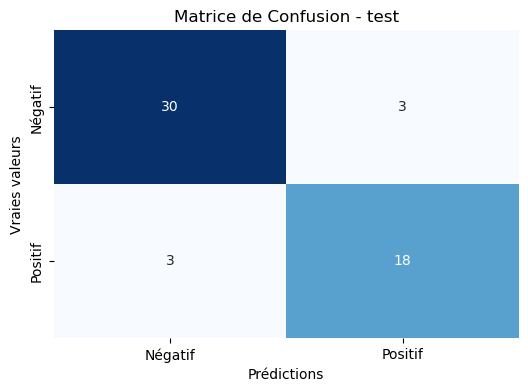

AUC: 0.93


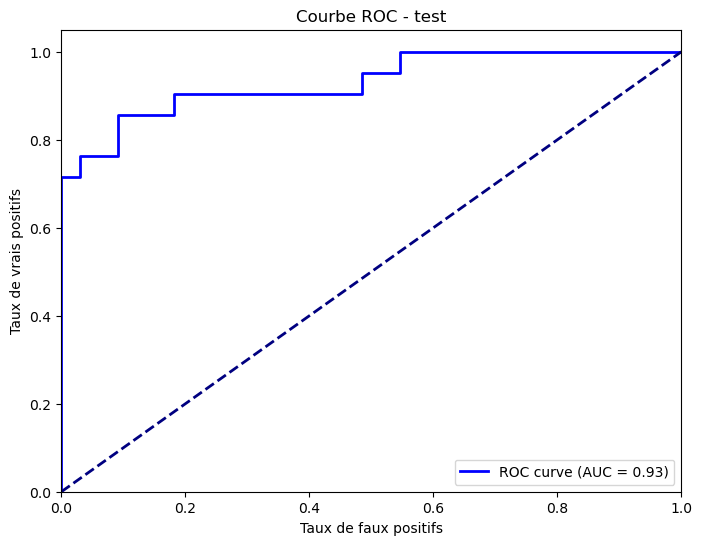

In [286]:
# Évaluer les performances sur l'ensemble de test
evaluer_performance(y_test, y_test_pred, set_name="test")

* **Evaluer des performances sur l'ensemble de Train**

Métriques sur l'ensemble train:
Accuracy: 0.86, Precision: 0.81, Recall: 0.89, F1: 0.85

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      97                      20
Positif (1)                      11                      88


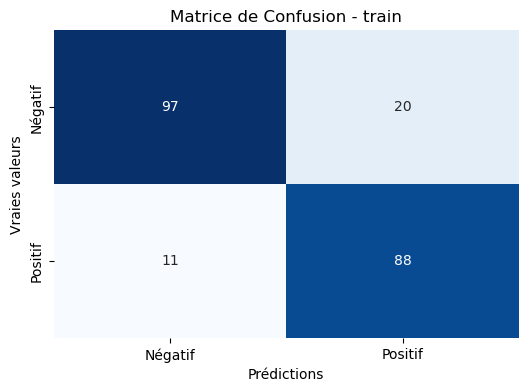

AUC: 0.93


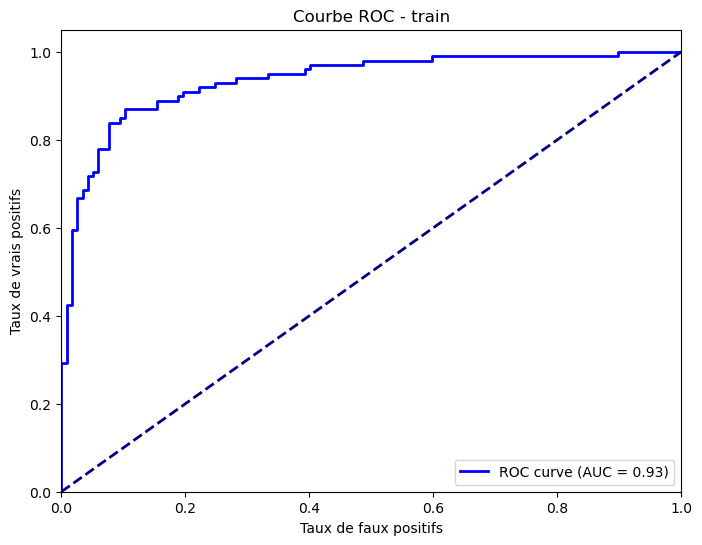

In [287]:
# Évaluer les performances sur l'ensemble de Train
evaluer_performance(y_train, y_train_pred, set_name="train")

### 6.2.5. Optimisation du modèle de regression
**En supprimant les variables source de multicolinéarité une par une**

In [303]:
X_train_vif = X_train_transformed_df

In [ ]:
X_train_vif = X_train_vif.drop(columns=['rest_blood_pres'])

In [ ]:
X_train_vif = X_train_vif.drop(columns=['age'])

In [ ]:
X_train_vif = X_train_vif.drop(columns=['max_heart_rate'])

In [ ]:
X_train_vif = X_train_vif.drop(columns=['serum_chol'])

In [331]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Absence de multicolinéarité : Facteur d'inflation de la variance (VIF)
vif_data = pd.DataFrame()
#X_train_vif = X_train_transformed_df

vif_data['Feature'] = X_train_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(len(X_train_vif.columns))]
print("Facteur d'inflation de la variance (VIF) :")
print(vif_data)

Facteur d'inflation de la variance (VIF) :
               Feature       VIF
0                sex_1  3.589662
1    chest_pain_type_2  1.320068
2    chest_pain_type_3  1.681568
3    chest_pain_type_4  3.656816
4   fast_blood_sugar_1  1.249620
5       rest_ecg_res_1  2.118524
6          ex_angina_1  2.397938
7         slope_peak_2  2.938441
8         slope_peak_3  1.747374
9         nb_maj_ves_1  1.439373
10        nb_maj_ves_2  1.475937
11        nb_maj_ves_3  1.280867
12              thal_6  1.257842
13              thal_7  2.655867
14             oldpeak  3.476550


In [305]:
X_train_vif.columns

Index(['sex_1', 'chest_pain_type_2', 'chest_pain_type_3', 'chest_pain_type_4',
       'fast_blood_sugar_1', 'rest_ecg_res_1', 'ex_angina_1', 'slope_peak_2',
       'slope_peak_3', 'nb_maj_ves_1', 'nb_maj_ves_2', 'nb_maj_ves_3',
       'thal_6', 'thal_7', 'oldpeak'],
      dtype='object')

In [312]:
logreg_vif = LogisticRegression(max_iter=1050,fit_intercept=True)
logreg_vif.fit(X_train_vif, y_train)

LogisticRegression(max_iter=1050)

In [313]:
print(logreg_vif.n_iter_)

[22]


In [314]:
# Tableau des coefficients
coef_vif = pd.DataFrame({
    'Variable': X_train_vif.columns,
    'Coefficient': logreg_vif.coef_[0]
})
print('Coefficients de la régression logistique :')
coef_vif

# Ajout de l'odds ratio
coef_vif['Odds Ratio'] = np.exp(coef_vif['Coefficient'])
coef_vif

Coefficients de la régression logistique :


Variable  Coefficient  Odds Ratio
0                sex_1     0.848095    2.335193
1    chest_pain_type_2     0.123560    1.131518
2    chest_pain_type_3    -0.476434    0.620994
3    chest_pain_type_4     1.409077    4.092178
4   fast_blood_sugar_1    -0.165463    0.847501
5       rest_ecg_res_1     0.235997    1.266170
6          ex_angina_1     0.488166    1.629326
7         slope_peak_2     0.911869    2.488969
8         slope_peak_3     0.061995    1.063957
9         nb_maj_ves_1     1.067243    2.907353
10        nb_maj_ves_2     1.189237    3.284573
11        nb_maj_ves_3     0.762210    2.143007
12              thal_6     0.166038    1.180618
13              thal_7     1.268486    3.555464
14             oldpeak     0.636699    1.890231

In [309]:
X_test_vif = X_test_transformed_df
X_test_vif = X_test_vif.drop(columns=['rest_blood_pres', 'age', 'max_heart_rate', 'serum_chol'])

In [310]:
X_test_vif.columns

Index(['sex_1', 'chest_pain_type_2', 'chest_pain_type_3', 'chest_pain_type_4',
       'fast_blood_sugar_1', 'rest_ecg_res_1', 'ex_angina_1', 'slope_peak_2',
       'slope_peak_3', 'nb_maj_ves_1', 'nb_maj_ves_2', 'nb_maj_ves_3',
       'thal_6', 'thal_7', 'oldpeak'],
      dtype='object')

In [315]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble d'entraînement et de test
y_train_vif_pred = logreg_vif.predict_proba(X_train_vif)[:, 1]
y_test_vif_pred = logreg_vif.predict_proba(X_test_vif)[:, 1]

Métriques sur l'ensemble test:
Accuracy: 0.87, Precision: 0.82, Recall: 0.86, F1: 0.84

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      29                       4
Positif (1)                       3                      18


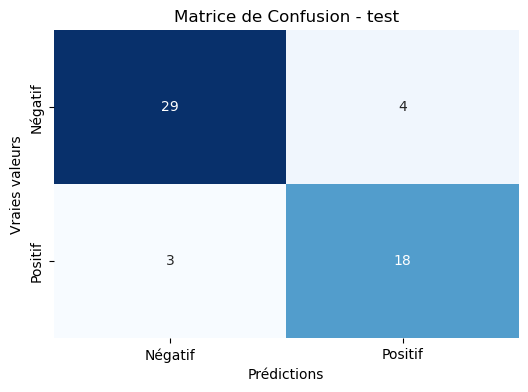

AUC: 0.91


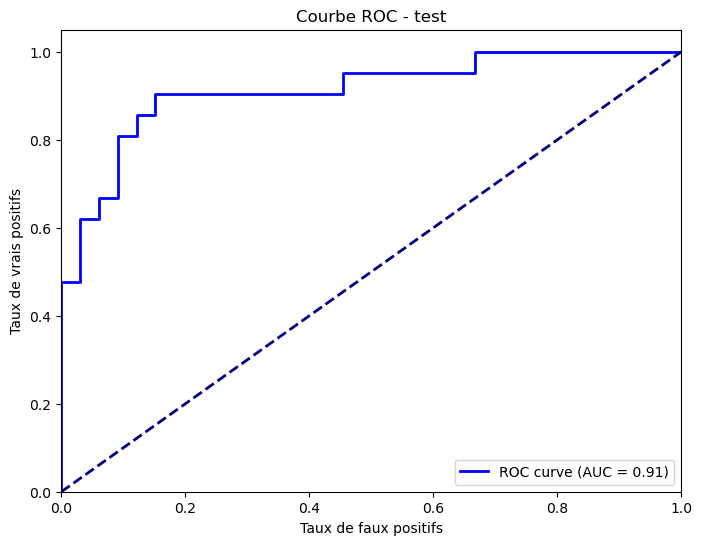

In [327]:
# Évaluer les performances sur l'ensemble de test
evaluer_performance(y_test, y_test_vif_pred, set_name="test")

Métriques sur l'ensemble train:
Accuracy: 0.87, Precision: 0.83, Recall: 0.90, F1: 0.86

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      99                      18
Positif (1)                      10                      89


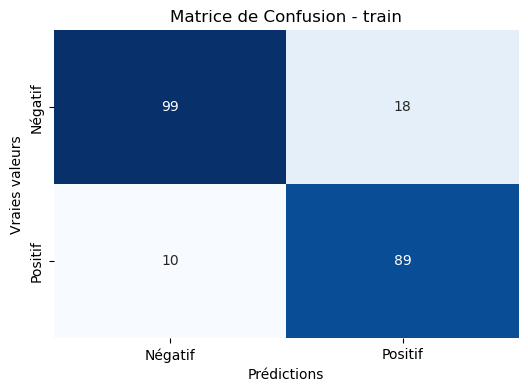

AUC: 0.93


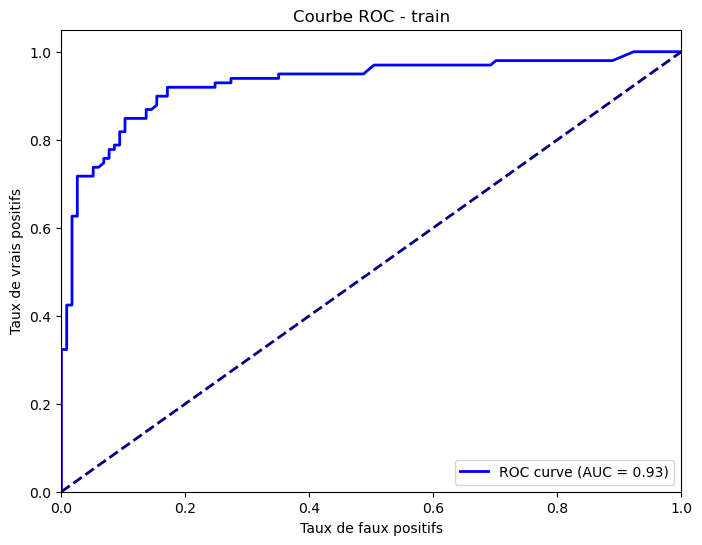

In [328]:
# Évaluer les performances sur l'ensemble de Train
evaluer_performance(y_train, y_train_vif_pred, set_name="train")

## 6.3. Régression Logistique avec pénalisation Ridge L2, Lasso L1 et ElasticNet

### 6.3.1. Régression Logistique Ridge L2

La régression logistique avec pénalisation L2, également connue sous le nom de **régression Ridge**, est une extension de la régression logistique classique. Elle introduit une pénalisation de type L2 sur les coefficients du modèle, ce qui permet de réduire le sur-apprentissage (overfitting) en imposant une contrainte sur la somme des carrés des coefficients. Cette régularisation est particulièrement utile lorsque les données présentent une forte multicolinéarité ou un grand nombre de caractéristiques.

**Paramètres à optimiser**
- `C` : Inverse du coefficient de régularisation (plus la valeur de `C` est petite, plus la régularisation est forte). Ce paramètre contrôle l'intensité de la pénalisation L2. Des valeurs plus petites de `C` augmentent la régularisation, tandis que des valeurs plus grandes la réduisent.

#### 6.3.1.1 Régression Logistique Ridge L2 : Implémentation avec GridSearchCV

In [507]:
from sklearn.linear_model import LogisticRegression

# Utilisation de LogisticRegression avec pénalisation L2 (équivalent à RidgeClassifier)
logistic_L2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000)

# Grille de recherche pour LogisticRegression
logistic_params_L2 = {
    "C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  # Le paramètre C est l'inverse de la régularisation alpha
}

# Optimisation des hyperparamètres
grid_search_logistic_L2 = GridSearchCV(logistic_L2, logistic_params_L2, cv=5)
grid_search_logistic_L2.fit(X_train_transformed_df, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

#### 6.3.1.2 Régression Logistique Ridge L2 : Meilleurs paramètres

In [508]:
grid_search_logistic_L2.best_params_

{'C': 1.0}

#### 6.3.1.3 Régression Logistique Ridge L2 : Prédiction

In [515]:
# Prédictions et évaluation des probabilités
y_train_pred_proba_L2 = grid_search_logistic_L2.predict_proba(X_train_transformed_df)[:, 1]
y_test_pred_proba_L2 = grid_search_logistic_L2.predict_proba(X_test_transformed_df)[:, 1]

#### 6.3.1.4 Régression Logistique Ridge L2 : Evaluation

Métriques sur l'ensemble train:
Accuracy: 0.86, Precision: 0.81, Recall: 0.89, F1: 0.85

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      97                      20
Positif (1)                      11                      88


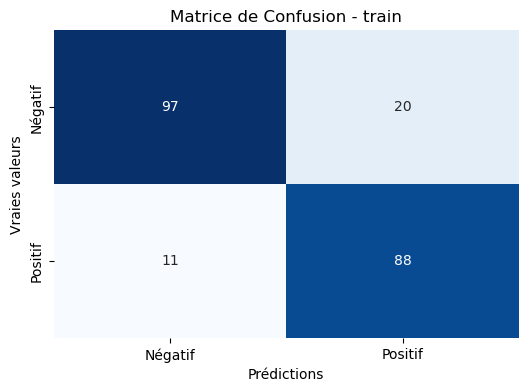

AUC: 0.93


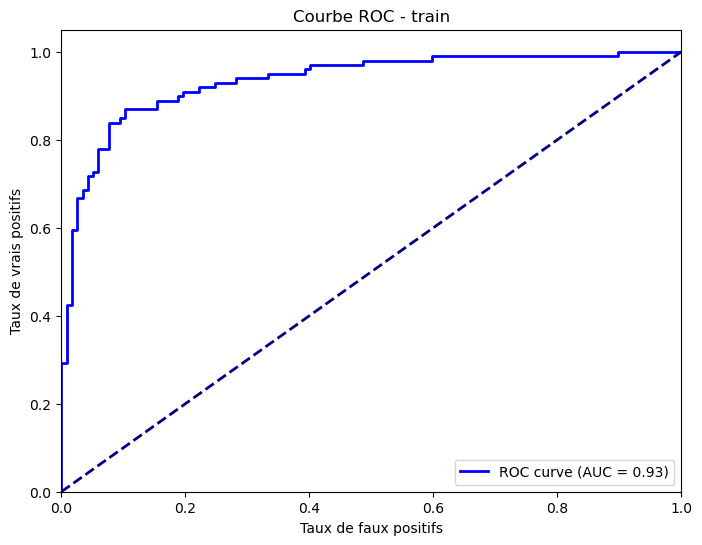

Métriques sur l'ensemble test:
Accuracy: 0.89, Precision: 0.86, Recall: 0.86, F1: 0.86

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      30                       3
Positif (1)                       3                      18


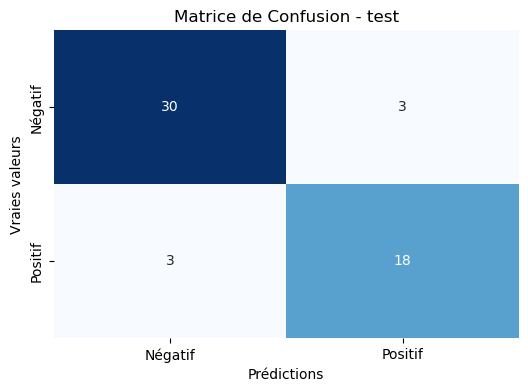

AUC: 0.93


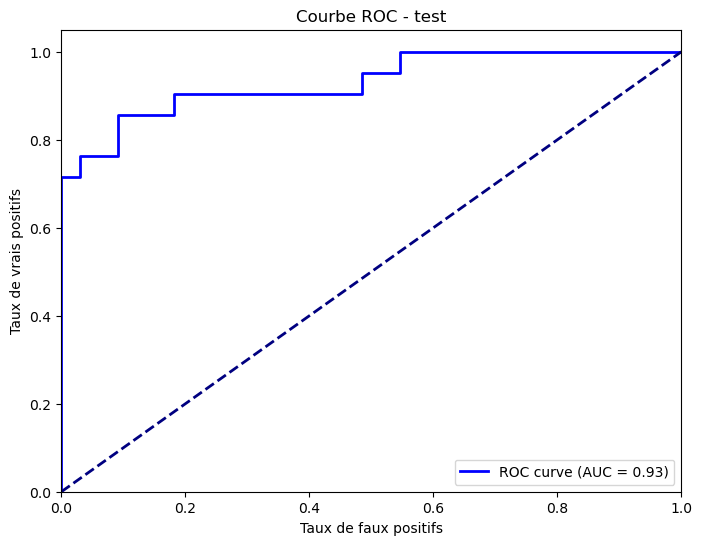

In [516]:
# Évaluation des performances
evaluer_performance(y_train, y_train_pred_proba_L2, set_name="train")
evaluer_performance(y_test, y_test_pred_proba_L2, set_name="test")

### 6.3.2. Régression Logistique Lasso L1

Le Lasso en régression logistique applique une pénalisation de type L1, ce qui force certains coefficients à être exactement nuls, réalisant ainsi une sélection automatique des variables.

**Paramètres à Optimiser**
- `C` : Inverse de la force de régularisation (plus il est grand, moins la régularisation est forte).

#### 6.3.2.1 Régression Logistique V : Implémentation avec GridSearchCV

In [517]:
from sklearn.linear_model import LogisticRegression

# Modèle Lasso (Logistic Regression avec pénalité L1)

lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)


# Grille de recherche pour Lasso (Régression Logistique avec pénalité L1)
lasso_params = {
    "C": [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]
}


# Optimisation des hyperparamètres
grid_search_lasso = GridSearchCV(lasso, lasso_params, cv=5)
grid_search_lasso.fit(X_train_transformed_df, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0,
                               100.0, 500.0]})

#### 6.3.2.2 Régression Logistique Lasso L1 : Meilleurs paramètres

In [518]:
grid_search_lasso.best_params_

{'C': 0.5}

#### 6.3.2.3 Régression Logistique Lasso L1 : Prédiction

In [525]:
# Prédictions et évaluation
y_train_pred_lasso = grid_search_lasso.predict_proba(X_train_transformed_df)[:,1]
y_test_pred_lasso = grid_search_lasso.predict_proba(X_test_transformed_df)[:,1]

#### 6.3.2.4 Régression Logistique Lasso L1 : Evaluation

Métriques sur l'ensemble train:
Accuracy: 0.81, Precision: 0.85, Recall: 0.73, F1: 0.78

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                     104                      13
Positif (1)                      27                      72


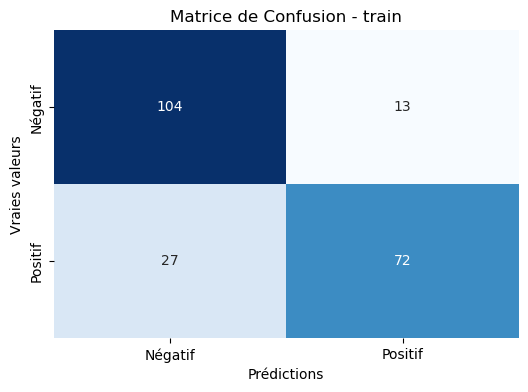

AUC: 0.90


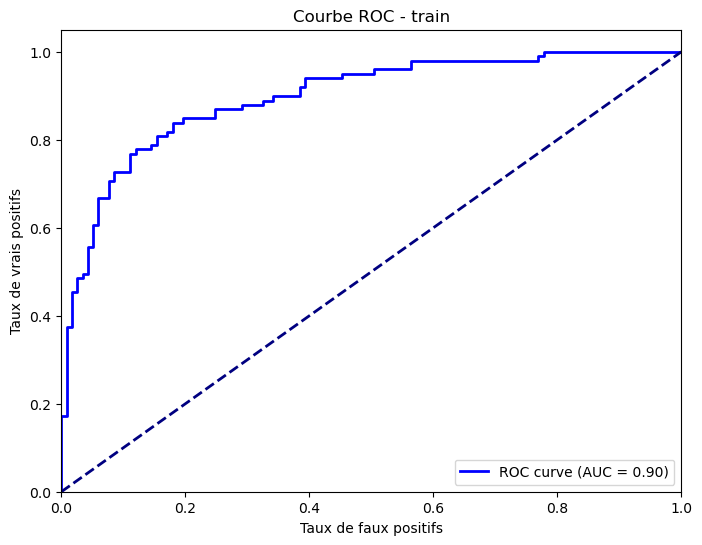

Métriques sur l'ensemble test:
Accuracy: 0.83, Precision: 0.93, Recall: 0.62, F1: 0.74

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      32                       1
Positif (1)                       8                      13


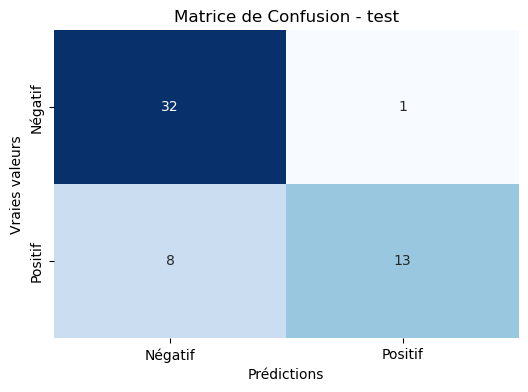

AUC: 0.86


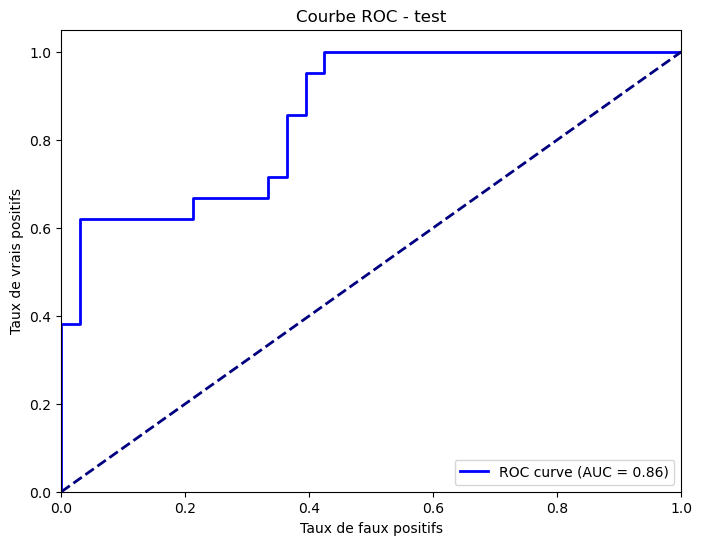

In [526]:
# Évaluation des performances
evaluer_performance(y_train, y_train_pred_lasso, set_name="train")
evaluer_performance(y_test, y_test_pred_lasso, set_name="test")

### 6.3.3. Régression Logistique ElasticNet

ElasticNet combine les régularisations L1 et L2, permettant de bénéficier à la fois de la sélection de variables et de la réduction de la variance.

**Paramètres à Optimiser**
- `C` : Inverse de la force de régularisation.
- `l1_ratio` : Ratio entre L1 et L2 (1.0 correspond à Lasso pur, 0.0 correspond à Ridge pur).

#### 6.3.3.1 Régression Logistique ElasticSearch : Implémentation avec GridSearchCV

In [528]:
# Modèle ElasticNet (Logistic Regression avec pénalités L1 et L2)
elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

# Grille de recherche pour ElasticNet
elasticnet_params = {"C": [0.01, 0.1, 1.0], "l1_ratio": [0.1, 0.5, 0.9]}

#### 6.3.3.2 Régression Logistique ElasticSearch : Meilleurs paramètres

In [529]:
# Optimisation des hyperparamètres
grid_search_elasticnet = GridSearchCV(elasticnet, elasticnet_params, cv=5)
grid_search_elasticnet.fit(X_train_transformed_df, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': [0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.5, 0.9]})

#### 6.3.3.3 Régression Logistique ElasticSearch : Prédiction

In [536]:
# Prédictions
y_train_pred_elasticnet = grid_search_elasticnet.predict_proba(X_train_transformed_df)[:,1]
y_test_pred_elasticnet = grid_search_elasticnet.predict_proba(X_test_transformed_df)[:,1]

#### 6.3.3.4 Régression Logistique ElasticSearch : Evaluation

Métriques sur l'ensemble train:
Accuracy: 0.83, Precision: 0.79, Recall: 0.85, F1: 0.82

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      95                      22
Positif (1)                      15                      84


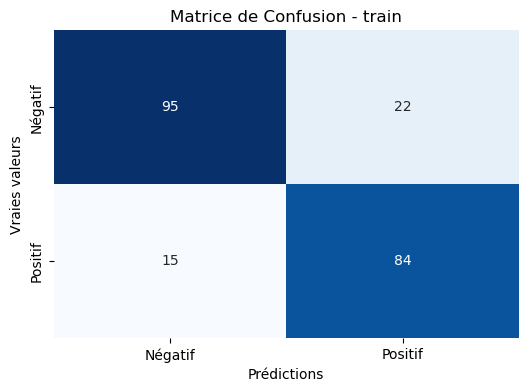

AUC: 0.90


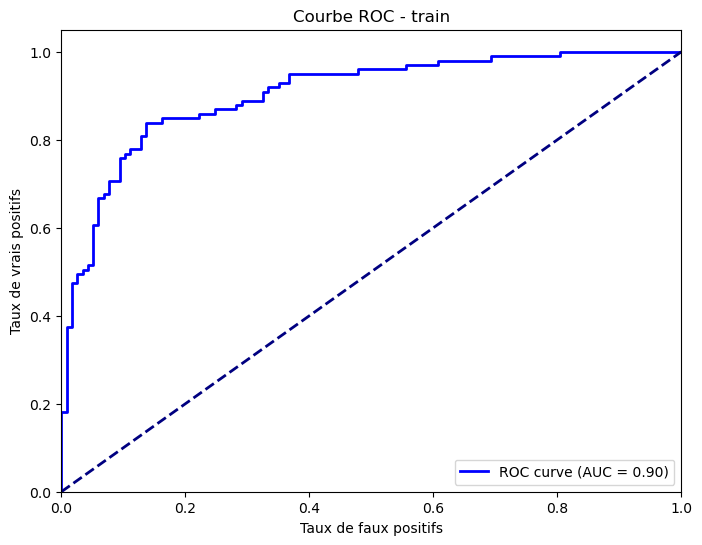

Métriques sur l'ensemble test:
Accuracy: 0.74, Precision: 0.67, Recall: 0.67, F1: 0.67

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      26                       7
Positif (1)                       7                      14


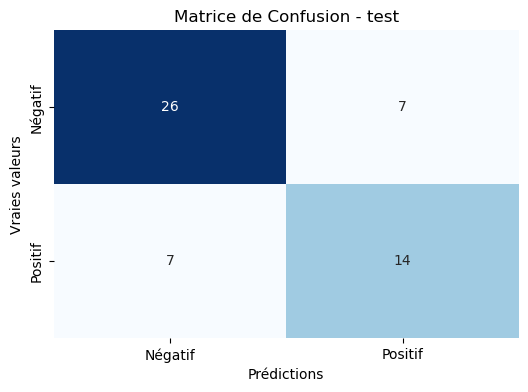

AUC: 0.86


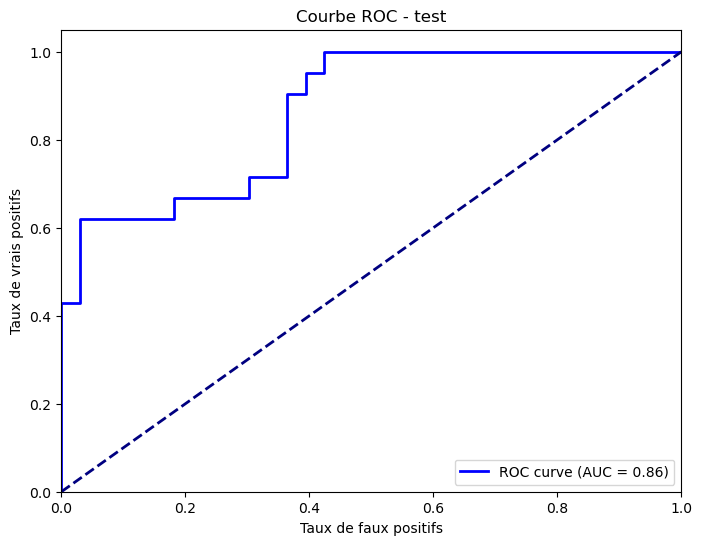

In [537]:
# Évaluation des performances
evaluer_performance(y_train, y_train_pred_elasticnet, set_name="train")
evaluer_performance(y_test, y_test_pred_elasticnet, set_name="test")

## 6.4. Arbre de classification

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### 6.4.1. Premier modèle d'arbre sans optimisation

In [351]:
# Construction de l'arbre de décision
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_transformed_df, y_train)

DecisionTreeClassifier(random_state=42)

#### 6.4.1.1 Visualisation de l'arbre

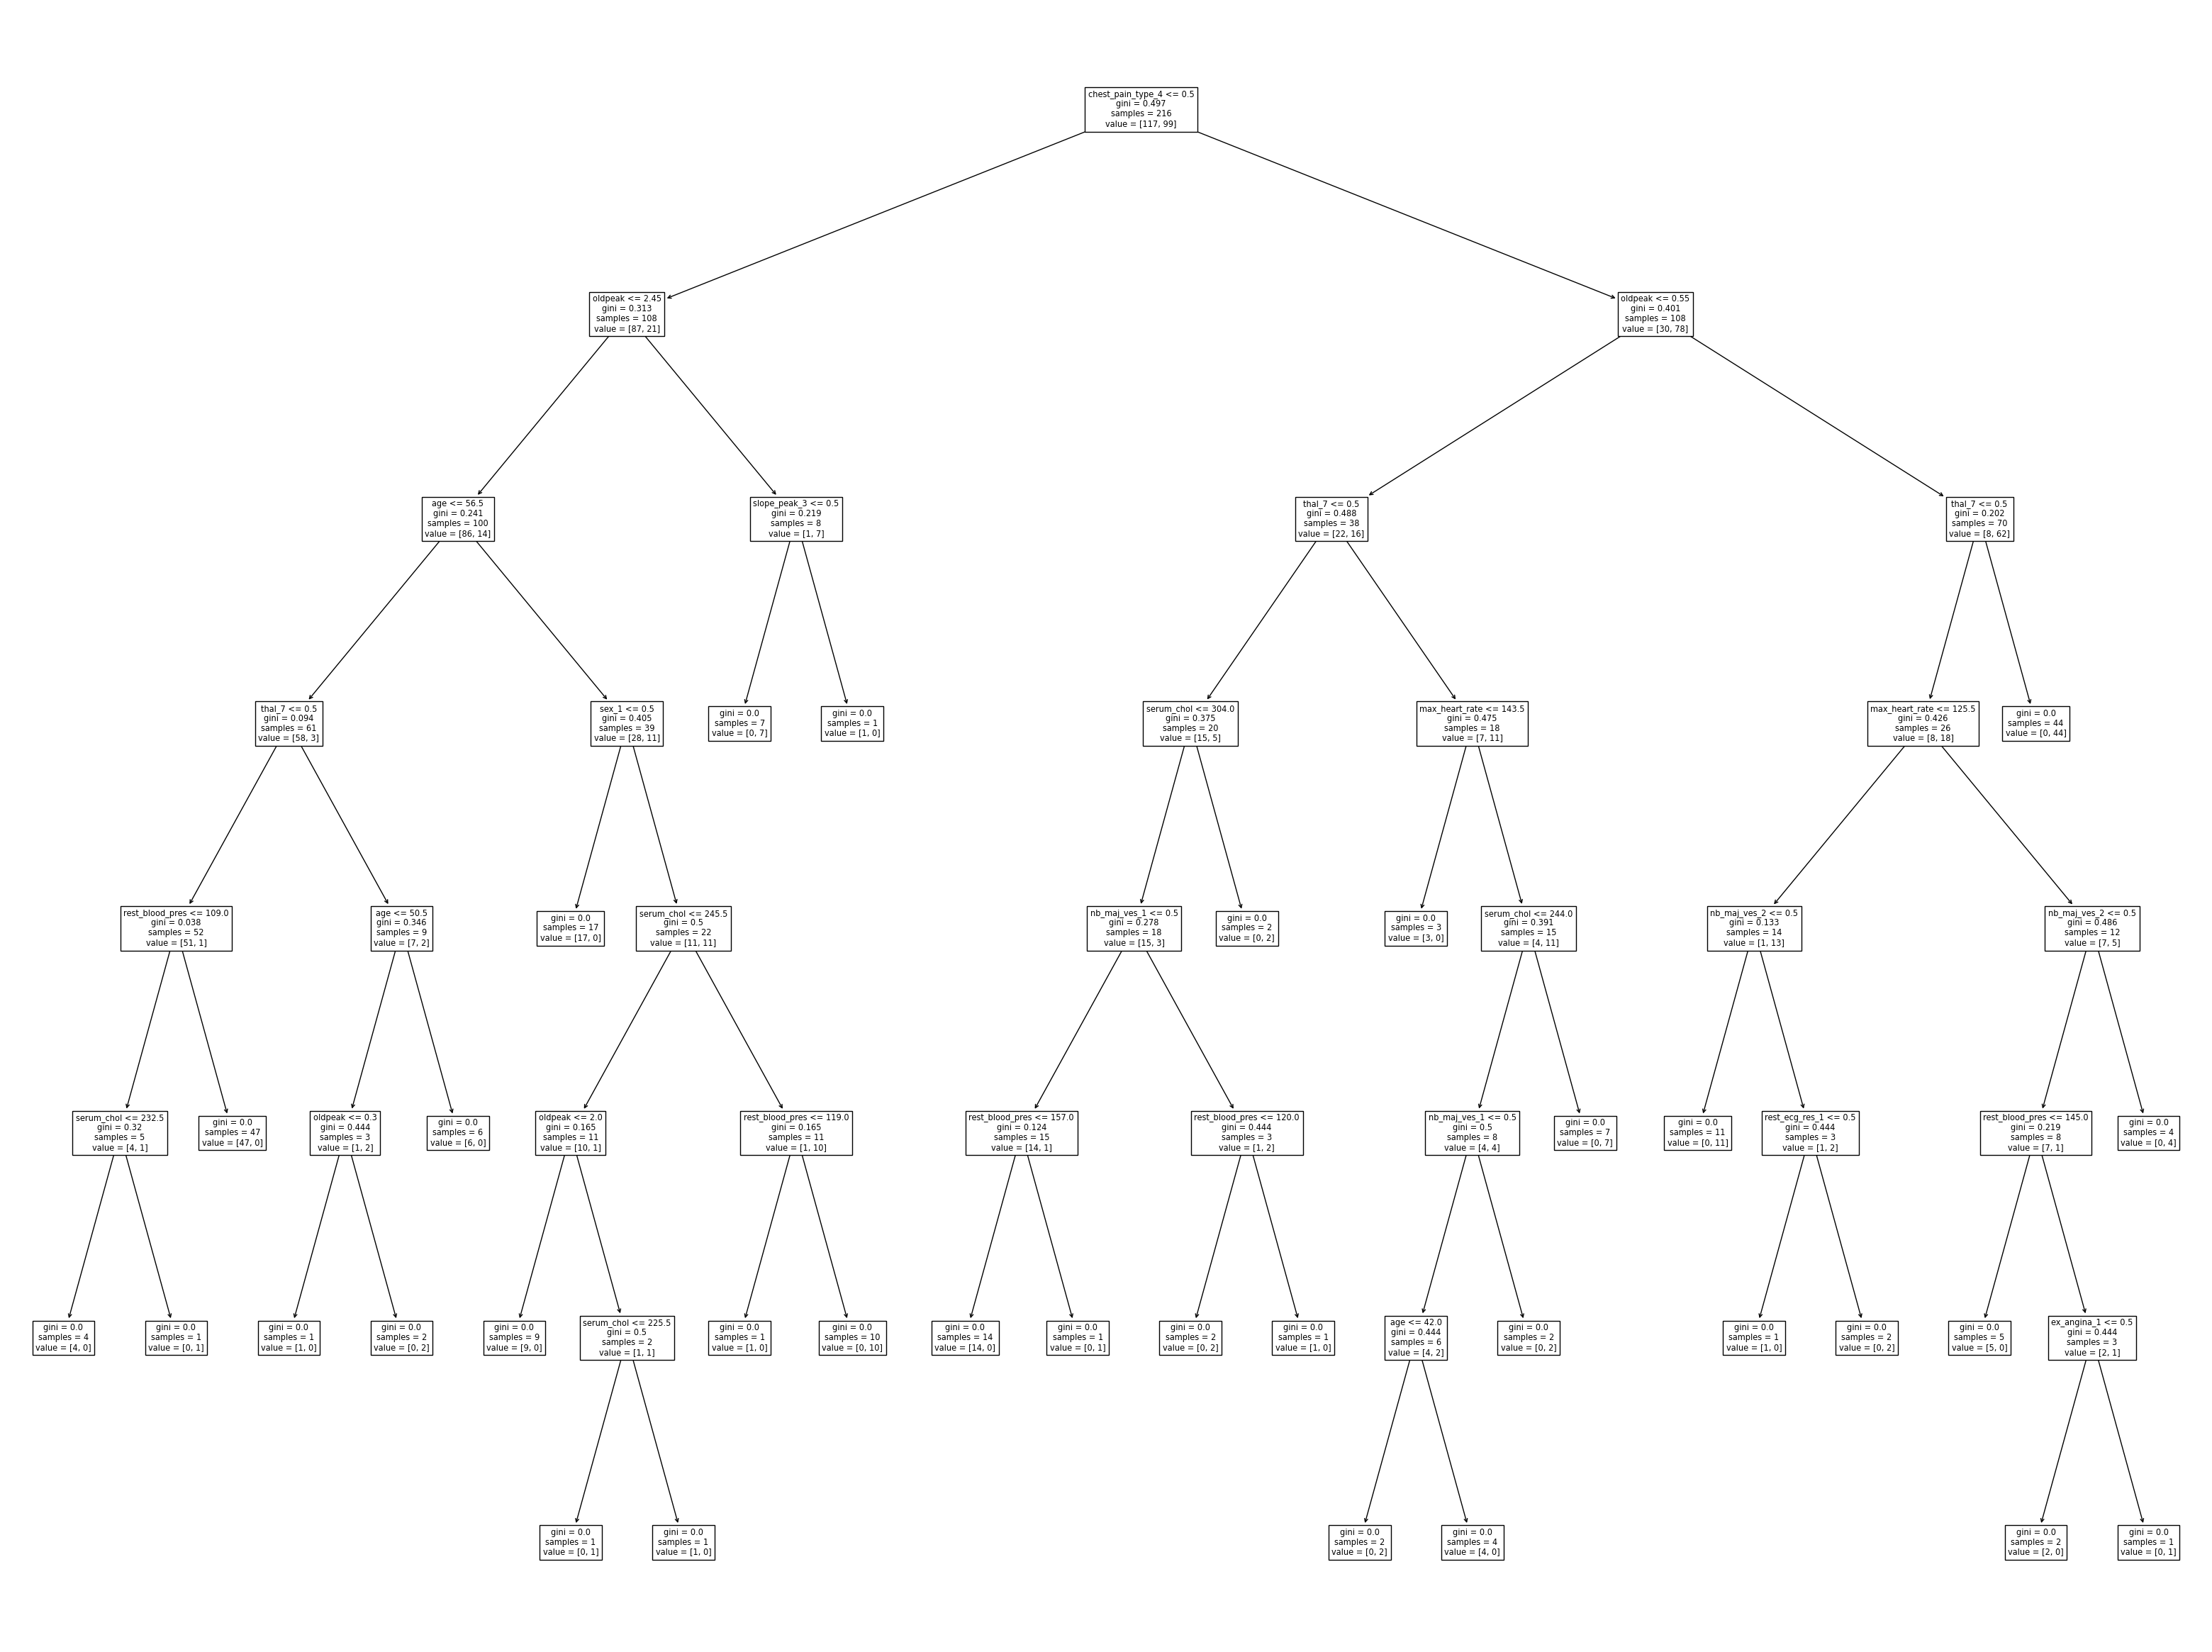

In [352]:
plt.figure(figsize=(40,30))
plot_tree(tree, feature_names=X_train_transformed_df.columns)
plt.show()

#### 6.4.1.2 Importance des variables

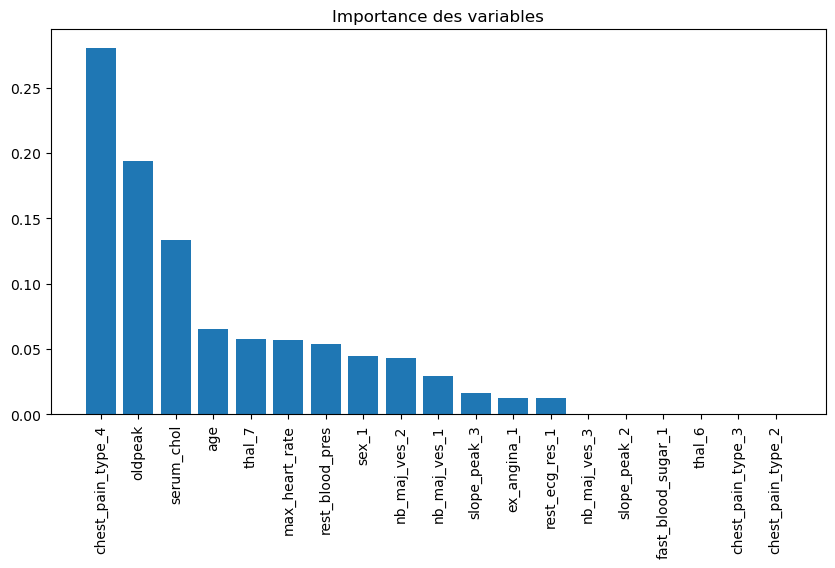

In [407]:
# Affichage de l'importance des variables
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance des variables")
plt.bar(range(X_train_transformed_df.shape[1]), importances[indices])
plt.xticks(range(X_train_transformed_df.shape[1]), X_train_transformed_df.columns[indices], rotation=90)
plt.show()

#### 6.4.1.3 Evaluation des performances

In [369]:
# Prédictions de probabilités sur l'ensemble d'entraînement
y_train_pred_proba_tree = tree.predict_proba(X_train_transformed_df)[:, 1]

# Prédictions de probabilités sur l'ensemble de test
y_test_pred_proba_tree = tree.predict_proba(X_test_transformed_df)[:, 1]

Métriques sur l'ensemble train:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                     117                       0
Positif (1)                       0                      99


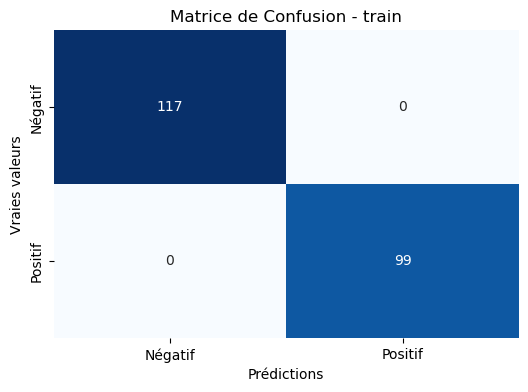

AUC: 1.00


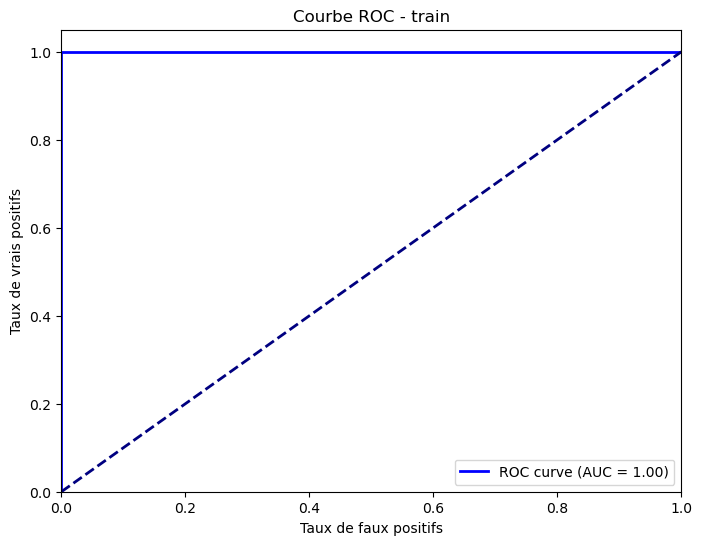

In [370]:
# Évaluer les performances sur l'ensemble d'entraînement
evaluer_performance(y_train, y_train_pred_proba_tree, set_name="train")

Métriques sur l'ensemble test:
Accuracy: 0.72, Precision: 0.65, Recall: 0.62, F1: 0.63

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      26                       7
Positif (1)                       8                      13


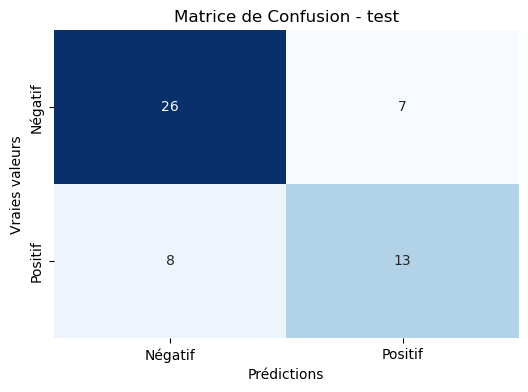

AUC: 0.70


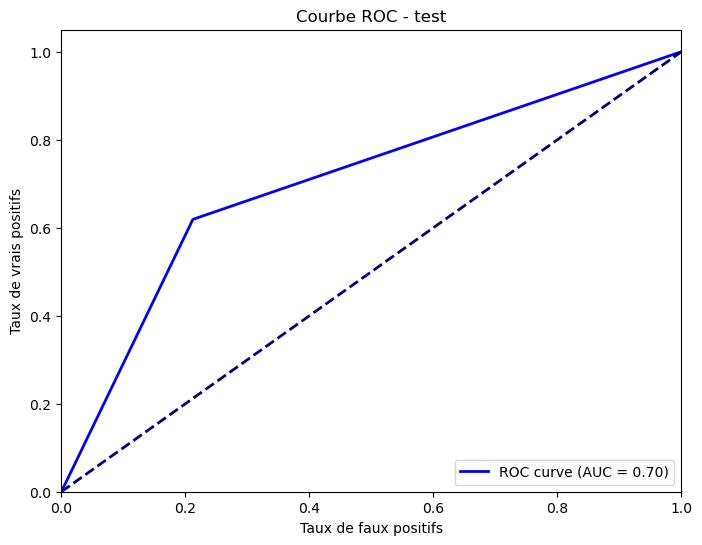

In [371]:
# Évaluer les performances sur l'ensemble d'entraînement
evaluer_performance(y_test, y_test_pred_proba_tree, set_name="test")

On note une situation de surapprentissage sur ce modèle d'arbre de décision sans optimisation. Il faut au moins optimisé la profondeur de l'arbre.

#### 6.4.1.4 Optimisation de l'arbre de décision

L'optimisation de l'arbre de décision consiste à trouver les **paramètres optimaux** qui permettent de construire un arbre qui **généralise bien** sur de nouvelles données. Voici les paramètres que nous pouvons optimiser pour l'arbre de décision :

- **criterion** : le critère de sélection des attributs. Les critères supportés sont **"gini" pour l'indice de Gini** et "entropy" pour le gain d'information.
- **splitter** : la stratégie de division des nœuds. Les stratégies supportées sont "best" pour choisir la meilleure division et "random" pour choisir une division aléatoire.
- **max_depth** : la profondeur maximale de l'arbre. Si None, les nœuds sont étendus jusqu'à ce que toutes les feuilles contiennent moins d'échantillons que min_samples_split. Une valeur élevée de profondeur maximale provoque un surajustement, et une valeur basse provoque un sous-ajustement.

Dans scikit-learn, l'optimisation de l'arbre de décision est effectuée par pré-élagage. La profondeur maximale de l'arbre peut être utilisée comme variable de contrôle pour le pré-élagage. En réduisant la profondeur maximale, nous pouvons contrôler la complexité de l'arbre et éviter le surajustement.

Il est également possible d'essayer d'autres critères de sélection d'attributs, tels que l'entropie. Il est recommandé d'utiliser la validation croisée pour trouver les meilleurs paramètres pour l'arbre de décision.

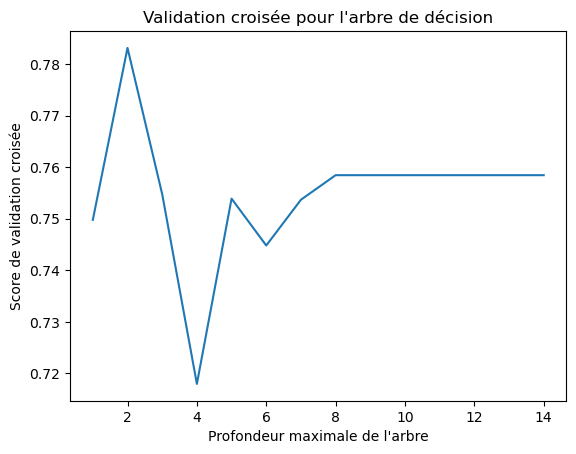

In [357]:
# Liste des profondeurs maximales à tester
max_depths = range(1, 15)

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée
for depth in max_depths:
    tree_optim = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree_optim, X_train_transformed_df, y_train, cv=10)
    cv_scores.append(np.mean(scores))

# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal
plt.plot(max_depths, cv_scores)
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour l\'arbre de décision')
plt.show()


**Profondeur maximale qui donne le meilleur score de validation croisée**

In [358]:
# Trouver la profondeur maximale qui donne le meilleur score de validation croisée
best_depth = max_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)

La meilleure profondeur maximale est : 2


**Construction de l'arbre de décision avec la profondeur maximale choisie**

In [359]:
# Construire l'arbre de décision avec la profondeur maximale choisie
tree_optim = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
tree_optim.fit(X_train_transformed_df, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

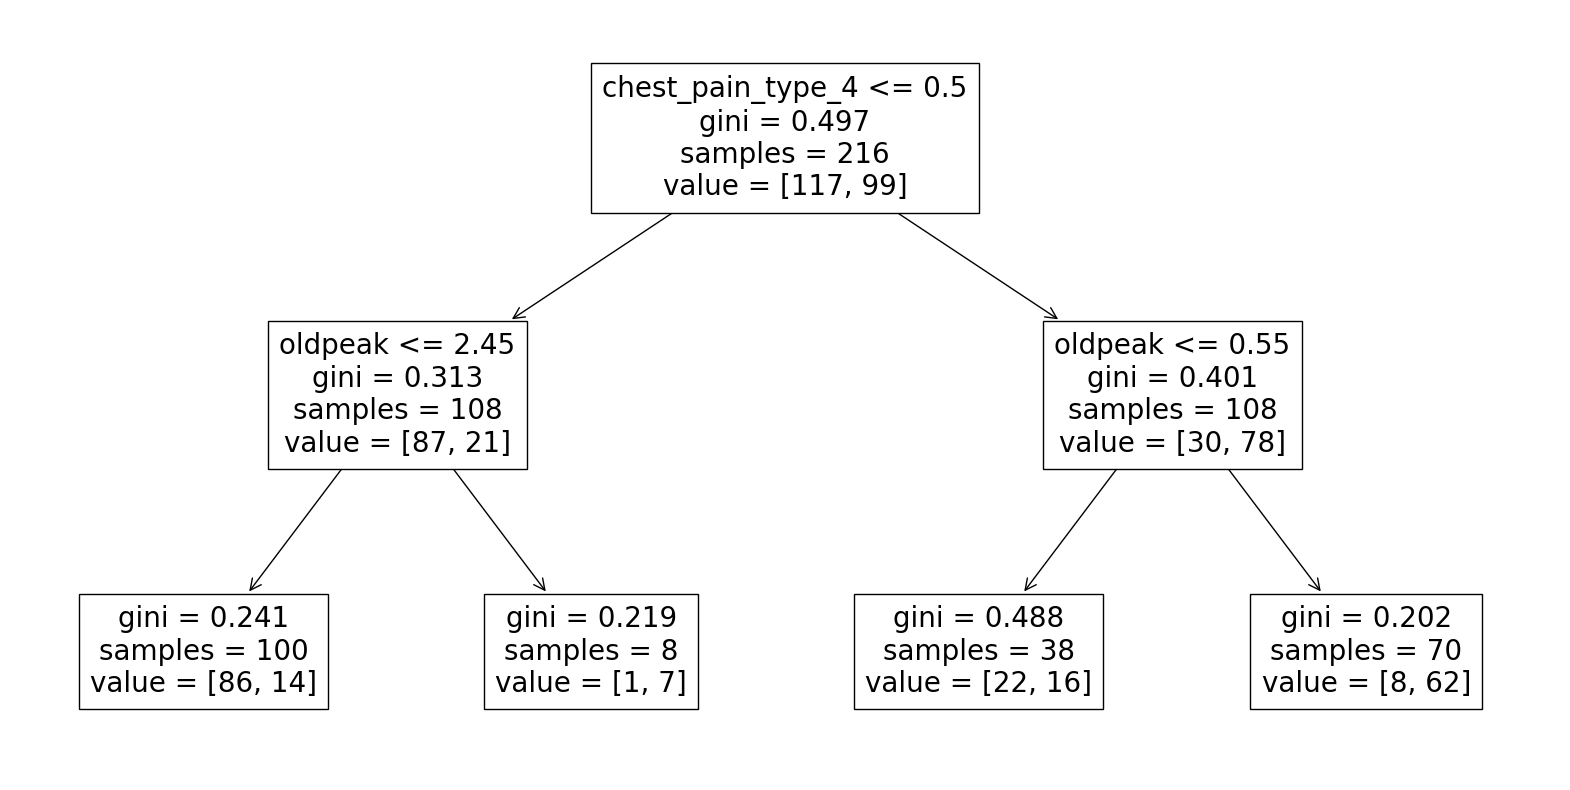

In [360]:
plt.figure(figsize=(20,10))
plot_tree(tree_optim, feature_names=X_train_transformed_df.columns)
plt.show()

#### 6.4.1.5 Importance des variables de l'optimisation 

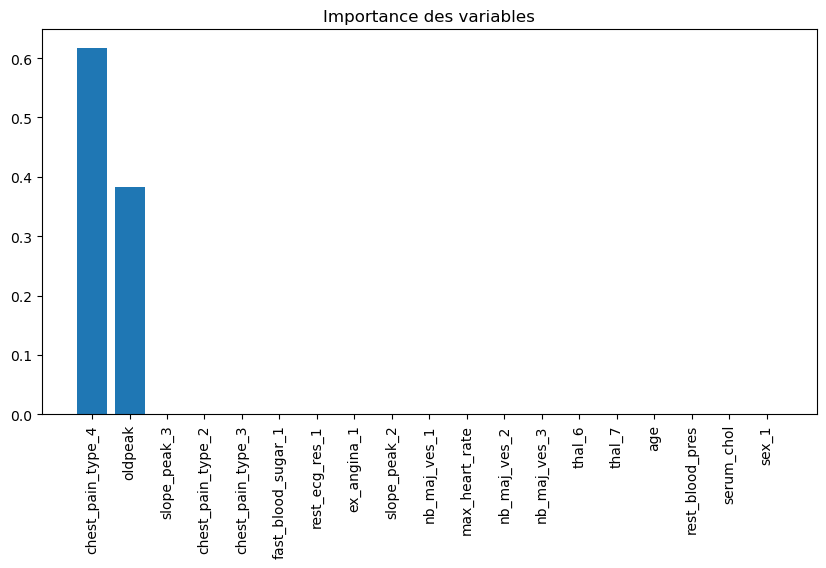

In [406]:
# Affichage de l'importance des variables
importances_tree_optim = tree_optim.feature_importances_
indices = np.argsort(importances_tree_optim)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance des variables")
plt.bar(range(X_train_transformed_df.shape[1]), importances_tree_optim[indices])
plt.xticks(range(X_train_transformed_df.shape[1]), X_train_transformed_df.columns[indices], rotation=90)
plt.show()

#### 6.4.1.6 Evaluation du modèle optimisé d'arbre de décision 

In [382]:
# Prédictions de probabilités sur l'ensemble d'entraînement
y_train_pred_proba_optim = tree_optim.predict_proba(X_train_transformed_df)[:, 1]

# Prédictions de probabilités sur l'ensemble de test
y_test_pred_proba_optim = tree_optim.predict_proba(X_test_transformed_df)[:, 1]

Métriques sur l'ensemble train:
Accuracy: 0.79, Precision: 0.73, Recall: 0.86, F1: 0.79

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      86                      31
Positif (1)                      14                      85


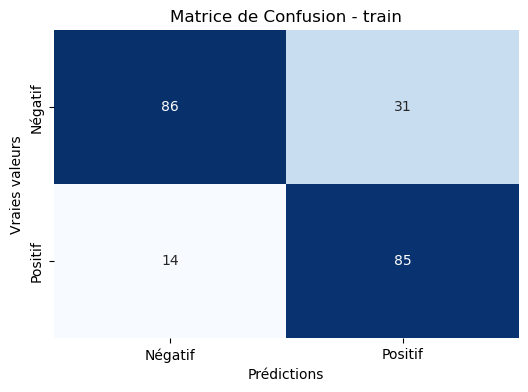

AUC: 0.86


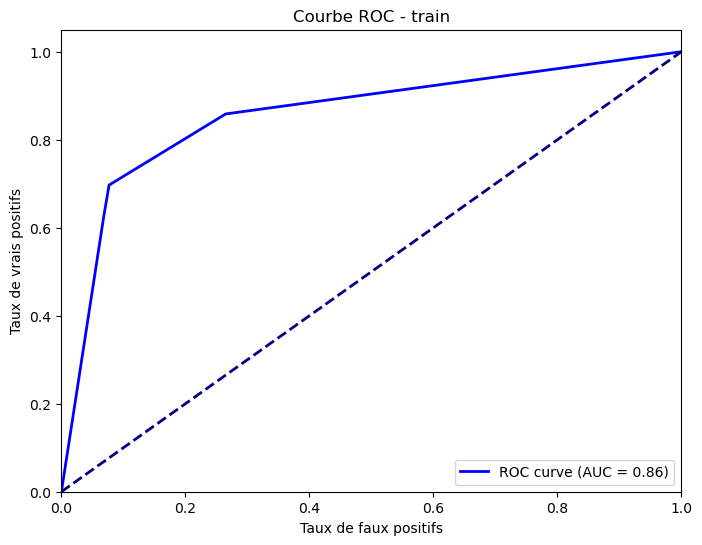

In [383]:
# Évaluer les performances sur l'ensemble d'entraînement
evaluer_performance(y_train, y_train_pred_proba_optim, set_name="train")

Métriques sur l'ensemble test:
Accuracy: 0.67, Precision: 0.57, Recall: 0.62, F1: 0.59

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      23                      10
Positif (1)                       8                      13


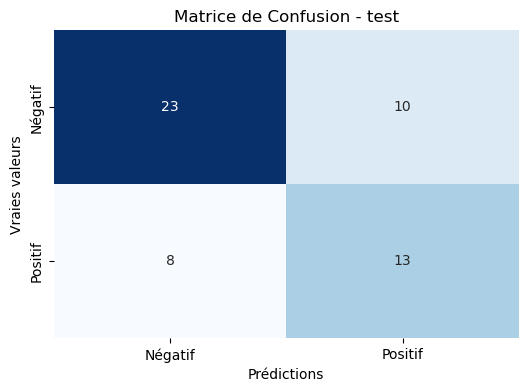

AUC: 0.67


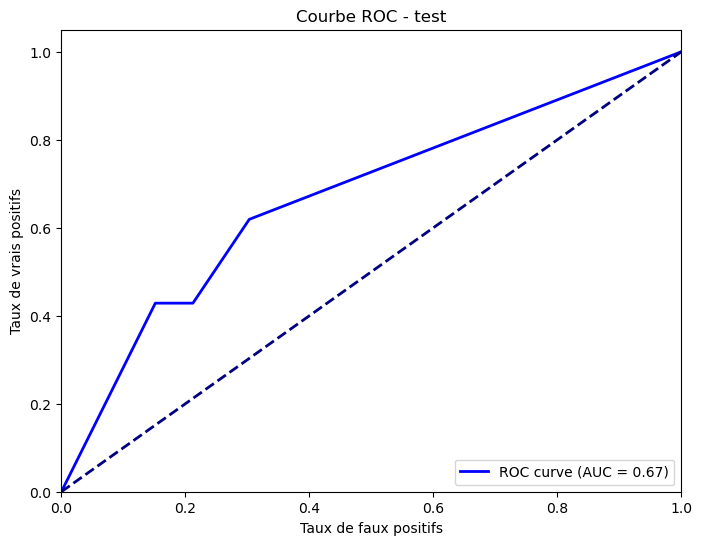

In [384]:
# Évaluer les performances sur l'ensemble d'entraînement
evaluer_performance(y_test, y_test_pred_proba_optim, set_name="test")

Avec l'optimisation de ce modèle d'arbre de décision, on note toujours le surapprentissage largement réduit par rapport au modèle d'arbre de décision sans optimisation surtout lorsque l'on joue sur le seuil de probabilité.

In [387]:
# Initialiser l'arbre de décision
clf = DecisionTreeClassifier(random_state=42)

# Définir les paramètres à optimiser
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 10, None],
    'min_samples_split': [10]
}

# Utiliser GridSearchCV pour trouver les meilleurs paramètres
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_transformed_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, None],
                         'min_samples_split': [10]},
             verbose=2)

In [388]:
X_train_transformed_df.columns

Index(['sex_1', 'chest_pain_type_2', 'chest_pain_type_3', 'chest_pain_type_4',
       'fast_blood_sugar_1', 'rest_ecg_res_1', 'ex_angina_1', 'slope_peak_2',
       'slope_peak_3', 'nb_maj_ves_1', 'nb_maj_ves_2', 'nb_maj_ves_3',
       'thal_6', 'thal_7', 'age', 'rest_blood_pres', 'serum_chol',
       'max_heart_rate', 'oldpeak'],
      dtype='object')

On observe que l'arbre de décision, malgré son avantage sur l'interprétation, porte des inconvénients comme le surapprentissage constaté, l'instabilité, le biais de sélection de variable.  Il est souvent nécessaire d'utiliser des techniques de régularisation ou d'autres méthodes d'apprentissage automatique comme les forêts aléatoires qui prennent en compte plusieurs arbres de décision et appliquent un vote à la majorité dans le cas d'une classification.

## 6.5. Forêt aléatoire (Radom Forest)

### Modèle RF non optimisé

In [394]:
from sklearn.ensemble import RandomForestClassifier
# Calculer le nombre maximum de variables (max_features) à la racine carrée
max_features = int(np.sqrt(X_train_transformed_df.shape[1]))

# Créer la forêt aléatoire avec les hyperparamètres fixés
random_forest = RandomForestClassifier(n_estimators=300, max_features=max_features, random_state=42,oob_score=True)

# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train_transformed_df, y_train)

RandomForestClassifier(max_features=4, n_estimators=300, oob_score=True,
                       random_state=42)

### 6.5.1 Entraînement du modèle RF non optimisé

In [395]:
# Prédire les probabilités sur les ensembles d'entraînement et de test
y_train_pred_rf = random_forest.predict_proba(X_train_transformed_df)[:,1]
y_test_pred_rf = random_forest.predict_proba(X_test_transformed_df)[:,1]

### 6.5.2 Évaluation des performances du modèle RF non optimisé

* **Évaluation des performances sur l'ensemble d'entraînement**

Métriques sur l'ensemble train:
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                     117                       0
Positif (1)                       0                      99


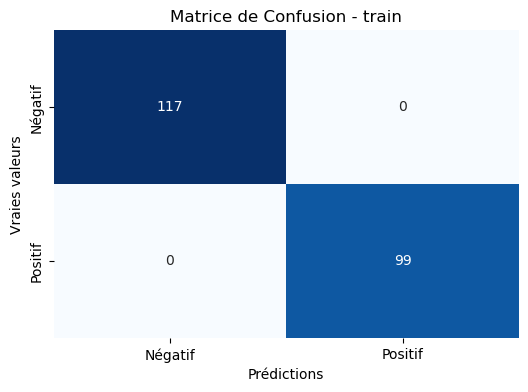

AUC: 1.00


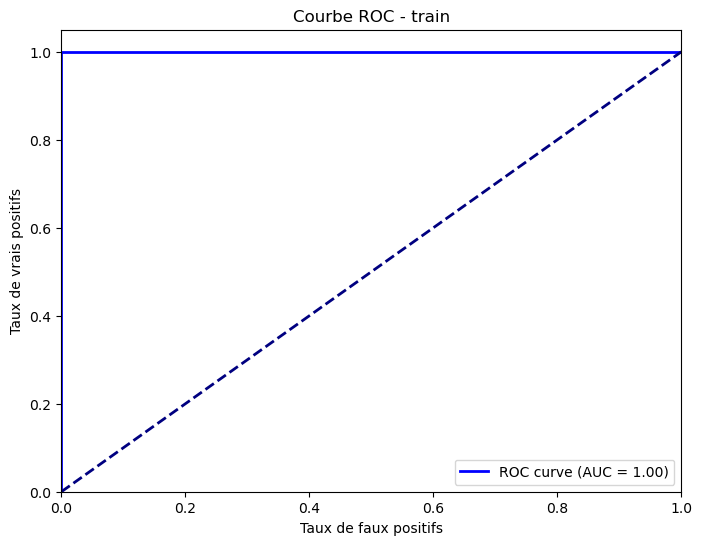

In [403]:
# Évaluer les performances sur l'ensemble d'entraînement
evaluer_performance(y_train, y_train_pred_rf, set_name="train")

* **Évaluation des performances sur l'ensemble de test**

Métriques sur l'ensemble test:
Accuracy: 0.74, Precision: 0.67, Recall: 0.67, F1: 0.67

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      26                       7
Positif (1)                       7                      14


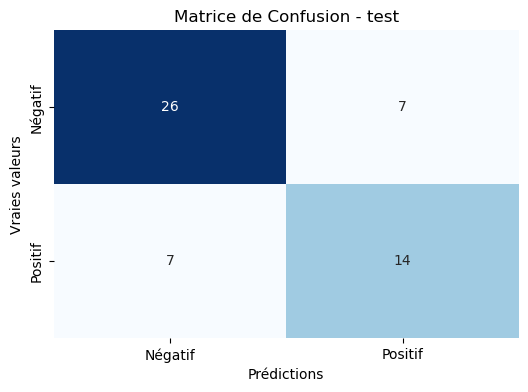

AUC: 0.87


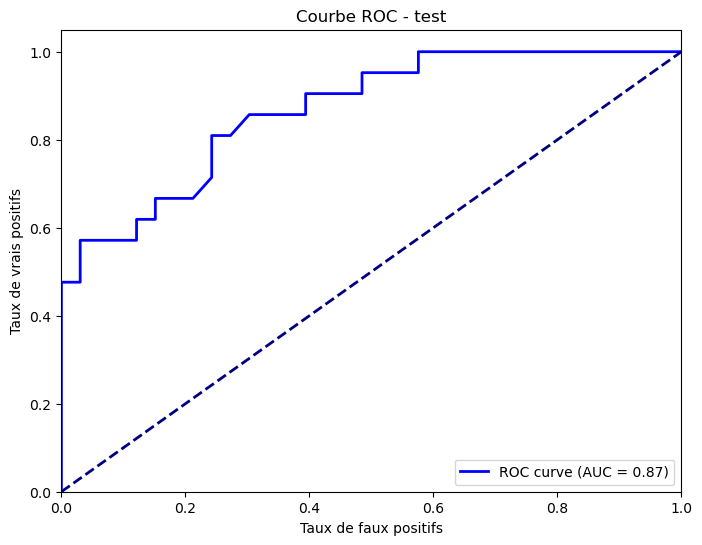

In [402]:
# Évaluer les performances sur l'ensemble de test
evaluer_performance(y_test, y_test_pred_rf, set_name="test")

### 6.5.3 Importance des variables du modèle RF non optimisé

Importance des variables :
              Variable  Importance
0              oldpeak    0.142544
1       max_heart_rate    0.116609
2               thal_7    0.109497
3    chest_pain_type_4    0.108604
4                  age    0.095329
5           serum_chol    0.081250
6      rest_blood_pres    0.080904
7          ex_angina_1    0.060862
8         slope_peak_2    0.040681
9                sex_1    0.027044
10   chest_pain_type_3    0.027024
11        nb_maj_ves_2    0.023984
12        nb_maj_ves_1    0.021057
13      rest_ecg_res_1    0.019525
14   chest_pain_type_2    0.012805
15  fast_blood_sugar_1    0.010380
16        nb_maj_ves_3    0.008728
17        slope_peak_3    0.006955
18              thal_6    0.006215



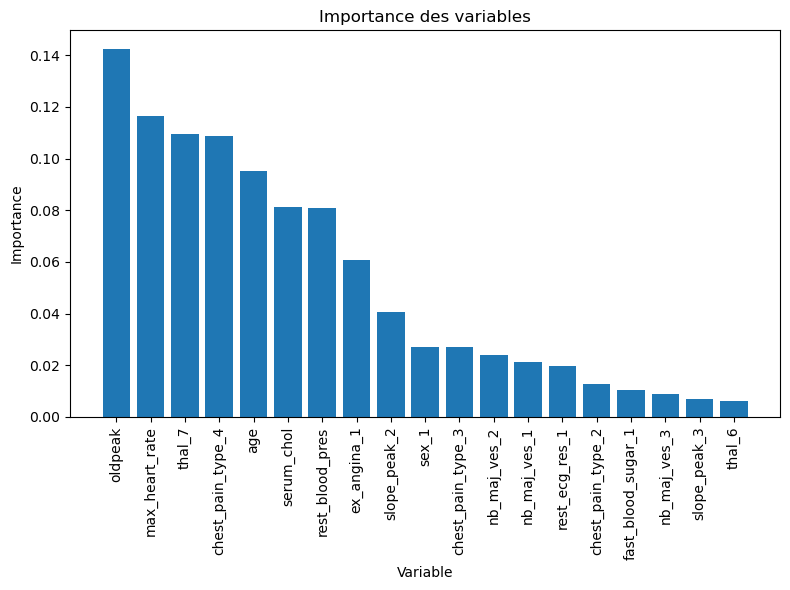

In [408]:
# Obtenir l'importance des variables
importance_rf = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_rf_df = pd.DataFrame({'Variable': X_train_transformed_df.columns, 'Importance': importance_rf})
importance_rf_df = importance_rf_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_rf_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_rf_df['Variable'], importance_rf_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

In [ ]:
On note un surapprentissage du modèle RF sans optimisation.

### Modèle RF optimisé

Voici les paramètres les plus importants à prendre en compte :

- `n_estimators` : Il s'agit du nombre d'arbres de décision dans la forêt aléatoire. Augmenter ce nombre peut améliorer les performances du modèle, mais cela entraîne également une augmentation du temps de calcul.



- `max_depth` : C'est la profondeur maximale de chaque arbre de décision. Une valeur plus élevée permet à l'arbre d'apprendre des relations plus complexes dans les données, mais elle peut également conduire à un surajustement. Il est important de trouver un équilibre pour éviter l'overfitting.



- `min_samples_split` : Ce paramètre définit le nombre minimum d'échantillons requis pour scinder un nœud. Une valeur plus élevée peut conduire à des arbres plus simples et éviter l'overfitting, mais cela peut également entraîner une sous-représentation des informations dans les données.




Il est recommandé d'utiliser des techniques d'optimisation telles que la recherche par grille (GridSearch) ou la recherche aléatoire (RandomizedSearch) pour explorer différentes combinaisons de ces paramètres et trouver ceux qui fournissent les meilleures performances pour votre problème spécifique.

### 6.5.4 Modèle Random Forest avec optimisation via la validation croisée

In [409]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Définir les hyperparamètres à tester à l'aide de GridSearch
param_grid = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [1,2,3,4,6,7,8]
}

# Créer un modèle de forêt aléatoire
rf_model = RandomForestClassifier(oob_score=True, random_state=42)

# Utiliser GridSearch pour trouver les meilleurs paramètres
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train_transformed_df, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'max_depth': 2, 'n_estimators': 300}


### 6.5.5 Modèle Random Forest avec les meilleurs paramètres

In [410]:
# Créer un modèle de forêt aléatoire avec les meilleurs paramètres
random_forest_optim = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], oob_score=True, random_state=42)
# Entraîner le modèle sur les données d'entraînement
random_forest_optim.fit(X_train_transformed_df, y_train)

RandomForestClassifier(max_depth=2, n_estimators=300, oob_score=True,
                       random_state=42)

#### 6.5.5.1 Modèle RF avec les meilleurs paramètres : Prédiction

In [429]:
# Prédire les probabilités sur les ensembles d'entraînement et de test
y_train_pred_rf_optim = random_forest_optim.predict_proba(X_train_transformed_df)[:,1]
y_test_pred_rf_optim = random_forest_optim.predict_proba(X_test_transformed_df)[:,1]

#### 6.5.5.2 Modèle RF avec les meilleurs paramètres : Évaluation des performances sur l'ensemble Train

Métriques sur l'ensemble train:
Accuracy: 0.84, Precision: 0.82, Recall: 0.85, F1: 0.83

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      98                      19
Positif (1)                      15                      84


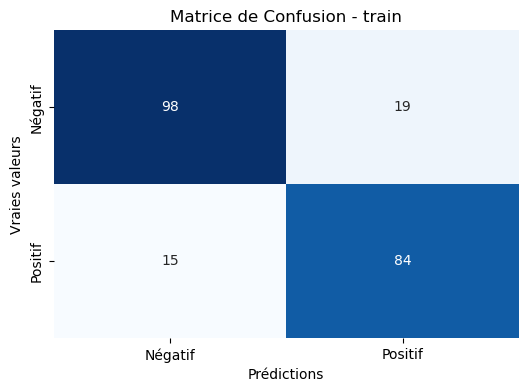

AUC: 0.93


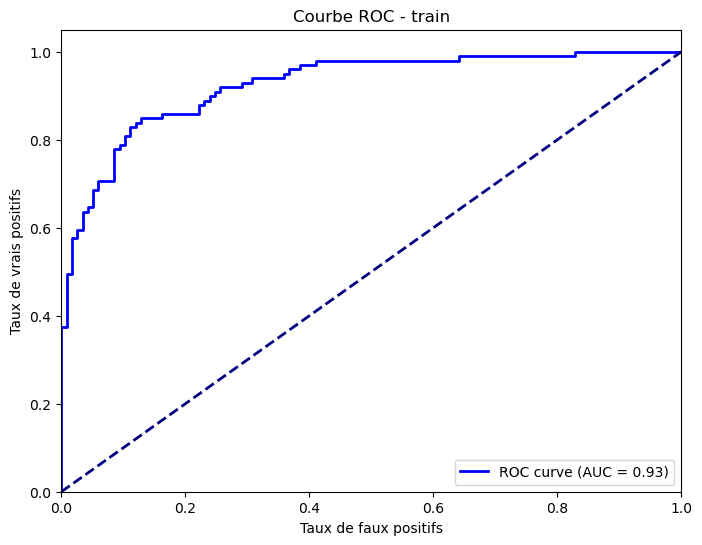

In [430]:
# Évaluer les performances sur l'ensemble d'entraînement
evaluer_performance(y_train, y_train_pred_rf_optim, set_name="train")

#### 6.5.5.3 Modèle RF avec les meilleurs paramètres : Évaluation des performances sur l'ensemble Test

Métriques sur l'ensemble test:
Accuracy: 0.76, Precision: 0.70, Recall: 0.67, F1: 0.68

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      27                       6
Positif (1)                       7                      14


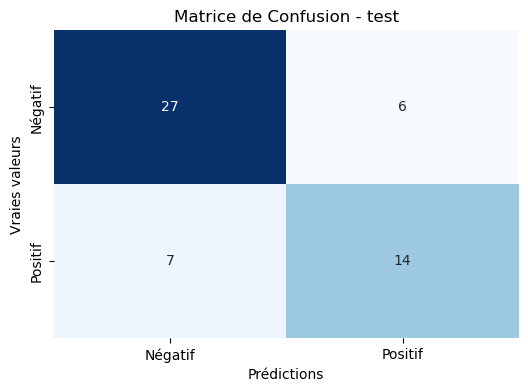

AUC: 0.85


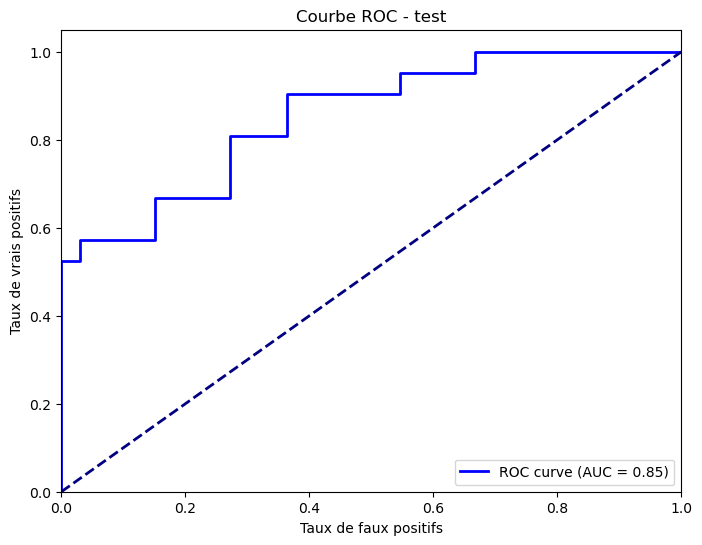

In [431]:
# Évaluer les performances sur l'ensemble d'entraînement
evaluer_performance(y_test, y_test_pred_rf_optim, set_name="test")

### 6.5.6 Importance des variables du modèle RF optimisé

Importance des variables :
              Variable  Importance
0    chest_pain_type_4    0.189993
1               thal_7    0.183242
2              oldpeak    0.147516
3          ex_angina_1    0.127860
4       max_heart_rate    0.106866
5         slope_peak_2    0.058648
6    chest_pain_type_3    0.040646
7                  age    0.037545
8      rest_blood_pres    0.025175
9    chest_pain_type_2    0.021532
10        nb_maj_ves_2    0.016340
11          serum_chol    0.016105
12               sex_1    0.012804
13        nb_maj_ves_3    0.005972
14        nb_maj_ves_1    0.005363
15      rest_ecg_res_1    0.001551
16              thal_6    0.001183
17        slope_peak_3    0.001079
18  fast_blood_sugar_1    0.000581



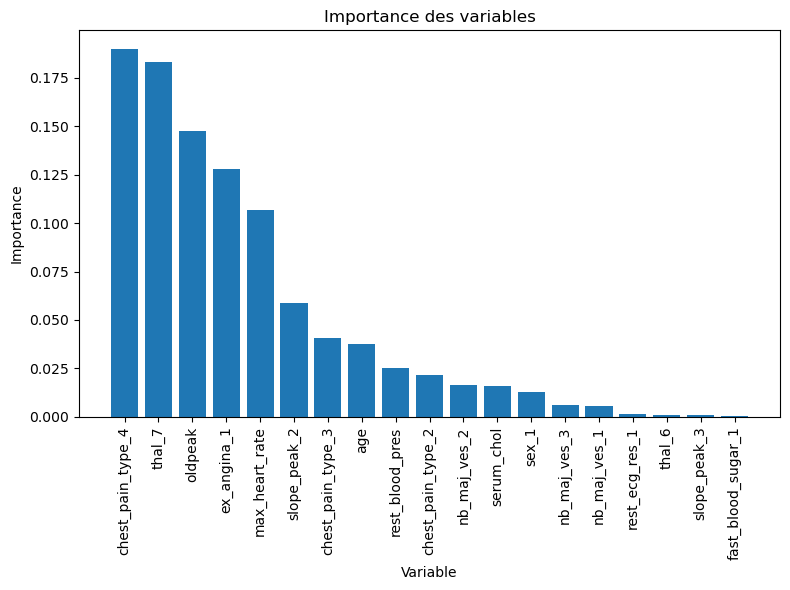

In [432]:
# Obtenir l'importance des variables
importance_rf_optim = random_forest_optim.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_rf_optim_df = pd.DataFrame({'Variable': X_train_transformed_df.columns, 'Importance': importance_rf_optim})
importance_rf_optim_df = importance_rf_optim_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_rf_optim_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_rf_optim_df['Variable'], importance_rf_optim_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

## 6.6. Boosting : Adaboost

## 6.7. Boosting : LightGBM

## 6.8. Boosting : CatBoost

## 6.9. Boosting : XgBoost

In [433]:
!pip install xgboost

     ------------------------------------- 124.9/124.9 MB 23.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [438]:
from xgboost import XGBClassifier
from sklearn.model_selection import  GridSearchCV
import time

### 6.9.1 XgBoost : Définition des paramètres à optimiser

In [439]:
# Définition des paramètres à optimiser
param_grid_xgb = {
    # max_depth est la profondeur maximale de chaque arbre. Une valeur plus élevée rendra le modèle plus complexe et pourrait entraîner un surapprentissage.
    'max_depth': [1,2,3,4],
    
    # learning_rate (ou taux d'apprentissage) est le pas d'ajustement effectué à chaque étape de l'optimisation. Une valeur plus faible rendra l'apprentissage plus lent.
    'learning_rate': [0.01, 0.1, 0.2],
    
    # n_estimators est le nombre d'arbres à construire.
    'n_estimators': [100, 200, 300,500,1000]
}

# Création de l'objet GridSearch

model_xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

### 6.9.2 XgBoost : Enregistrement du temps actuel

In [440]:
# Enregistrement du temps actuel
start_time = time.time()

# Entraînement du modèle avec GridSearch
grid_search_xgb.fit(X_train_transformed_df, y_train)

# Calcul du temps d'exécution
execution_time = time.time() - start_time

Fitting 5 folds for each of 60 candidates, totalling 300 fits


### 6.9.3 XgBoost : Affichage des meilleurs paramètres

In [441]:
# Affichage des meilleurs paramètres
print("Best parameters XGB found: ", grid_search_xgb.best_params_)

# Affichage du temps d'exécution
print("Temps d'exécution XGB : %.2f secondes" % execution_time)

Best parameters XGB found:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Temps d'exécution XGB : 10.00 secondes


### 6.9.4 XgBoost : Utilisation du meilleur modèle trouvé pour la prédiction

In [443]:
# Utilisation du meilleur modèle trouvé pour la prédiction
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [478]:
# Utilisation du meilleur modèle trouvé pour la prédiction
y_train_pred_xgb = best_model_xgb.predict_proba(X_train_transformed_df)[:, 1]
y_test_pred_xgb = best_model_xgb.predict_proba(X_test_transformed_df)[:, 1]

#### 6.9.4.1 XgBoost : Evaluation des performances sur l'ensemble Train

Métriques sur l'ensemble train:
Accuracy: 0.92, Precision: 0.89, Recall: 0.95, F1: 0.92

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                     105                      12
Positif (1)                       5                      94


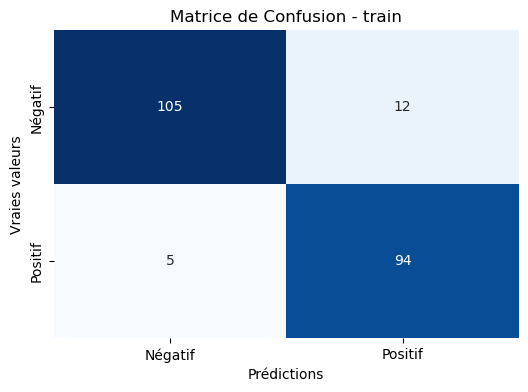

AUC: 0.98


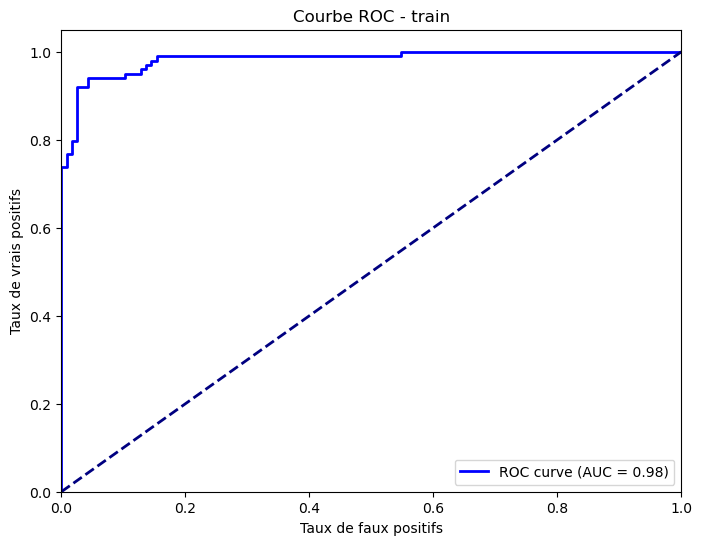

In [480]:
# Évaluer les performances sur l'ensemble Train
evaluer_performance(y_train, y_train_pred_xgb, set_name="train")

#### 6.9.4.2 XgBoost : Evaluation des performances sur l'ensemble Test

Métriques sur l'ensemble test:
Accuracy: 0.78, Precision: 0.71, Recall: 0.71, F1: 0.71

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      27                       6
Positif (1)                       6                      15


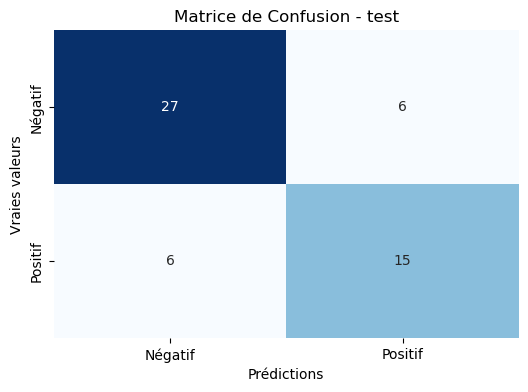

AUC: 0.85


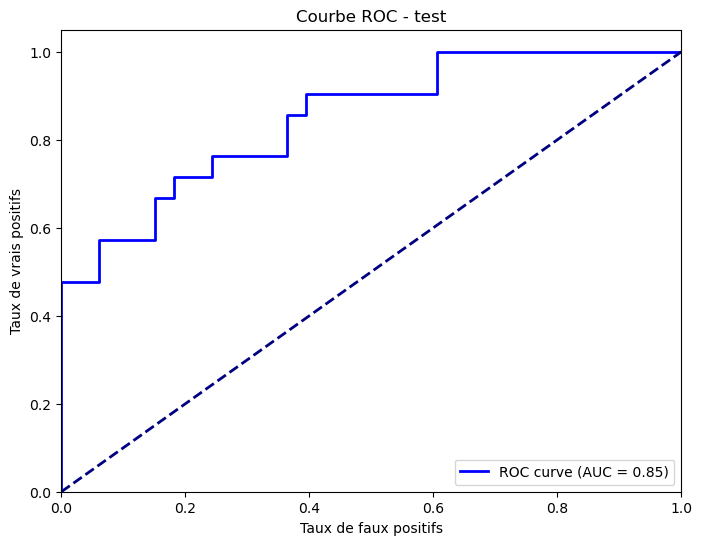

In [481]:
# Évaluer les performances sur l'ensemble Test
evaluer_performance(y_test, y_test_pred_xgb, set_name="test")

### 6.9.5 XgBoost : Importance des variables

               feature  importance
3    chest_pain_type_4    0.216456
13              thal_7    0.208007
18             oldpeak    0.096137
6          ex_angina_1    0.073470
7         slope_peak_2    0.072917
17      max_heart_rate    0.053214
2    chest_pain_type_3    0.048008
15     rest_blood_pres    0.045755
14                 age    0.040170
0                sex_1    0.037520
16          serum_chol    0.034502
9         nb_maj_ves_1    0.032017
10        nb_maj_ves_2    0.024697
5       rest_ecg_res_1    0.014913
8         slope_peak_3    0.002217
11        nb_maj_ves_3    0.000000
12              thal_6    0.000000
1    chest_pain_type_2    0.000000
4   fast_blood_sugar_1    0.000000


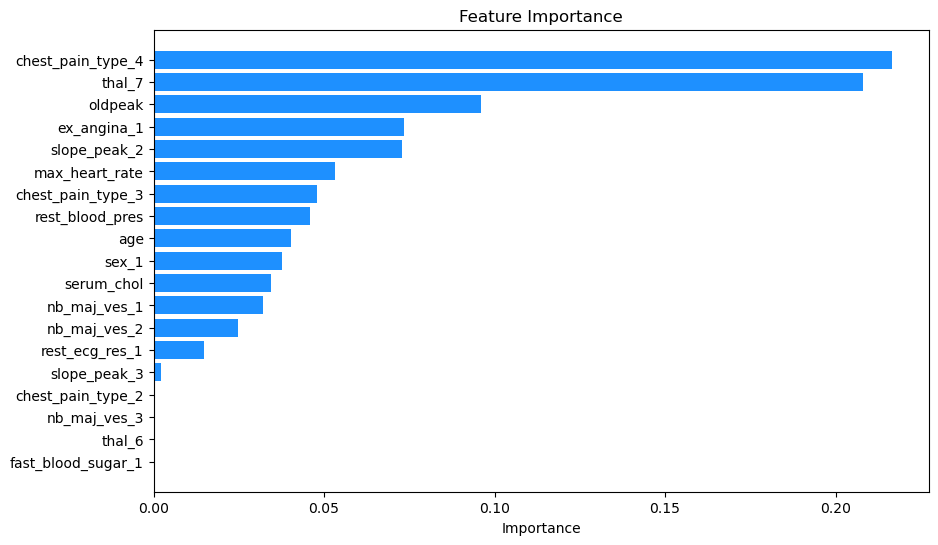

In [482]:
# Importance des variables
importance_scores_xgb = best_model_xgb.feature_importances_

# Création du DataFrame d'importance des variables
importance_df_xgb = pd.DataFrame({
    'feature': X_train_transformed_df.columns,
    'importance': importance_scores_xgb
}).sort_values(by='importance', ascending=False)

# Affichage du DataFrame d'importance des variables
print(importance_df_xgb)

# Création du graphique pour l'importance des caractéristiques
importance_df_xgb = importance_df_xgb.sort_values(by='importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df_xgb['feature'], importance_df_xgb['importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

## 6.10. K-Nearest Neighbors (KNN)

Le modèle K Plus Proches Voisins est un modèle non paramétrique qui classe une observation en fonction de la classe majoritaire de ses k voisins les plus proches dans l'espace des caractéristiques.

### Paramètres à Optimiser
- `n_neighbors` : Nombre de voisins à considérer pour faire la prédiction.

### 6.10.1 KNN : Implémentation avec GridSearchCV

In [485]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Modèle KNN
knn = KNeighborsClassifier()

# Grille de recherche pour le modèle KNN
knn_params = {"n_neighbors": [1, 2, 3, 4, 5, 7, 9]}

# Optimisation des hyperparamètres
grid_search_knn = GridSearchCV(knn, knn_params, cv=5)
grid_search_knn.fit(X_train_transformed_df, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 9]})

### 6.10.2 KNN : Affichage des meilleurs paramètres

In [486]:
grid_search_knn.best_params_

{'n_neighbors': 5}

### 6.10.3 KNN : Prédiction

In [503]:
# Prédictions
y_train_pred_knn = grid_search_knn.predict_proba(X_train_transformed_df)[:,1]
y_test_pred_knn = grid_search_knn.predict_proba(X_test_transformed_df)[:,1]

### 6.10.4 KNN : Evaluation des performances

#### 6.10.4.1 KNN : Evaluation des performances sur la base Train

Métriques sur l'ensemble train:
Accuracy: 0.77, Precision: 0.78, Recall: 0.70, F1: 0.74

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      98                      19
Positif (1)                      30                      69


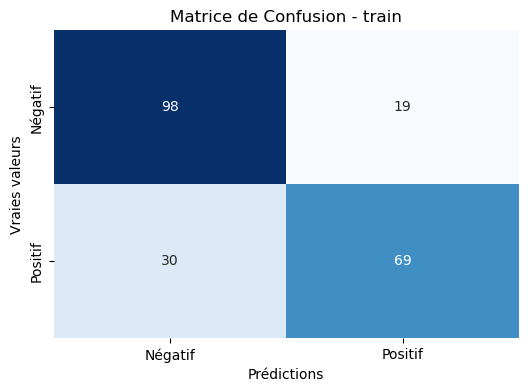

AUC: 0.84


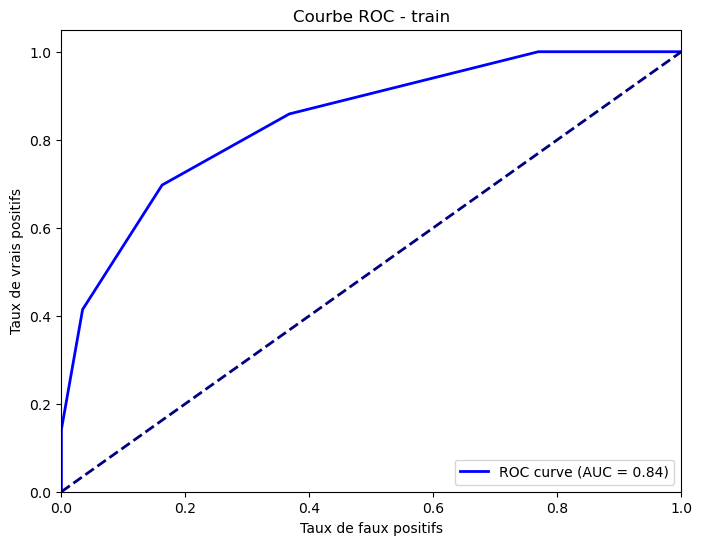

In [504]:
# Évaluation des performances sur la base Train
evaluer_performance(y_train, y_train_pred_knn, set_name="train")

#### 6.10.4.2 KNN : Evaluation des performances sur la base Test

Métriques sur l'ensemble test:
Accuracy: 0.63, Precision: 0.52, Recall: 0.62, F1: 0.57

Matrice de Confusion (tableau):
             Prédiction Négatif (0)  Prédiction Positif (1)
Négatif (0)                      21                      12
Positif (1)                       8                      13


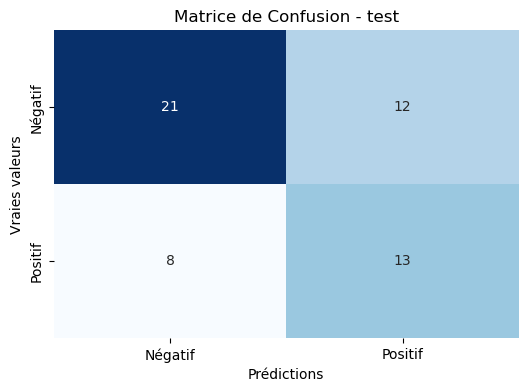

AUC: 0.74


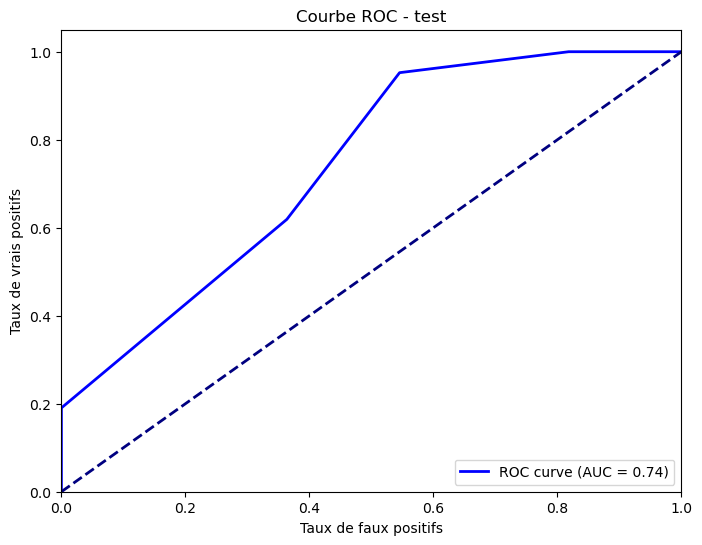

In [506]:
# Évaluation des performances sur la base Test
evaluer_performance(y_test, y_test_pred_knn, set_name="test")